In [1]:
# IMPORTING LIBRARIES 
####################################################################################################
import numpy as np
import os 
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
#from netCDF4 import Dataset as NetCDFFile 
import cartopy.crs as ccrs
#import matplotlib.colors as colors
#os.chdir(r'/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/vsc10333/')
from getconstants_pressure_LAMACLIMA import getconstants_pressure_CESM
import mplotutils as mpu
import matplotlib as mpl

#import regionmask
#import scipy.io as sio


In [2]:
#############################################################################4
################ Moisture  tracking ##########################################
##############################################################################
# Input information 
# obtain the constants
model='cesm'
lsm_data_CESM = 'landmask_cesm.nc'# insert landseamask here
ice_data_CESM = 'ice_mask.nc'# insert landseamask here

#os.chdir(r'/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/vsc10333/')
area_mask = 'gridarea.nc' #insert area 
latnrs = np.arange(0,192) # minimal domain 
lonnrs = np.arange(0,288) 
# obtain the constants
latitude,longitude,lsm,g,density_water,timestep,A_gridcell,L_N_gridcell,L_S_gridcell,L_EW_gridcell,gridcell = \
    getconstants_pressure_CESM(model,latnrs,lonnrs,lsm_data_CESM,area_mask)
#### Area
with xr.open_dataset(area_mask, decode_times=False) as input:
    area = (input.cell_area) #Pixel area (m2)
#Accomodate coordinates to convert to xarray 
llon = list(longitude.flatten())
llat = list(latitude.flatten())
timetracking = 0        
coordinates = [llon, llat]
dimensions = ["lon", "lat"]

In [3]:
fn_mask=r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/cesm/landmask_cesm.nc'
ds_mask = xr.open_dataset(fn_mask)
da_mask=ds_mask['landmask']
ds_mask_ice=xr.open_dataset(ice_data_CESM)
da_ice=ds_mask_ice['GLACIER_REGION']
da_mask.values=da_mask.values-da_ice.values
da_mask=xr.where(da_mask!=1,0,da_mask)

output_folder_FRST = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/cesm/frst/' # insert output folder here
output_folder_CTL =r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/cesm/ctl/'  # insert output folder here
output_folder_CROP = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/cesm/crop/'  # insert output folder here
output_folder_IRRIG =  r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/cesm/irr/'  # insert output folder here

output_folder_FRST_mpi = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/mpiesm/frst/' # insert output folder here
output_folder_CTL_mpi =r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/mpiesm/ctl/'  # insert output folder here
output_folder_CROP_mpi = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/mpiesm/crop/'  # insert output folder here
output_folder_IRRIG_mpi =  r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/mpiesm/irr/'  # insert output folder here

#output_folder_FRST_ec = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/ecearth/frst/' # insert output folder here
output_folder_CTL_ec =r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/ecearth/ctl/'  # insert output folder here
output_folder_CROP_ec = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/ecearth/crop/'  # insert output folder here

years = [130,160] #np.arange(2002,2007) #period run

years_other=[2145,2174]

fn_mask=r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/cesm/landmask_cesm.nc'
ds_mask = xr.open_dataset(fn_mask)
da_mask=ds_mask['landmask']


In [4]:
#function to read the data
def data_path(output,years,timetracking):
    save_path = os.path.join(output, 'E_track_regional_full' + str(years[0]) + '-' + str(years[-1]) + '-timetracking' + str(timetracking)+'.npz')
    save_path1 = os.path.join(output, 'P_track_regional_full' + str(years[0]) + '-' + str(years[-1]) + '-timetracking' + str(timetracking)+'.npz')
    save_path2 = os.path.join(output, 'Hor_Fluxes_full-' + str(years[0]) + '-' + str(years[-1])+'.npz')    
    return save_path, save_path1, save_path2

#%% READING THE DATA AND CALCULATING VALUES
########################################################
#Define the datapath 
datapath_CTL = data_path(output_folder_CTL,years,timetracking) 
datapath_FRST = data_path(output_folder_FRST,years,timetracking)
datapath_CROP = data_path(output_folder_CROP,years,timetracking)
datapath_IRRIG = data_path(output_folder_IRRIG,years,timetracking)

#Loading P and E results
loading_FRST, loading_FRST1, loading_FRST2 = np.load(datapath_FRST[0]), np.load(datapath_FRST[1]), np.load(datapath_FRST[2]) #
loading_CTL, loading_CTL1, loading_CTL2 = np.load(datapath_CTL[0]),np.load(datapath_CTL[1]), np.load(datapath_CTL[2])
loading_CROP, loading_CROP1, loading_CROP2 = np.load(datapath_CROP[0]),np.load(datapath_CROP[1]), np.load(datapath_CROP[2])
loading_IRRIG, loading_IRRIG1, loading_IRRIG2= np.load(datapath_IRRIG[0]),np.load(datapath_IRRIG[1]),np.load(datapath_IRRIG[2])

datapath_CTL_mpi = data_path(output_folder_CTL_mpi,years_other,timetracking) 
datapath_FRST_mpi = data_path(output_folder_FRST_mpi,years_other,timetracking)
datapath_CROP_mpi = data_path(output_folder_CROP_mpi,years_other,timetracking)
datapath_IRRIG_mpi = data_path(output_folder_IRRIG_mpi,years_other,timetracking)

#Loading P and E results
loading_FRST_mpi, loading_FRST1_mpi, loading_FRST2_mpi = np.load(datapath_FRST_mpi[0]), np.load(datapath_FRST_mpi[1]), np.load(datapath_FRST_mpi[2]) #
loading_CTL_mpi, loading_CTL1_mpi, loading_CTL2_mpi = np.load(datapath_CTL_mpi[0]),np.load(datapath_CTL_mpi[1]), np.load(datapath_CTL_mpi[2])
loading_CROP_mpi, loading_CROP1_mpi, loading_CROP2_mpi = np.load(datapath_CROP_mpi[0]),np.load(datapath_CROP_mpi[1]), np.load(datapath_CROP_mpi[2])
loading_IRRIG_mpi, loading_IRRIG1_mpi, loading_IRRIG2_mpi= np.load(datapath_IRRIG_mpi[0]),np.load(datapath_IRRIG_mpi[1]),np.load(datapath_IRRIG_mpi[2])


datapath_CTL_ec = data_path(output_folder_CTL_ec,years_other,timetracking) 
#datapath_FRST_ec = data_path(output_folder_FRST_ec,years_other,timetracking)
datapath_CROP_ec = data_path(output_folder_CROP_ec,years_other,timetracking)

#Loading P and E results
#loading_FRST_ec, loading_FRST1_ec, loading_FRST2_ec = np.load(datapath_FRST_ec[0]), np.load(datapath_FRST_ec[1]), np.load(datapath_FRST_ec[2]) #
loading_CTL_ec, loading_CTL1_ec, loading_CTL2_ec = np.load(datapath_CTL_ec[0]),np.load(datapath_CTL_ec[1]), np.load(datapath_CTL_ec[2])
loading_CROP_ec, loading_CROP1_ec, loading_CROP2_ec = np.load(datapath_CROP_ec[0]),np.load(datapath_CROP_ec[1]), np.load(datapath_CROP_ec[2])





In [5]:


E_CTL = loading_CTL['E_per_year_per_month']
P_CTL = loading_CTL1['P_per_year_per_month']

E_CTL_133 = np.mean(E_CTL[0:-1,:,:,:], axis = 0) #mean evaporation 
E_CTL_133 = np.mean(E_CTL_133[:,:,:], axis = 0) #mean evaporation 

E_CTL = xr.DataArray(E_CTL_133, coords= [llat, llon], dims= ["lat", "lon"])
E_CTL = (E_CTL/area.values)*1000 #[mm/month]

P_CTL_133 = np.mean(P_CTL[0:-1,:,:,:], axis = 0) #mean evaporation 
P_CTL_133 = np.mean(P_CTL_133[:,:,:], axis = 0) #mean evaporation 

P_CTL = xr.DataArray(P_CTL_133, coords= [llat, llon], dims= ["lat", "lon"])
P_CTL = (P_CTL/area.values)*1000 #[mm/month]

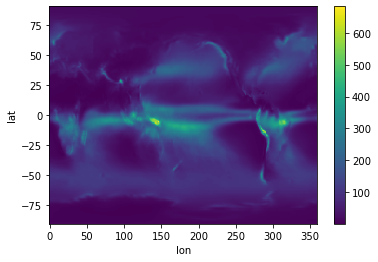

In [6]:
P_CTL.plot()

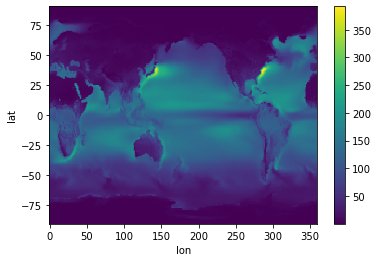

In [7]:
E_CTL.plot()

In [6]:
#############################################################################4
################ Moisture  tracking ##########################################
##############################################################################
# Input information 
# obtain the constants
model='cesm'
lsm_data_CESM = 'landmask_cesm.nc'# insert landseamask here
ice_data_CESM = 'ice_mask.nc'# insert landseamask here

#os.chdir(r'/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/vsc10333/')
area_mask = 'gridarea.nc' #insert area 
latnrs = np.arange(0,192) # minimal domain 
lonnrs = np.arange(0,288) 
# obtain the constants
latitude,longitude,lsm,g,density_water,timestep,A_gridcell,L_N_gridcell,L_S_gridcell,L_EW_gridcell,gridcell = \
    getconstants_pressure_CESM(model,latnrs,lonnrs,lsm_data_CESM,area_mask)
#### Area
with xr.open_dataset(area_mask, decode_times=False) as input:
    area = (input.cell_area) #Pixel area (m2)
#Accomodate coordinates to convert to xarray 
llon = list(longitude.flatten())
llat = list(latitude.flatten())
timetracking = 0        
coordinates = [llon, llat]
dimensions = ["lon", "lat"]

In [12]:
import scipy.io
mat = scipy.io.loadmat(r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/cesm/ctl/0130-01-02fluxes_storages.mat')
print(mat.keys())
print(mat['P'].shape)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/cesm/ctl/0130-01-02fluxes_storages.mat'

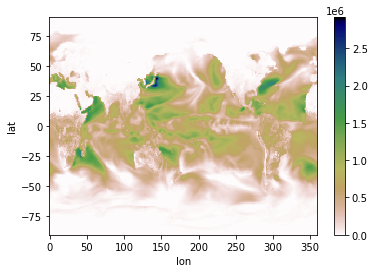

In [12]:
E=np.mean(mat['E'],axis=0)
E_CTL = xr.DataArray(E, coords= [llat, llon], dims= ["lat", "lon"])
E_CTL.plot(cmap='gist_earth_r')

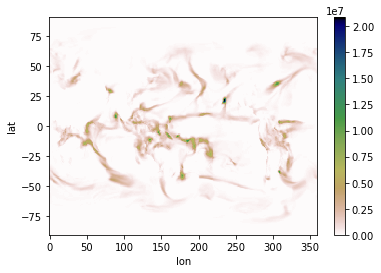

In [13]:
E=np.mean(mat['P'],axis=0)
E_CTL = xr.DataArray(E, coords= [llat, llon], dims= ["lat", "lon"])
E_CTL.plot(cmap='gist_earth_r')

dict_keys(['__header__', '__version__', '__globals__', 'Fa_Vert', 'W_down', 'Fa_E_down', 'Fa_N_top', 'W_top', 'P', 'Fa_E_top', 'E', 'Fa_N_down'])
(96, 192, 288)


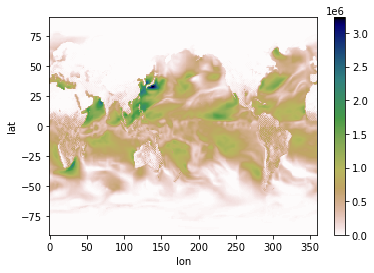

In [9]:
import scipy.io
mat = scipy.io.loadmat(r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/cesm/ctl/elena/0132-01-03fluxes_storages')
print(mat.keys())
print(mat['P'].shape)

E=np.mean(mat['E'],axis=0)
E_CTL = xr.DataArray(E, coords= [llat, llon], dims= ["lat", "lon"])
E_CTL.plot(cmap='gist_earth_r')

dict_keys(['__header__', '__version__', '__globals__', 'Fa_Vert', 'W_down', 'Fa_E_down', 'Fa_N_top', 'W_top', 'P', 'Fa_E_top', 'E', 'Fa_N_down'])
(96, 192, 288)


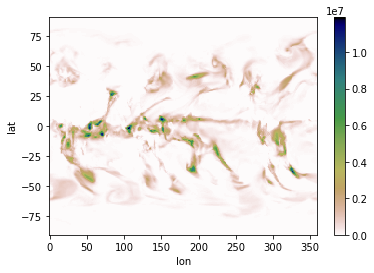

In [10]:
import scipy.io
mat = scipy.io.loadmat(r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/cesm/ctl/elena/0132-01-03fluxes_storages')
print(mat.keys())
print(mat['P'].shape)

E=np.mean(mat['P'],axis=0)
E_CTL = xr.DataArray(E, coords= [llat, llon], dims= ["lat", "lon"])
E_CTL.plot(cmap='gist_earth_r')

In [14]:
import scipy.io
mat = scipy.io.loadmat(r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/mpiesm/ctl/2145-01-03fluxes_storages.mat')
print(mat.keys())
print(mat['E'].shape)

dict_keys(['__header__', '__version__', '__globals__', 'Fa_E_top', 'Fa_N_top', 'Fa_E_down', 'Fa_N_down', 'E', 'P', 'W_top', 'W_down', 'Fa_Vert'])
(96, 96, 192)


In [5]:
lsm_data_CESM = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/mpiesm/landmask_mpiesm.nc'# insert landseamask here

#os.chdir(r'/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/vsc10333/')
area_mask =  r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/mpiesm/gridarea_mpiesm.nc' 
latnrs = np.arange(0,96) # minimal domain 
lonnrs = np.arange(0,192) 
# obtain the constants
latitude,longitude,lsm,g,density_water,timestep,A_gridcell,L_N_gridcell,L_S_gridcell,L_EW_gridcell,gridcell = \
    getconstants_pressure_CESM(model,latnrs,lonnrs,lsm_data_CESM,area_mask)
#### Area
with xr.open_dataset(area_mask, decode_times=False) as input:
    area = (input.cell_area) #Pixel area (m2)
#Accomodate coordinates to convert to xarray 
llon = list(longitude.flatten())
llat = list(latitude.flatten())
timetracking = 0        
llat=llat[::-1]
coordinates = [llon, llat]
dimensions = ["lon", "lat"]


In [8]:
E=np.mean(mat['E'],axis=0)
E_CTL = xr.DataArray(E, coords= [llat, llon], dims= ["lat", "lon"])
E_CTL.plot(cmap='gist_earth_r')

NameError: name 'mat' is not defined

In [8]:


E_CTL = loading_CTL_mpi['E_per_year_per_month']
P_CTL = loading_CTL1_mpi['P_per_year_per_month']

E_CTL_133 = np.mean(E_CTL[0:-1,:,:,:], axis = 0) #mean evaporation 
E_CTL_133 = np.mean(E_CTL_133[:,:,:], axis = 0) #mean evaporation 

E_CTL = xr.DataArray(E_CTL_133, coords= [llat, llon], dims= ["lat", "lon"])
E_CTL = (E_CTL/area.values)*1000 #[mm/month]

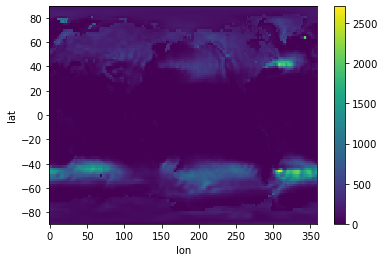

In [13]:
E_CTL=E_CTL*100
E_CTL.plot()

In [7]:
def read_vars_tracking(model,case,l1,l2,l3):
    if model=='cesm':
        lsm_data_CESM = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/cesm/landmask_cesm.nc'
        #os.chdir(r'/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/vsc10333/')
        area_mask = 'gridarea.nc' #insert area 
        latnrs = np.arange(0,192) # minimal domain 
        lonnrs = np.arange(0,288) 
        # obtain the constants
        latitude,longitude,lsm,g,density_water,timestep,A_gridcell,L_N_gridcell,L_S_gridcell,L_EW_gridcell,gridcell = \
            getconstants_pressure_CESM(model,latnrs,lonnrs,lsm_data_CESM,area_mask)
        #### Area
        with xr.open_dataset(area_mask, decode_times=False) as input:
            area = (input.cell_area) #Pixel area (m2)
        #Accomodate coordinates to convert to xarray 
        llon = list(longitude.flatten())
        llat = list(latitude.flatten())
        timetracking = 0        
        coordinates = [llon, llat]
        dimensions = ["lon", "lat"]
    elif model=='mpiesm':
        lsm_data_CESM = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/mpiesm/landmask_mpiesm.nc'# insert landseamask here

        #os.chdir(r'/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/vsc10333/')
        area_mask =  r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/mpiesm/gridarea_mpiesm.nc' 
        latnrs = np.arange(0,96) # minimal domain 
        lonnrs = np.arange(0,192) 
        # obtain the constants
        latitude,longitude,lsm,g,density_water,timestep,A_gridcell,L_N_gridcell,L_S_gridcell,L_EW_gridcell,gridcell = \
            getconstants_pressure_CESM(model,latnrs,lonnrs,lsm_data_CESM,area_mask)
        #### Area
        with xr.open_dataset(area_mask, decode_times=False) as input:
            area = (input.cell_area) #Pixel area (m2)
        #Accomodate coordinates to convert to xarray 
        llon = list(longitude.flatten())
        llat = list(latitude.flatten())
        timetracking = 0        
        llat=llat[::-1]
        coordinates = [llon, llat]
        dimensions = ["lon", "lat"]
        
    elif model=='ecearth':
        lsm_data_CESM = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/ecearth/landmask_ecearth.nc'# insert landseamask here

        #os.chdir(r'/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/vsc10333/')
        area_mask =  r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/ecearth/gridarea_ecearth.nc' 
        latnrs = np.arange(0,256) # minimal domain
        lonnrs = np.arange(0,512)
        # obtain the constants
        latitude,longitude,lsm,g,density_water,timestep,A_gridcell,L_N_gridcell,L_S_gridcell,L_EW_gridcell,gridcell = \
            getconstants_pressure_CESM(model,latnrs,lonnrs,lsm_data_CESM,area_mask)
        #### Area
        with xr.open_dataset(area_mask, decode_times=False) as input:
            area = (input.cell_area) #Pixel area (m2)
        #Accomodate coordinates to convert to xarray 
        llon = list(longitude.flatten())
        llat = list(latitude.flatten())
        timetracking = 0        
        coordinates = [llon, llat]
        dimensions = ["lon", "lat"]
    if case=='frst':
        loading_FRST=l1
        loading_FRST1=l2
        loading_FRST2=l3
        #Variables 
        #FRST
        E_track_FRST = loading_FRST['E_track_per_year_per_month']
        P_track_FRST = loading_FRST1['P_track_per_year_per_month']
        E_FRST = loading_FRST['E_per_year_per_month']
        P_FRST = loading_FRST['P_per_year_per_month']
        Hor_E_flux_FRST = loading_FRST2['Fa_E_down_per_year_per_month'] + loading_FRST2['Fa_E_top_per_year_per_month']
        Hor_N_flux_FRST = loading_FRST2['Fa_N_down_per_year_per_month'] + loading_FRST2['Fa_N_top_per_year_per_month']
    
        #Calculating means 
        #FRST
        E_track_FRST_133 = np.mean(E_track_FRST[0:-1,:,:,:], axis = 0) #selecting only year 133
        E_track_FRST_133 = np.mean(E_track_FRST_133[:,:,:], axis = 0) #selecting only year 133
        E_FRST_133 = np.mean(E_FRST[0:-1,:,:,:], axis = 0) #mean evaporation 
        E_FRST_133 = np.mean(E_FRST_133[:,:,:], axis = 0) #mean evaporation 
        E_flux_FRST = np.mean(Hor_E_flux_FRST[0:-1,:,:,:], axis = 0)
        E_flux_FRST = np.mean(E_flux_FRST[:,:,:], axis = 0)
        N_flux_FRST = np.mean(Hor_N_flux_FRST[0:-1,:,:,:], axis = 0)
        N_flux_FRST = np.mean(N_flux_FRST[:,:,:], axis = 0)

        E_track_FRST_mam = np.mean(np.mean(E_track_FRST[0:-1,2:5,:,:], axis = 0),axis=0) #seasonal calutation march, april, may
        E_track_FRST_jja = np.mean(np.mean(E_track_FRST[0:-1,5:8,:,:], axis = 0),axis=0) #june, july, august
        E_track_FRST_son = np.mean(np.mean(E_track_FRST[0:-1,8:11,:,:], axis = 0),axis=0) #september, october, november
        E_track_FRST_djf = (np.sum(np.mean(E_track_FRST[0:-1,0:2,:,:],axis=0), axis = 0)+np.mean(E_track_FRST[0:-1,11,:,:],axis=0))/3 #dec, jan, feb

        P_track_FRST_133 = np.mean(P_track_FRST[0:-1,:,:,:], axis = 0)
        P_track_FRST_133 = np.mean(P_track_FRST_133[:,:,:], axis = 0)
        P_FRST_133 = np.mean(P_FRST[0:-1,:,:,:], axis = 0) #mean precipitation  
        P_FRST_133 = np.mean(P_FRST_133[:,:,:], axis = 0)#mean precipitation  
        P_E_flux_FRST = np.mean(Hor_E_flux_FRST[1:,:,:,:], axis = 0)
        P_E_flux_FRST = np.mean(P_E_flux_FRST[:,:,:], axis = 0)
        P_N_flux_FRST = np.mean(Hor_N_flux_FRST[1:,:,:,:], axis = 0)
        P_N_flux_FRST = np.mean(P_N_flux_FRST[:,:,:], axis = 0)

        P_track_FRST_mam = np.mean(np.mean(P_track_FRST[0:-1,2:5,:,:], axis = 0),axis=0) #seasonal calutation march, april, may
        P_track_FRST_jja = np.mean(np.mean(P_track_FRST[0:-1,5:8,:,:], axis = 0),axis=0) #june, july, august
        P_track_FRST_son = np.mean(np.mean(P_track_FRST[0:-1,8:11,:,:], axis = 0),axis=0) #september, october, november
        P_track_FRST_djf = (np.sum(np.mean(P_track_FRST[0:-1,0:2,:,:],axis=0), axis = 0)+np.mean(P_track_FRST[0:-1,11,:,:],axis=0))/3 #dec, jan, feb

        E_FRST_jja = np.mean(np.mean(E_FRST[:,5:8,:,:], axis = 0),axis=0) #mean evaporation 
        E_FRST_djf = (np.sum(np.mean(E_FRST[0:-1,0:2,:,:],axis=0), axis = 0)+np.mean(E_FRST[0:-1,11,:,:],axis=0))/3 #dec, jan, feb
        P_FRST_jja = np.mean(np.mean(P_FRST[:,5:8,:,:], axis = 0),axis=0) #mean evaporation 
        P_FRST_djf = (np.sum(np.mean(P_FRST[0:-1,0:2,:,:],axis=0), axis = 0)+np.mean(P_FRST[0:-1,11,:,:],axis=0))/3 #dec, jan, feb
        
        #Transforming to XARRAY
        #FRST
        #FRST
        Ex_track_FRST = xr.DataArray(E_track_FRST_133, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_track_FRST = (Ex_track_FRST/area.values)*1000 #[mm/month]
        Ex_FRST = xr.DataArray(E_FRST_133, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_FRST = (Ex_FRST/area.values)*1000 #[mm/month]
        E_c_FRST = Ex_track_FRST/Ex_FRST
        Px_FRST_133 = xr.DataArray(P_FRST_133, coords= [llat, llon], dims= ["lat", "lon"])
        Px_FRST_133 = (Px_FRST_133/area.values)*1000 #[mm/month]
        Px_track_FRST = xr.DataArray(P_track_FRST_133, coords= [llat, llon], dims= ["lat", "lon"])
        Px_track_FRST= (Px_track_FRST/area.values)*1000 #[mm/month]
        P_c_FRST = Px_track_FRST/Px_FRST_133
        Ex_flux_FRST = xr.DataArray(E_flux_FRST, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_flux_FRST = (Ex_flux_FRST/area.values)
        Nx_flux_FRST = xr.DataArray(N_flux_FRST, coords= [llat, llon], dims= ["lat", "lon"])
        Nx_flux_FRST = (Nx_flux_FRST/area.values)
        P_Ex_flux_FRST = xr.DataArray(P_E_flux_FRST, coords= [llat, llon], dims= ["lat", "lon"])
        P_Ex_flux_FRST = (P_Ex_flux_FRST/area.values)
        P_Nx_flux_FRST = xr.DataArray(P_N_flux_FRST, coords= [llat, llon], dims= ["lat", "lon"])
        P_Nx_flux_FRST = (P_Nx_flux_FRST/area.values)
        Ex_track_FRST_mam=xr.DataArray(E_track_FRST_mam, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_track_FRST_mam=(Ex_track_FRST_mam/area.values)*1000 #[mm/month]
        Ex_track_FRST_jja=xr.DataArray(E_track_FRST_jja, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_track_FRST_jja=(Ex_track_FRST_jja/area.values)*1000 #[mm/month]
        Ex_track_FRST_son=xr.DataArray(E_track_FRST_son, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_track_FRST_son=(Ex_track_FRST_son/area.values)*1000 #[mm/month]
        Ex_track_FRST_djf=xr.DataArray(E_track_FRST_djf, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_track_FRST_djf=(Ex_track_FRST_djf/area.values)*1000 #[mm/month]
        Px_track_FRST_mam=xr.DataArray(P_track_FRST_mam, coords= [llat, llon], dims= ["lat", "lon"])
        Px_track_FRST_mam=(Px_track_FRST_mam/area.values)*1000 #[mm/month]
        Px_track_FRST_jja=xr.DataArray(P_track_FRST_jja, coords= [llat, llon], dims= ["lat", "lon"])
        Px_track_FRST_jja=(Px_track_FRST_jja/area.values)*1000 #[mm/month]
        Px_track_FRST_son=xr.DataArray(P_track_FRST_son, coords= [llat, llon], dims= ["lat", "lon"])
        Px_track_FRST_son=(Px_track_FRST_son/area.values)*1000 #[mm/month]
        Px_track_FRST_djf=xr.DataArray(P_track_FRST_djf, coords= [llat, llon], dims= ["lat", "lon"])
        Px_track_FRST_djf=(Px_track_FRST_djf/area.values)*1000 #[mm/month]

        return Ex_track_FRST,Px_track_FRST,Ex_FRST,Px_FRST_133,E_c_FRST,P_c_FRST
    elif case=='ctl':
        loading_CTL=l1
        loading_CTL1=l2
        loading_CTL2=l3
        #Variables 
        #CTL
        E_track_CTL = loading_CTL['E_track_per_year_per_month']
        P_track_CTL = loading_CTL1['P_track_per_year_per_month']
        E_CTL = loading_CTL['E_per_year_per_month']
        P_CTL = loading_CTL1['P_per_year_per_month']
        Hor_E_flux_CTL = loading_CTL2['Fa_E_down_per_year_per_month'] + loading_CTL2['Fa_E_top_per_year_per_month']
        Hor_N_flux_CTL = loading_CTL2['Fa_N_down_per_year_per_month'] + loading_CTL2['Fa_N_top_per_year_per_month']
  
        #CTL
        E_track_CTL_133 = np.mean(E_track_CTL[0:-1,:,:,:], axis = 0) #selecting only year 133
        E_track_CTL_133 = np.mean(E_track_CTL_133[:,:,:], axis = 0) #selecting only year 133
        E_CTL_133 = np.mean(E_CTL[0:-1,:,:,:], axis = 0) #mean evaporation 
        E_CTL_133 = np.mean(E_CTL_133[:,:,:], axis = 0) #mean evaporation 
        E_flux_CTL = np.mean(Hor_E_flux_CTL[0:-1,:,:,:], axis = 0)
        E_flux_CTL = np.mean(E_flux_CTL[:,:,:], axis = 0)
        N_flux_CTL = np.mean(Hor_N_flux_CTL[0:-1,:,:,:], axis = 0)
        N_flux_CTL = np.mean(N_flux_CTL[:,:,:], axis = 0)

        P_track_CTL_133 = np.mean(P_track_CTL[0:-1,:,:,:], axis = 0)
        P_track_CTL_133 = np.mean(P_track_CTL_133[:,:,:], axis = 0)
        P_CTL_133 = np.mean(P_CTL[0:-1,:,:,:], axis = 0) #mean precipitation  
        P_CTL_133 = np.mean(P_CTL_133[:,:,:], axis = 0)#mean precipitation  
        P_E_flux_CTL = np.mean(Hor_E_flux_CTL[1:,:,:,:], axis = 0)
        P_E_flux_CTL = np.mean(P_E_flux_CTL[:,:,:], axis = 0)
        P_N_flux_CTL = np.mean(Hor_N_flux_CTL[1:,:,:,:], axis = 0)
        P_N_flux_CTL = np.mean(P_N_flux_CTL[:,:,:], axis = 0)

        E_track_CTL_mam = np.mean(np.mean(E_track_CTL[0:-1,2:5,:,:], axis = 0),axis=0) #seasonal calutation march, april, may
        E_track_CTL_jja = np.mean(np.mean(E_track_CTL[0:-1,5:8,:,:], axis = 0),axis=0) #june, july, august
        E_track_CTL_son = np.mean(np.mean(E_track_CTL[0:-1,8:11,:,:], axis = 0),axis=0) #september, october, november
        E_track_CTL_djf = (np.sum(np.mean(E_track_CTL[0:-1,0:2,:,:],axis=0), axis = 0)+np.mean(E_track_CTL[0:-1,11,:,:],axis=0))/3 #dec, jan, feb


        P_track_CTL_mam = np.mean(np.mean(P_track_CTL[0:-1,2:5,:,:], axis = 0),axis=0) #seasonal calutation march, april, may
        P_track_CTL_jja = np.mean(np.mean(P_track_CTL[0:-1,5:8,:,:], axis = 0),axis=0) #june, july, august
        P_track_CTL_son = np.mean(np.mean(P_track_CTL[0:-1,8:11,:,:], axis = 0),axis=0) #september, october, november
        P_track_CTL_djf = (np.sum(np.mean(P_track_CTL[0:-1,0:2,:,:],axis=0), axis = 0)+np.mean(P_track_CTL[0:-1,11,:,:],axis=0))/3 #dec, jan, feb

        E_CTL_jja = np.mean(np.mean(E_CTL[:,5:8,:,:], axis = 0),axis=0) #mean evaporation 
        E_CTL_djf = (np.sum(np.mean(E_CTL[0:-1,0:2,:,:],axis=0), axis = 0)+np.mean(E_CTL[0:-1,11,:,:],axis=0))/3 #dec, jan, feb
        P_CTL_jja = np.mean(np.mean(P_CTL[:,5:8,:,:], axis = 0),axis=0) #mean evaporation 
        P_CTL_djf = (np.sum(np.mean(P_CTL[0:-1,0:2,:,:],axis=0), axis = 0)+np.mean(P_CTL[0:-1,11,:,:],axis=0))/3 #dec, jan, feb
    

        #CTL
        Ex_track_CTL = xr.DataArray(E_track_CTL_133, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_track_CTL = (Ex_track_CTL/area.values)*1000 #[mm/month]
        Ex_CTL = xr.DataArray(E_CTL_133, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_CTL = (Ex_CTL/area.values)*1000 #[mm/month]
        E_c_CTL = Ex_track_CTL/Ex_CTL
        Px_CTL_133 = xr.DataArray(P_CTL_133, coords= [llat, llon], dims= ["lat", "lon"])
        Px_CTL_133 = (Px_CTL_133/area.values)*1000 #[mm/month]
        Px_track_CTL = xr.DataArray(P_track_CTL_133, coords= [llat, llon], dims= ["lat", "lon"])
        Px_track_CTL= (Px_track_CTL/area.values)*1000 #[mm/month]
        P_c_CTL = Px_track_CTL/Px_CTL_133
        Ex_flux_CTL = xr.DataArray(E_flux_CTL, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_flux_CTL = (Ex_flux_CTL/area.values)
        Nx_flux_CTL = xr.DataArray(N_flux_CTL, coords= [llat, llon], dims= ["lat", "lon"])
        Nx_flux_CTL = (Nx_flux_CTL/area.values)
        P_Ex_flux_CTL = xr.DataArray(P_E_flux_CTL, coords= [llat, llon], dims= ["lat", "lon"])
        P_Ex_flux_CTL = (P_Ex_flux_CTL/area.values)
        P_Nx_flux_CTL = xr.DataArray(P_N_flux_CTL, coords= [llat, llon], dims= ["lat", "lon"])
        P_Nx_flux_CTL = (P_Nx_flux_CTL/area.values)
        Ex_track_CTL_mam=xr.DataArray(E_track_CTL_mam, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_track_CTL_mam=(Ex_track_CTL_mam/area.values)*1000 #[mm/month]
        Ex_track_CTL_jja=xr.DataArray(E_track_CTL_jja, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_track_CTL_jja=(Ex_track_CTL_jja/area.values)*1000 #[mm/month]
        Ex_track_CTL_son=xr.DataArray(E_track_CTL_son, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_track_CTL_son=(Ex_track_CTL_son/area.values)*1000 #[mm/month]
        Ex_track_CTL_djf=xr.DataArray(E_track_CTL_djf, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_track_CTL_djf=(Ex_track_CTL_djf/area.values)*1000 #[mm/month]
        Px_track_CTL_mam=xr.DataArray(P_track_CTL_mam, coords= [llat, llon], dims= ["lat", "lon"])
        Px_track_CTL_mam=(Px_track_CTL_mam/area.values)*1000 #[mm/month]
        Px_track_CTL_jja=xr.DataArray(P_track_CTL_jja, coords= [llat, llon], dims= ["lat", "lon"])
        Px_track_CTL_jja=(Px_track_CTL_jja/area.values)*1000 #[mm/month]
        Px_track_CTL_son=xr.DataArray(P_track_CTL_son, coords= [llat, llon], dims= ["lat", "lon"])
        Px_track_CTL_son=(Px_track_CTL_son/area.values)*1000 #[mm/month]
        Px_track_CTL_djf=xr.DataArray(P_track_CTL_djf, coords= [llat, llon], dims= ["lat", "lon"])
        Px_track_CTL_djf=(Px_track_CTL_djf/area.values)*1000 #[mm/month]
        
        return Ex_track_CTL,Px_track_CTL,Ex_CTL,Px_CTL_133,E_c_CTL,P_c_CTL
    elif case=='crop':
        loading_CROP=l1
        loading_CROP1=l2
        loading_CROP2=l3
      #CROP
        E_track_CROP = loading_CROP['E_track_per_year_per_month']
        P_track_CROP = loading_CROP1['P_track_per_year_per_month']
        E_CROP = loading_CROP['E_per_year_per_month']
        P_CROP = loading_CROP1['P_per_year_per_month']
        Hor_E_flux_CROP = loading_CROP2['Fa_E_down_per_year_per_month'] + loading_CROP2['Fa_E_top_per_year_per_month']
        Hor_N_flux_CROP = loading_CROP2['Fa_N_down_per_year_per_month'] + loading_CROP2['Fa_N_top_per_year_per_month']
 
        #CROP
        E_track_CROP_133 = np.mean(E_track_CROP[0:-1,:,:,:], axis = 0) #selecting only year 133
        E_track_CROP_133 = np.mean(E_track_CROP_133[:,:,:], axis = 0) #selecting only year 133
        E_CROP_133 = np.mean(E_CROP[0:-1,:,:,:], axis = 0) #mean evaporation 
        E_CROP_133 = np.mean(E_CROP_133[:,:,:], axis = 0) #mean evaporation 
        E_flux_CROP = np.mean(Hor_E_flux_CROP[0:-1,:,:,:], axis = 0)
        E_flux_CROP = np.mean(E_flux_CROP[:,:,:], axis = 0)
        N_flux_CROP = np.mean(Hor_N_flux_CROP[0:-1,:,:,:], axis = 0)
        N_flux_CROP = np.mean(N_flux_CROP[:,:,:], axis = 0)

        P_track_CROP_133 = np.mean(P_track_CROP[0:-1,:,:,:], axis = 0)
        P_track_CROP_133 = np.mean(P_track_CROP_133[:,:,:], axis = 0)
        P_CROP_133 = np.mean(P_CROP[0:-1,:,:,:], axis = 0) #mean precipitation  
        P_CROP_133 = np.mean(P_CROP_133[:,:,:], axis = 0)#mean precipitation  
        P_E_flux_CROP = np.mean(Hor_E_flux_CROP[1:,:,:,:], axis = 0)
        P_E_flux_CROP = np.mean(P_E_flux_CROP[:,:,:], axis = 0)
        P_N_flux_CROP = np.mean(Hor_N_flux_CROP[1:,:,:,:], axis = 0)
        P_N_flux_CROP = np.mean(P_N_flux_CROP[:,:,:], axis = 0)

        E_track_CROP_mam = np.mean(np.mean(E_track_CROP[0:-1,2:5,:,:], axis = 0),axis=0) #seasonal calutation march, april, may
        E_track_CROP_jja = np.mean(np.mean(E_track_CROP[0:-1,5:8,:,:], axis = 0),axis=0) #june, july, august
        E_track_CROP_son = np.mean(np.mean(E_track_CROP[0:-1,8:11,:,:], axis = 0),axis=0) #september, october, november
        E_track_CROP_djf = (np.sum(np.mean(E_track_CROP[0:-1,0:2,:,:],axis=0), axis = 0)+np.mean(E_track_CROP[0:-1,11,:,:],axis=0))/3 #dec, jan, feb


        P_track_CROP_mam = np.mean(np.mean(P_track_CROP[0:-1,2:5,:,:], axis = 0),axis=0) #seasonal calutation march, april, may
        P_track_CROP_jja = np.mean(np.mean(P_track_CROP[0:-1,5:8,:,:], axis = 0),axis=0) #june, july, august
        P_track_CROP_son = np.mean(np.mean(P_track_CROP[0:-1,8:11,:,:], axis = 0),axis=0) #september, october, november
        P_track_CROP_djf = (np.sum(np.mean(P_track_CROP[0:-1,0:2,:,:],axis=0), axis = 0)+np.mean(P_track_CROP[0:-1,11,:,:],axis=0))/3 #dec, jan, feb

        E_CROP_jja = np.mean(np.mean(E_CROP[:,5:8,:,:], axis = 0),axis=0) #mean evaporation 
        E_CROP_djf = (np.sum(np.mean(E_CROP[0:-1,0:2,:,:],axis=0), axis = 0)+np.mean(E_CROP[0:-1,11,:,:],axis=0))/3 #dec, jan, feb
        P_CROP_jja = np.mean(np.mean(P_CROP[:,5:8,:,:], axis = 0),axis=0) #mean evaporation 
        P_CROP_djf = (np.sum(np.mean(P_CROP[0:-1,0:2,:,:],axis=0), axis = 0)+np.mean(P_CROP[0:-1,11,:,:],axis=0))/3 #dec, jan, feb
    
        
        #CROP
        Ex_track_CROP = xr.DataArray(E_track_CROP_133, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_track_CROP = (Ex_track_CROP/area.values)*1000 #[mm/month]
        Ex_CROP = xr.DataArray(E_CROP_133, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_CROP = (Ex_CROP/area.values)*1000 #[mm/month]
        E_c_CROP = Ex_track_CROP/Ex_CROP
        Px_CROP_133 = xr.DataArray(P_CROP_133, coords= [llat, llon], dims= ["lat", "lon"])
        Px_CROP_133 = (Px_CROP_133/area.values)*1000 #[mm/month]
        Px_track_CROP = xr.DataArray(P_track_CROP_133, coords= [llat, llon], dims= ["lat", "lon"])
        Px_track_CROP= (Px_track_CROP/area.values)*1000 #[mm/month]
        P_c_CROP = Px_track_CROP/Px_CROP_133
        Ex_flux_CROP = xr.DataArray(E_flux_CROP, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_flux_CROP = (Ex_flux_CROP/area.values)
        Nx_flux_CROP = xr.DataArray(N_flux_CROP, coords= [llat, llon], dims= ["lat", "lon"])
        Nx_flux_CROP = (Nx_flux_CROP/area.values)
        P_Ex_flux_CROP = xr.DataArray(P_E_flux_CROP, coords= [llat, llon], dims= ["lat", "lon"])
        P_Ex_flux_CROP = (P_Ex_flux_CROP/area.values)
        P_Nx_flux_CROP = xr.DataArray(P_N_flux_CROP, coords= [llat, llon], dims= ["lat", "lon"])
        P_Nx_flux_CROP = (P_Nx_flux_CROP/area.values)
        Ex_track_CROP_mam=xr.DataArray(E_track_CROP_mam, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_track_CROP_mam=(Ex_track_CROP_mam/area.values)*1000 #[mm/month]
        Ex_track_CROP_jja=xr.DataArray(E_track_CROP_jja, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_track_CROP_jja=(Ex_track_CROP_jja/area.values)*1000 #[mm/month]
        Ex_track_CROP_son=xr.DataArray(E_track_CROP_son, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_track_CROP_son=(Ex_track_CROP_son/area.values)*1000 #[mm/month]
        Ex_track_CROP_djf=xr.DataArray(E_track_CROP_djf, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_track_CROP_djf=(Ex_track_CROP_djf/area.values)*1000 #[mm/month]
        Px_track_CROP_mam=xr.DataArray(P_track_CROP_mam, coords= [llat, llon], dims= ["lat", "lon"])
        Px_track_CROP_mam=(Px_track_CROP_mam/area.values)*1000 #[mm/month]
        Px_track_CROP_jja=xr.DataArray(P_track_CROP_jja, coords= [llat, llon], dims= ["lat", "lon"])
        Px_track_CROP_jja=(Px_track_CROP_jja/area.values)*1000 #[mm/month]
        Px_track_CROP_son=xr.DataArray(P_track_CROP_son, coords= [llat, llon], dims= ["lat", "lon"])
        Px_track_CROP_son=(Px_track_CROP_son/area.values)*1000 #[mm/month]
        Px_track_CROP_djf=xr.DataArray(P_track_CROP_djf, coords= [llat, llon], dims= ["lat", "lon"])
        Px_track_CROP_djf=(Px_track_CROP_djf/area.values)*1000 #[mm/month]
        
        return Ex_track_CROP,Px_track_CROP,Ex_CROP,Px_CROP_133,E_c_CROP,P_c_CROP
    elif case=='irr':
        loading_IRRIG=l1
        loading_IRRIG1=l2
        loading_IRRIG2=l3
       #IRRIG
        E_track_IRRIG = loading_IRRIG['E_track_per_year_per_month']
        P_track_IRRIG = loading_IRRIG1['P_track_per_year_per_month']
        E_IRRIG = loading_IRRIG['E_per_year_per_month']
        P_IRRIG = loading_IRRIG1['P_per_year_per_month']
        Hor_E_flux_IRRIG = loading_IRRIG2['Fa_E_down_per_year_per_month'] + loading_IRRIG2['Fa_E_top_per_year_per_month']
        Hor_N_flux_IRRIG = loading_IRRIG2['Fa_N_down_per_year_per_month'] + loading_IRRIG2['Fa_N_top_per_year_per_month']
        #IRRIG
        E_track_IRRIG_133 = np.mean(E_track_IRRIG[0:-1,:,:,:], axis = 0) #selecting only year 133
        E_track_IRRIG_133 = np.mean(E_track_IRRIG_133[:,:,:], axis = 0) #selecting only year 133
        E_IRRIG_133 = np.mean(E_IRRIG[0:-1,:,:,:], axis = 0) #mean evaporation 
        E_IRRIG_133 = np.mean(E_IRRIG_133[:,:,:], axis = 0) #mean evaporation 
        E_flux_IRRIG = np.mean(Hor_E_flux_IRRIG[0:-1,:,:,:], axis = 0)
        E_flux_IRRIG = np.mean(E_flux_IRRIG[:,:,:], axis = 0)
        N_flux_IRRIG = np.mean(Hor_N_flux_IRRIG[0:-1,:,:,:], axis = 0)
        N_flux_IRRIG = np.mean(N_flux_IRRIG[:,:,:], axis = 0)

        P_track_IRRIG_133 = np.mean(P_track_IRRIG[0:-1,:,:,:], axis = 0)
        P_track_IRRIG_133 = np.mean(P_track_IRRIG_133[:,:,:], axis = 0)
        P_IRRIG_133 = np.mean(P_IRRIG[0:-1,:,:,:], axis = 0) #mean precipitation  
        P_IRRIG_133 = np.mean(P_IRRIG_133[:,:,:], axis = 0)#mean precipitation  
        P_E_flux_IRRIG = np.mean(Hor_E_flux_IRRIG[1:,:,:,:], axis = 0)
        P_E_flux_IRRIG = np.mean(P_E_flux_IRRIG[:,:,:], axis = 0)
        P_N_flux_IRRIG = np.mean(Hor_N_flux_IRRIG[1:,:,:,:], axis = 0)
        P_N_flux_IRRIG = np.mean(P_N_flux_IRRIG[:,:,:], axis = 0)  

        E_track_IRRIG_mam = np.mean(np.mean(E_track_IRRIG[0:-1,2:5,:,:], axis = 0),axis=0) #seasonal calutation march, april, may
        E_track_IRRIG_jja = np.mean(np.mean(E_track_IRRIG[0:-1,5:8,:,:], axis = 0),axis=0) #june, july, august
        E_track_IRRIG_son = np.mean(np.mean(E_track_IRRIG[0:-1,8:11,:,:], axis = 0),axis=0) #september, october, november
        E_track_IRRIG_djf = (np.sum(np.mean(E_track_IRRIG[0:-1,0:2,:,:],axis=0), axis = 0)+np.mean(E_track_IRRIG[0:-1,11,:,:],axis=0))/3 #dec, jan, feb


        P_track_IRRIG_mam = np.mean(np.mean(P_track_IRRIG[0:-1,2:5,:,:], axis = 0),axis=0) #seasonal calutation march, april, may
        P_track_IRRIG_jja = np.mean(np.mean(P_track_IRRIG[0:-1,5:8,:,:], axis = 0),axis=0) #june, july, august
        P_track_IRRIG_son = np.mean(np.mean(P_track_IRRIG[0:-1,8:11,:,:], axis = 0),axis=0) #september, october, november
        P_track_IRRIG_djf = (np.sum(np.mean(P_track_IRRIG[0:-1,0:2,:,:],axis=0), axis = 0)+np.mean(P_track_IRRIG[0:-1,11,:,:],axis=0))/3 #dec, jan, feb

        E_IRRIG_jja = np.mean(np.mean(E_IRRIG[:,5:8,:,:], axis = 0),axis=0) #mean evaporation 
        E_IRRIG_djf = (np.sum(np.mean(E_IRRIG[0:-1,0:2,:,:],axis=0), axis = 0)+np.mean(E_IRRIG[0:-1,11,:,:],axis=0))/3 #dec, jan, feb
        P_IRRIG_jja = np.mean(np.mean(P_IRRIG[:,5:8,:,:], axis = 0),axis=0) #mean evaporation 
        P_IRRIG_djf = (np.sum(np.mean(P_IRRIG[0:-1,0:2,:,:],axis=0), axis = 0)+np.mean(P_IRRIG[0:-1,11,:,:],axis=0))/3 #dec, jan, feb



        #IRRIG
        Ex_track_IRRIG = xr.DataArray(E_track_IRRIG_133, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_track_IRRIG = (Ex_track_IRRIG/area.values)*1000 #[mm/month]
        Ex_IRRIG = xr.DataArray(E_IRRIG_133, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_IRRIG = (Ex_IRRIG/area.values)*1000 #[mm/month]
        E_c_IRRIG = Ex_track_IRRIG/Ex_IRRIG
        Px_IRRIG_133 = xr.DataArray(P_IRRIG_133, coords= [llat, llon], dims= ["lat", "lon"])
        Px_IRRIG_133 = (Px_IRRIG_133/area.values)*1000 #[mm/month]
        Px_track_IRRIG = xr.DataArray(P_track_IRRIG_133, coords= [llat, llon], dims= ["lat", "lon"])
        Px_track_IRRIG= (Px_track_IRRIG/area.values)*1000 #[mm/month]
        P_c_IRRIG = Px_track_IRRIG/Px_IRRIG_133
        Ex_flux_IRRIG = xr.DataArray(E_flux_IRRIG, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_flux_IRRIG = (Ex_flux_IRRIG/area.values)
        Nx_flux_IRRIG = xr.DataArray(N_flux_IRRIG, coords= [llat, llon], dims= ["lat", "lon"])
        Nx_flux_IRRIG = (Nx_flux_IRRIG/area.values)
        P_Ex_flux_IRRIG = xr.DataArray(P_E_flux_IRRIG, coords= [llat, llon], dims= ["lat", "lon"])
        P_Ex_flux_IRRIG = (P_Ex_flux_IRRIG/area.values)
        P_Nx_flux_IRRIG = xr.DataArray(P_N_flux_IRRIG, coords= [llat, llon], dims= ["lat", "lon"])
        P_Nx_flux_IRRIG = (P_Nx_flux_IRRIG/area.values)
        Ex_track_IRRIG_mam=xr.DataArray(E_track_IRRIG_mam, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_track_IRRIG_mam=(Ex_track_IRRIG_mam/area.values)*1000 #[mm/month]
        Ex_track_IRRIG_jja=xr.DataArray(E_track_IRRIG_jja, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_track_IRRIG_jja=(Ex_track_IRRIG_jja/area.values)*1000 #[mm/month]
        Ex_track_IRRIG_son=xr.DataArray(E_track_IRRIG_son, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_track_IRRIG_son=(Ex_track_IRRIG_son/area.values)*1000 #[mm/month]
        Ex_track_IRRIG_djf=xr.DataArray(E_track_IRRIG_djf, coords= [llat, llon], dims= ["lat", "lon"])
        Ex_track_IRRIG_djf=(Ex_track_IRRIG_djf/area.values)*1000 #[mm/month]
        Px_track_IRRIG_mam=xr.DataArray(P_track_IRRIG_mam, coords= [llat, llon], dims= ["lat", "lon"])
        Px_track_IRRIG_mam=(Px_track_IRRIG_mam/area.values)*1000 #[mm/month]
        Px_track_IRRIG_jja=xr.DataArray(P_track_IRRIG_jja, coords= [llat, llon], dims= ["lat", "lon"])
        Px_track_IRRIG_jja=(Px_track_IRRIG_jja/area.values)*1000 #[mm/month]
        Px_track_IRRIG_son=xr.DataArray(P_track_IRRIG_son, coords= [llat, llon], dims= ["lat", "lon"])
        Px_track_IRRIG_son=(Px_track_IRRIG_son/area.values)*1000 #[mm/month]
        Px_track_IRRIG_djf=xr.DataArray(P_track_IRRIG_djf, coords= [llat, llon], dims= ["lat", "lon"])
        Px_track_IRRIG_djf=(Px_track_IRRIG_djf/area.values)*1000 #[mm/month]

        return Ex_track_IRRIG,Px_track_IRRIG,Ex_IRRIG,Px_IRRIG_133,E_c_IRRIG,P_c_IRRIG

   
        #%%

In [8]:
model='cesm'
Ex_track_FRST,Px_track_FRST,Ex_FRST,Px_FRST,E_c_FRST,P_c_FRST=read_vars_tracking(model,'frst',loading_FRST,loading_FRST1,loading_FRST2)
Ex_track_CTL,Px_track_CTL,Ex_CTL,Px_CTL,E_c_CTL,P_c_CTL=read_vars_tracking(model,'ctl',loading_CTL,loading_CTL1,loading_CTL2)
Ex_track_CROP,Px_track_CROP,Ex_CROP,Px_CROP,E_c_CROP,P_c_CROP=read_vars_tracking(model,'crop',loading_CROP,loading_CROP1,loading_CROP2)
Ex_track_IRRIG,Px_track_IRRIG,Ex_IRRIG,Px_IRRIG,E_c_IRRIG,P_c_IRRIG=read_vars_tracking(model,'irr',loading_IRRIG,loading_IRRIG1,loading_IRRIG2)

In [9]:
model='mpiesm'
Ex_track_FRST_mpi,Px_track_FRST_mpi,Ex_FRST_mpi,Px_FRST_mpi,E_c_FRST_mpi,P_c_FRST_mpi=read_vars_tracking(model,'frst',loading_FRST_mpi,loading_FRST1_mpi,loading_FRST2_mpi)
Ex_track_CTL_mpi,Px_track_CTL_mpi,Ex_CTL_mpi,Px_CTL_mpi,E_c_CTL_mpi,P_c_CTL_mpi=read_vars_tracking(model,'ctl',loading_CTL_mpi,loading_CTL1_mpi,loading_CTL2_mpi)
Ex_track_CROP_mpi,Px_track_CROP_mpi,Ex_CROP_mpi,Px_CROP_mpi,E_c_CROP_mpi,P_c_CROP_mpi=read_vars_tracking(model,'crop',loading_CROP_mpi,loading_CROP1_mpi,loading_CROP2_mpi)
Ex_track_IRRIG_mpi,Px_track_IRRIG_mpi,Ex_IRRIG_mpi,Px_IRRIG_mpi,E_c_IRRIG_mpi,P_c_IRRIG_mpi=read_vars_tracking(model,'irr',loading_IRRIG_mpi,loading_IRRIG1_mpi,loading_IRRIG2_mpi)

In [10]:
model='ecearth'
#Ex_track_FRST_ec,Px_track_FRST_ec,Ex_FRST_ec,Px_FRST_ec,E_c_FRST_ec,P_c_FRST_ec=read_vars_tracking(model,'frst',loading_FRST_ec,loading_FRST1_ec,loading_FRST2_ec)
Ex_track_CTL_ec,Px_track_CTL_ec,Ex_CTL_ec,Px_CTL_ec,E_c_CTL_ec,P_c_CTL_ec=read_vars_tracking(model,'ctl',loading_CTL_ec,loading_CTL1_ec,loading_CTL2_ec)
Ex_track_CROP_ec,Px_track_CROP_ec,Ex_CROP_ec,Px_CROP_ec,E_c_CROP_ec,P_c_CROP_ec=read_vars_tracking(model,'crop',loading_CROP_ec,loading_CROP1_ec,loading_CROP2_ec)


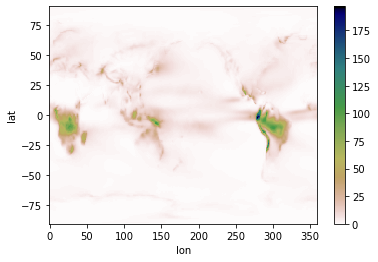

In [12]:
Px_track_CTL.plot(cmap='gist_earth_r')

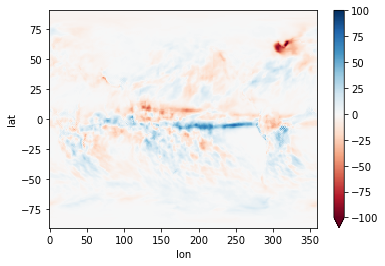

In [11]:
jos=Px_FRST-Px_CTL
jos.plot(vmin=-100,vmax=100,cmap='RdBu')

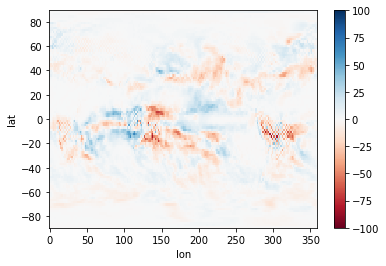

In [13]:
jos=Px_CROP_mpi-Px_CTL_mpi
jos.plot(vmin=-100,vmax=100,cmap='RdBu')

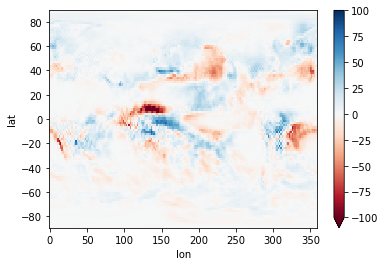

In [14]:
jos=Px_FRST_mpi-Px_CTL_mpi
jos.plot(vmin=-100,vmax=100,cmap='RdBu')

In [11]:

#%%
###############################
# DIFFERENCES AND CONCATENATION 
##################################################
###############################
# DIFFERENCES AND CONCATENATION 
##################################################
Difa_Em_FRST = (Ex_track_FRST - Ex_track_CTL)
Difa_Em_CROP = (Ex_track_CROP - Ex_track_CTL)
Difa_Em_IRRIG = (Ex_track_IRRIG - Ex_track_CROP)
#Difr_Em_FRST = ((Ex_track_FRST - Ex_track_CTL)/Ex_track_CTL*100)*lsm
#Difr_Em_CROP = ((Ex_track_CROP - Ex_track_CTL)/Ex_track_CTL*100)*lsm
#Difr_Em_IRRIG = ((Ex_track_IRRIG - Ex_track_CROP)/Ex_track_CROP*100)*lsm

Difa_Pm_FRST = (Px_track_FRST - Px_track_CTL)
Difa_Pm_CROP = (Px_track_CROP - Px_track_CTL)
Difa_Pm_IRRIG = (Px_track_IRRIG - Px_track_CROP)
#Difr_Pm_FRST = ((Px_track_FRST - Px_track_CTL)/Px_track_CTL*100)*lsm
#Difr_Pm_CROP = ((Px_track_CROP - Px_track_CTL)/Px_track_CTL*100)*lsm
#Difr_Pm_IRRIG = ((Px_track_IRRIG - Px_track_CROP)/Px_track_CROP*100)*lsm

Difa_RE_FRST = (E_c_FRST - E_c_CTL)
Difa_RE_CROP = (E_c_CROP - E_c_CTL)
Difa_RE_IRRIG = (E_c_IRRIG - E_c_CROP)
#Difr_RE_FRST = ((E_c_FRST - E_c_CTL)*100)*lsm
#Difr_RE_CROP = ((E_c_CROP - E_c_CTL)*100)*lsm
#Difr_RE_IRRIG = ((E_c_IRRIG - E_c_CROP)*100)*lsm

Difa_RP_FRST = (P_c_FRST - P_c_CTL)
Difa_RP_CROP = (P_c_CROP - P_c_CTL)
Difa_RP_IRRIG = (P_c_IRRIG - P_c_CROP)
#Difr_RP_FRST = ((P_c_FRST - P_c_CTL)*100)*lsm
#Difr_RP_CROP = ((P_c_CROP - P_c_CTL)*100)*lsm
#Difr_RP_IRRIG = ((P_c_IRRIG - P_c_CROP)*100)*lsm

In [12]:
#what is the contribution of land? 
lsm_data_CESM = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/cesm/landmask_cesm.nc'
ds_mask = xr.open_dataset(lsm_data_CESM)
da_mask=ds_mask['landmask']  
area_mask = 'gridarea.nc' #insert area 
ds_area = xr.open_dataset(area_mask)
da_area=ds_area['cell_area']*10**(-6)  

lsm_data_MPIESM = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/mpiesm/landmask_mpiesm.nc'# insert landseamask here
ds_mask = xr.open_dataset(lsm_data_MPIESM)
da_mask_mpi=ds_mask['landmask']  
area_mask_mpi =  r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/mpiesm/gridarea_mpiesm.nc' 
ds_area_mpi = xr.open_dataset(area_mask_mpi)
da_area_mpi=ds_area_mpi['cell_area']*10**(-6)

lsm_data_EC = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/ecearth/landmask_ecearth.nc'# insert landseamask here
ds_mask = xr.open_dataset(lsm_data_EC)
da_mask_ec=ds_mask['landmask']  
area_mask_ec =  r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/ecearth/gridarea_ecearth.nc' 
ds_area_ec = xr.open_dataset(area_mask_ec)
da_area_ec=ds_area_ec['cell_area']*10**(-6)

conv=365*10**(-6)*da_area.values ##mm/day to km3/year

rho_P_CTL=np.nansum(xr.where(da_mask==1,P_c_CTL,np.nan)*xr.where(da_mask==1,Px_CTL*conv,np.nan))/np.nansum(xr.where(da_mask==1,Px_CTL*conv,np.nan))
rho_P_CROP=np.nansum(xr.where(da_mask==1,P_c_CROP,np.nan)*xr.where(da_mask==1,Px_CROP*conv,np.nan))/np.nansum(xr.where(da_mask==1,Px_CROP*conv,np.nan))
rho_P_FRST=np.nansum(xr.where(da_mask==1,P_c_FRST,np.nan)*xr.where(da_mask==1,Px_FRST*conv,np.nan))/np.nansum(xr.where(da_mask==1,Px_FRST*conv,np.nan))
rho_P_IRRIG=np.nansum(xr.where(da_mask==1,P_c_IRRIG,np.nan)*xr.where(da_mask==1,Px_IRRIG*conv,np.nan))/np.nansum(xr.where(da_mask==1,Px_IRRIG*conv,np.nan))

delta_P_land_DEF=rho_P_CROP*np.nansum(xr.where(da_mask==1,Px_CROP*conv,np.nan))-rho_P_CTL*np.nansum(xr.where(da_mask==1,Px_CTL*conv,np.nan))
delta_P_DEF=np.nansum(xr.where(da_mask==1,Px_CROP*conv,np.nan))-np.nansum(xr.where(da_mask==1,Px_CTL*conv,np.nan))
delta_P_land_AFF=rho_P_FRST*np.nansum(xr.where(da_mask==1,Px_FRST*conv,np.nan))-rho_P_CTL*np.nansum(xr.where(da_mask==1,Px_CTL*conv,np.nan))
delta_P_AFF=np.nansum(xr.where(da_mask==1,Px_FRST*conv,np.nan))-np.nansum(xr.where(da_mask==1,Px_CTL*conv,np.nan))
delta_P_land_IRR=rho_P_IRRIG*np.nansum(xr.where(da_mask==1,Px_IRRIG*conv,np.nan))-rho_P_CROP*np.nansum(xr.where(da_mask==1,Px_CROP*conv,np.nan))
delta_P_IRR=np.nansum(xr.where(da_mask==1,Px_IRRIG*conv,np.nan))-np.nansum(xr.where(da_mask==1,Px_CROP*conv,np.nan))

rho_E_CTL=np.nansum(xr.where(da_mask==1,E_c_CTL,np.nan)*xr.where(da_mask==1,Ex_CTL*conv,np.nan))/np.nansum(xr.where(da_mask==1,Ex_CTL*conv,np.nan))
rho_E_CROP=np.nansum(xr.where(da_mask==1,E_c_CROP,np.nan)*xr.where(da_mask==1,Ex_CROP*conv,np.nan))/np.nansum(xr.where(da_mask==1,Ex_CROP*conv,np.nan))
rho_E_FRST=np.nansum(xr.where(da_mask==1,E_c_FRST,np.nan)*xr.where(da_mask==1,Ex_FRST*conv,np.nan))/np.nansum(xr.where(da_mask==1,Ex_FRST*conv,np.nan))
rho_E_IRRIG=np.nansum(xr.where(da_mask==1,E_c_IRRIG,np.nan)*xr.where(da_mask==1,Ex_IRRIG*conv,np.nan))/np.nansum(xr.where(da_mask==1,Ex_IRRIG*conv,np.nan))

delta_E_land_DEF=rho_E_CROP*np.nansum(xr.where(da_mask==1,Ex_CROP*conv,np.nan))-rho_E_CTL*np.nansum(xr.where(da_mask==1,Ex_CTL*conv,np.nan))
delta_E_DEF=np.nansum(xr.where(da_mask==1,Ex_CROP*conv,np.nan))-np.nansum(xr.where(da_mask==1,Ex_CTL*conv,np.nan))
delta_E_land_AFF=rho_E_FRST*np.nansum(xr.where(da_mask==1,Ex_FRST*conv,np.nan))-rho_E_CTL*np.nansum(xr.where(da_mask==1,Ex_CTL*conv,np.nan))
delta_E_AFF=np.nansum(xr.where(da_mask==1,Ex_FRST*conv,np.nan))-np.nansum(xr.where(da_mask==1,Ex_CTL*conv,np.nan))
delta_E_land_IRR=rho_E_IRRIG*np.nansum(xr.where(da_mask==1,Ex_IRRIG*conv,np.nan))-rho_E_CROP*np.nansum(xr.where(da_mask==1,Ex_CROP*conv,np.nan))
delta_E_IRR=np.nansum(xr.where(da_mask==1,Ex_IRRIG*conv,np.nan))-np.nansum(xr.where(da_mask==1,Ex_CROP*conv,np.nan))




In [31]:

print('CTL:P '+str(np.nansum(xr.where(da_mask==1,Px_CTL*conv,np.nan))))
print('CTL:Pc '+str(np.nansum(xr.where(da_mask==1,P_c_CTL,np.nan)*xr.where(da_mask==1,Px_CTL*conv,np.nan))))
print('CTL:rhoc '+str(rho_P_CTL))

print('CROP:P '+str(np.nansum(xr.where(da_mask==1,Px_CROP*conv,np.nan))))
print('CROP:Pc '+str(np.nansum(xr.where(da_mask==1,P_c_CROP,np.nan)*xr.where(da_mask==1,Px_CROP*conv,np.nan))))
print('CROP:rhoc '+str(rho_P_CROP))

print('FRST:P '+str(np.nansum(xr.where(da_mask==1,Px_FRST*conv,np.nan))))
print('FRST:Pc '+str(np.nansum(xr.where(da_mask==1,P_c_FRST,np.nan)*xr.where(da_mask==1,Px_FRST*conv,np.nan))))
print('FRST:rhoc '+str(rho_P_FRST))

print('IRR:P '+str(np.nansum(xr.where(da_mask==1,Px_IRRIG*conv,np.nan))))
print('IRR:Pc '+str(np.nansum(xr.where(da_mask==1,P_c_IRRIG,np.nan)*xr.where(da_mask==1,Px_IRRIG*conv,np.nan))))
print('IRR:rhoc '+str(rho_P_IRRIG))


CTL:P 4359379.446538311
CTL:Pc 677025.4368623235
CTL:rhoc 0.15530316761022828
CROP:P 4244858.226277588
CROP:Pc 628945.9330999965
CROP:rhoc 0.1481665345632835
FRST:P 4356875.913417676
FRST:Pc 688149.3534366214
FRST:rhoc 0.1579455938410728
IRR:P 4300741.201773641
IRR:Pc 647669.0558813118
IRR:rhoc 0.150594752275308


In [32]:

print('CTL:E '+str(np.nansum(xr.where(da_mask==1,Ex_CTL*conv,np.nan))))
print('CTL:Ec '+str(np.nansum(xr.where(da_mask==1,E_c_CTL,np.nan)*xr.where(da_mask==1,Ex_CTL*conv,np.nan))))
print('CTL:rhoc '+str(rho_E_CTL))

print('CROP:E '+str(np.nansum(xr.where(da_mask==1,Ex_CROP*conv,np.nan))))
print('CROP:Ec '+str(np.nansum(xr.where(da_mask==1,E_c_CROP,np.nan)*xr.where(da_mask==1,Ex_CROP*conv,np.nan))))
print('CROP:rhoc '+str(rho_E_CROP))

print('FRST:E '+str(np.nansum(xr.where(da_mask==1,Ex_FRST*conv,np.nan))))
print('FRST:Ec '+str(np.nansum(xr.where(da_mask==1,E_c_FRST,np.nan)*xr.where(da_mask==1,Ex_FRST*conv,np.nan))))
print('FRST:rhoc '+str(rho_E_FRST))

print('IRR:E '+str(np.nansum(xr.where(da_mask==1,Ex_IRRIG*conv,np.nan))))
print('IRR:Ec '+str(np.nansum(xr.where(da_mask==1,E_c_IRRIG,np.nan)*xr.where(da_mask==1,Ex_IRRIG*conv,np.nan))))
print('IRR:rhoc '+str(rho_E_IRRIG))


CTL:E 2519997.7875365396
CTL:Ec 659514.7147244641
CTL:rhoc 0.26171241815620094
CROP:E 2329934.6522247526
CROP:Ec 599010.0563171521
CROP:rhoc 0.2570930715782881
FRST:E 2544178.9888107954
FRST:Ec 671142.6507069338
FRST:rhoc 0.26379537511259793
IRR:E 2492104.6289315
IRR:Ec 626195.5181120038
IRR:rhoc 0.2512717607608986


In [13]:
da_mask_mpi=np.flipud(da_mask_mpi)
da_mask_mpi=xr.DataArray(da_mask_mpi,coords=(P_c_CTL_mpi.lat,P_c_CTL_mpi.lon)) 
da_area_mpi=np.flipud(da_area_mpi)
conv=365*10**(-6)*da_area_mpi ##mm/day to km3/year

rho_P_CTL_mpi=np.nansum(xr.where(da_mask_mpi==1,P_c_CTL_mpi,np.nan)*xr.where(da_mask_mpi==1,Px_CTL_mpi*conv,np.nan))/np.nansum(xr.where(da_mask_mpi==1,Px_CTL_mpi*conv,np.nan))
rho_P_CROP_mpi=np.nansum(xr.where(da_mask_mpi==1,P_c_CROP_mpi,np.nan)*xr.where(da_mask_mpi==1,Px_CROP_mpi*conv,np.nan))/np.nansum(xr.where(da_mask_mpi==1,Px_CROP_mpi*conv,np.nan))
rho_P_FRST_mpi=np.nansum(xr.where(da_mask_mpi==1,P_c_FRST_mpi,np.nan)*xr.where(da_mask_mpi==1,Px_FRST_mpi*conv,np.nan))/np.nansum(xr.where(da_mask_mpi==1,Px_FRST_mpi*conv,np.nan))
rho_P_IRRIG_mpi=np.nansum(xr.where(da_mask_mpi==1,P_c_IRRIG_mpi,np.nan)*xr.where(da_mask_mpi==1,Px_IRRIG_mpi*conv,np.nan))/np.nansum(xr.where(da_mask_mpi==1,Px_IRRIG_mpi*conv,np.nan))

delta_P_land_DEF_mpi=rho_P_CROP_mpi*np.nansum(xr.where(da_mask_mpi==1,Px_CROP_mpi*conv,np.nan))-rho_P_CTL_mpi*np.nansum(xr.where(da_mask_mpi==1,Px_CTL_mpi*conv,np.nan))
delta_P_DEF_mpi=np.nansum(xr.where(da_mask_mpi==1,Px_CROP_mpi*conv,np.nan))-np.nansum(xr.where(da_mask_mpi==1,Px_CTL_mpi*conv,np.nan))
delta_P_land_AFF_mpi=rho_P_FRST_mpi*np.nansum(xr.where(da_mask_mpi==1,Px_FRST_mpi*conv,np.nan))-rho_P_CTL_mpi*np.nansum(xr.where(da_mask_mpi==1,Px_CTL_mpi*conv,np.nan))
delta_P_AFF_mpi=np.nansum(xr.where(da_mask_mpi==1,Px_FRST_mpi*conv,np.nan))-np.nansum(xr.where(da_mask_mpi==1,Px_CTL_mpi*conv,np.nan))
delta_P_land_IRR_mpi=rho_P_IRRIG_mpi*np.nansum(xr.where(da_mask_mpi==1,Px_IRRIG_mpi*conv,np.nan))-rho_P_CROP_mpi*np.nansum(xr.where(da_mask_mpi==1,Px_CROP_mpi*conv,np.nan))
delta_P_IRR_mpi=np.nansum(xr.where(da_mask_mpi==1,Px_IRRIG_mpi*conv,np.nan))-np.nansum(xr.where(da_mask_mpi==1,Px_CROP_mpi*conv,np.nan))

rho_E_CTL_mpi=np.nansum(xr.where(da_mask_mpi==1,E_c_CTL_mpi,np.nan)*xr.where(da_mask_mpi==1,Ex_CTL_mpi*conv,np.nan))/np.nansum(xr.where(da_mask_mpi==1,Ex_CTL_mpi*conv,np.nan))
rho_E_CROP_mpi=np.nansum(xr.where(da_mask_mpi==1,E_c_CROP_mpi,np.nan)*xr.where(da_mask_mpi==1,Ex_CROP_mpi*conv,np.nan))/np.nansum(xr.where(da_mask_mpi==1,Ex_CROP_mpi*conv,np.nan))
rho_E_FRST_mpi=np.nansum(xr.where(da_mask_mpi==1,E_c_FRST_mpi,np.nan)*xr.where(da_mask_mpi==1,Ex_FRST_mpi*conv,np.nan))/np.nansum(xr.where(da_mask_mpi==1,Ex_FRST_mpi*conv,np.nan))
rho_E_IRRIG_mpi=np.nansum(xr.where(da_mask_mpi==1,E_c_IRRIG_mpi,np.nan)*xr.where(da_mask_mpi==1,Ex_IRRIG_mpi*conv,np.nan))/np.nansum(xr.where(da_mask_mpi==1,Ex_IRRIG_mpi*conv,np.nan))

delta_E_land_DEF_mpi=rho_E_CROP_mpi*np.nansum(xr.where(da_mask_mpi==1,Ex_CROP_mpi*conv,np.nan))-rho_E_CTL_mpi*np.nansum(xr.where(da_mask_mpi==1,Ex_CTL_mpi*conv,np.nan))
delta_E_DEF_mpi=np.nansum(xr.where(da_mask_mpi==1,Ex_CROP_mpi*conv,np.nan))-np.nansum(xr.where(da_mask_mpi==1,Ex_CTL_mpi*conv,np.nan))
delta_E_land_AFF_mpi=rho_E_FRST_mpi*np.nansum(xr.where(da_mask_mpi==1,Ex_FRST_mpi*conv,np.nan))-rho_E_CTL_mpi*np.nansum(xr.where(da_mask_mpi==1,Ex_CTL_mpi*conv,np.nan))
delta_E_AFF_mpi=np.nansum(xr.where(da_mask_mpi==1,Ex_FRST_mpi*conv,np.nan))-np.nansum(xr.where(da_mask_mpi==1,Ex_CTL_mpi*conv,np.nan))
delta_E_land_IRR_mpi=rho_E_IRRIG_mpi*np.nansum(xr.where(da_mask_mpi==1,Ex_IRRIG_mpi*conv,np.nan))-rho_E_CROP_mpi*np.nansum(xr.where(da_mask_mpi==1,Ex_CROP_mpi*conv,np.nan))
delta_E_IRR_mpi=np.nansum(xr.where(da_mask_mpi==1,Ex_IRRIG_mpi*conv,np.nan))-np.nansum(xr.where(da_mask_mpi==1,Ex_CROP_mpi*conv,np.nan))



In [48]:

print('CTL:P '+str(np.nansum(xr.where(da_mask_mpi==1,Px_CTL_mpi*conv,np.nan))))
print('CTL:Pc '+str(np.nansum(xr.where(da_mask_mpi==1,P_c_CTL_mpi,np.nan)*xr.where(da_mask_mpi==1,Px_CTL_mpi*conv,np.nan))))
print('CTL:rhoc '+str(rho_P_CTL_mpi))

print('CROP:P '+str(np.nansum(xr.where(da_mask_mpi==1,Px_CROP_mpi*conv,np.nan))))
print('CROP:Pc '+str(np.nansum(xr.where(da_mask_mpi==1,P_c_CROP_mpi,np.nan)*xr.where(da_mask_mpi==1,Px_CROP_mpi*conv,np.nan))))
print('CROP:rhoc '+str(rho_P_CROP_mpi))

print('FRST:P '+str(np.nansum(xr.where(da_mask_mpi==1,Px_FRST_mpi*conv,np.nan))))
print('FRST:Pc '+str(np.nansum(xr.where(da_mask_mpi==1,P_c_FRST_mpi,np.nan)*xr.where(da_mask_mpi==1,Px_FRST_mpi*conv,np.nan))))
print('FRST:rhoc '+str(rho_P_FRST_mpi))

print('IRR:P '+str(np.nansum(xr.where(da_mask_mpi==1,Px_IRRIG_mpi*conv,np.nan))))
print('IRR:Pc '+str(np.nansum(xr.where(da_mask_mpi==1,P_c_IRRIG_mpi,np.nan)*xr.where(da_mask_mpi==1,Px_IRRIG_mpi*conv,np.nan))))
print('IRR:rhoc '+str(rho_P_IRRIG_mpi))


CTL:P 3632799.458352781
CTL:Pc 849116.2293359565
CTL:rhoc 0.23373605922110852
CROP:P 3654549.1047916245
CROP:Pc 832430.1884369332
CROP:rhoc 0.22777917728496272
FRST:P 3627653.953764057
FRST:Pc 813633.6353572747
FRST:rhoc 0.22428645227118418
IRR:P 3596898.189470976
IRR:Pc 819873.188124477
IRR:rhoc 0.22793894765341194


In [49]:

print('CTL:E '+str(np.nansum(xr.where(da_mask_mpi==1,Ex_CTL_mpi*conv,np.nan))))
print('CTL:Ec '+str(np.nansum(xr.where(da_mask_mpi==1,E_c_CTL_mpi,np.nan)*xr.where(da_mask_mpi==1,Ex_CTL_mpi*conv,np.nan))))
print('CTL:rhoc '+str(rho_E_CTL_mpi))

print('CROP:E '+str(np.nansum(xr.where(da_mask_mpi==1,Ex_CROP_mpi*conv,np.nan))))
print('CROP:Ec '+str(np.nansum(xr.where(da_mask_mpi==1,E_c_CROP_mpi,np.nan)*xr.where(da_mask_mpi==1,Ex_CROP_mpi*conv,np.nan))))
print('CROP:rhoc '+str(rho_E_CROP_mpi))

print('FRST:E '+str(np.nansum(xr.where(da_mask_mpi==1,Ex_FRST_mpi*conv,np.nan))))
print('FRST:Ec '+str(np.nansum(xr.where(da_mask_mpi==1,E_c_FRST_mpi,np.nan)*xr.where(da_mask_mpi==1,Ex_FRST_mpi*conv,np.nan))))
print('FRST:rhoc '+str(rho_E_FRST_mpi))

print('IRR:E '+str(np.nansum(xr.where(da_mask_mpi==1,Ex_IRRIG_mpi*conv,np.nan))))
print('IRR:Ec '+str(np.nansum(xr.where(da_mask_mpi==1,E_c_IRRIG_mpi,np.nan)*xr.where(da_mask_mpi==1,Ex_IRRIG_mpi*conv,np.nan))))
print('IRR:rhoc '+str(rho_E_IRRIG_mpi))


CTL:E 4534824.832594751
CTL:Ec 886111.9878435066
CTL:rhoc 0.19540159114293465
CROP:E 4515427.4457778055
CROP:Ec 875225.4810248831
CROP:rhoc 0.19383003968832924
FRST:E 4543586.864998818
FRST:Ec 859695.5164786716
FRST:rhoc 0.18921075837710327
IRR:E 4501946.018785133
IRR:Ec 874394.9123475552
IRR:rhoc 0.1942259877615134


In [14]:
conv=365*10**(-6)*da_area_ec.values ##mm/day to km3/year

rho_P_CTL_ec=np.nansum(xr.where(da_mask_ec==1,P_c_CTL_ec,np.nan)*xr.where(da_mask_ec==1,Px_CTL_ec*conv,np.nan))/np.nansum(xr.where(da_mask_ec==1,Px_CTL_ec*conv,np.nan))
rho_P_CROP_ec=np.nansum(xr.where(da_mask_ec==1,P_c_CROP_ec,np.nan)*xr.where(da_mask_ec==1,Px_CROP_ec*conv,np.nan))/np.nansum(xr.where(da_mask_ec==1,Px_CROP_ec*conv,np.nan))

delta_P_land_DEF_ec=rho_P_CROP_ec*np.nansum(xr.where(da_mask_ec==1,Px_CROP_ec*conv,np.nan))-rho_P_CTL_ec*np.nansum(xr.where(da_mask_ec==1,Px_CTL_ec*conv,np.nan))
delta_P_DEF_ec=np.nansum(xr.where(da_mask_ec==1,Px_CROP_ec*conv,np.nan))-np.nansum(xr.where(da_mask_ec==1,Px_CTL_ec*conv,np.nan))

rho_E_CTL_ec=np.nansum(xr.where(da_mask_ec==1,E_c_CTL_ec,np.nan)*xr.where(da_mask_ec==1,Ex_CTL_ec*conv,np.nan))/np.nansum(xr.where(da_mask_ec==1,Ex_CTL_ec*conv,np.nan))
rho_E_CROP_ec=np.nansum(xr.where(da_mask_ec==1,E_c_CROP_ec,np.nan)*xr.where(da_mask_ec==1,Ex_CROP_ec*conv,np.nan))/np.nansum(xr.where(da_mask_ec==1,Ex_CROP_ec*conv,np.nan))

delta_E_land_DEF_ec=rho_E_CROP_ec*np.nansum(xr.where(da_mask_ec==1,Ex_CROP_ec*conv,np.nan))-rho_E_CTL_ec*np.nansum(xr.where(da_mask_ec==1,Ex_CTL_ec*conv,np.nan))
delta_E_DEF_ec=np.nansum(xr.where(da_mask_ec==1,Ex_CROP_ec*conv,np.nan))-np.nansum(xr.where(da_mask_ec==1,Ex_CTL_ec*conv,np.nan))


In [51]:

print('CTL:P '+str(np.nansum(xr.where(da_mask_ec==1,Px_CTL_ec*conv,np.nan))))
print('CTL:Pc '+str(np.nansum(xr.where(da_mask_ec==1,P_c_CTL_ec,np.nan)*xr.where(da_mask_ec==1,Px_CTL_ec*conv,np.nan))))
print('CTL:rhoc '+str(rho_P_CTL_ec))

print('CROP:P '+str(np.nansum(xr.where(da_mask_ec==1,Px_CROP_ec*conv,np.nan))))
print('CROP:Pc '+str(np.nansum(xr.where(da_mask_ec==1,P_c_CROP_ec,np.nan)*xr.where(da_mask_ec==1,Px_CROP_ec*conv,np.nan))))
print('CROP:rhoc '+str(rho_P_CROP_ec))


CTL:P 3597149.634219636
CTL:Pc 749179.2060088705
CTL:rhoc 0.20827023676800618
CROP:P 3625019.6744871074
CROP:Pc 754113.774739382
CROP:rhoc 0.2080302570622818


In [52]:

print('CTL:E '+str(np.nansum(xr.where(da_mask_ec==1,Ex_CTL_ec*conv,np.nan))))
print('CTL:Ec '+str(np.nansum(xr.where(da_mask_ec==1,E_c_CTL_ec,np.nan)*xr.where(da_mask_ec==1,Ex_CTL_ec*conv,np.nan))))
print('CTL:rhoc '+str(rho_E_CTL_ec))

print('CROP:E '+str(np.nansum(xr.where(da_mask_ec==1,Ex_CROP_ec*conv,np.nan))))
print('CROP:Ec '+str(np.nansum(xr.where(da_mask_ec==1,E_c_CROP_ec,np.nan)*xr.where(da_mask_ec==1,Ex_CROP_ec*conv,np.nan))))
print('CROP:rhoc '+str(rho_E_CROP_ec))


CTL:E 2437719.58900683
CTL:Ec 722246.6922827539
CTL:rhoc 0.29627964411485486
CROP:E 2433457.622275352
CROP:Ec 720834.435008484
CROP:rhoc 0.29621819932680127


Text(0.05, 1.1, 'a')

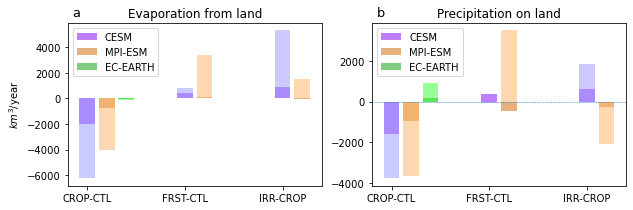

In [20]:
plt.rcParams['figure.figsize'] = [10,3]


data = {'CROP-CTL': 5, 'FRST-CTL': 10, 'IRR-CROP': 15}
names = list(data.keys())
values = list(data.values())
data2 = {'CROP-CTL': 6, 'FRST-CTL': 11, 'IRR-CROP': 16}
values2 = list(data2.values())
value3=7

fig, ax = plt.subplots(1,2)
ax[1].bar(values, [delta_P_land_DEF/30.4,delta_P_land_AFF/30.4,delta_P_land_IRR/30.4],label='CESM',alpha=0.5,color=(127/255,0,1))
ax[1].bar(values, [delta_P_DEF/30.4,delta_P_AFF/30.4,delta_P_IRR/30.4],alpha=0.5,color=(153/255,153/255,1))

ax[1].bar(values2, [delta_P_land_DEF_mpi/30.4,delta_P_land_AFF_mpi/30.4,delta_P_land_IRR_mpi/30.4],label='MPI-ESM',alpha=0.5,color=(204/255,102/255,0))
ax[1].bar(values2, [delta_P_DEF_mpi/30.4,delta_P_AFF_mpi/30.4,delta_P_IRR_mpi/30.4],alpha=0.5,color=(1,178/255,102/255))

ax[1].bar(value3, [delta_P_land_DEF_ec/30.4],label='EC-EARTH',alpha=0.5,color=(0,153/255,0))
ax[1].bar(value3, [delta_P_DEF_ec/30.4],alpha=0.5,color=(51/255,1,51/255))
#ax[0].bar(names, [mean_P_CROP_MPI,mean_P_FRST_MPI,mean_P_IRR_MPI],label='MPIESM')
#ax[0].bar(names[0], [mean_P_CROP_EC],label='ECEARTH')
#ax[0].set_ylabel('change in continental precipitation')
ax[1].axhline(y=0,linewidth=0.5,linestyle='dashed')
#ax[0].set_ylim([-0.7,0.3])
ax[0].set_ylabel('$km^3$/year')
ax[1].set_title('Precipitation on land')
ax[1].set_xticks(values)
ax[1].set_xticklabels(names)
ax[1].legend()
ax[1].text(0.05, 1.1, 'b', transform=ax[1].transAxes,fontsize=13, va='top', ha='right')


ax[0].bar(values, [delta_E_land_DEF/30.4,delta_E_land_AFF/30.4,delta_E_land_IRR/30.4],label='CESM',alpha=0.5,color=(127/255,0,1))
ax[0].bar(values, [delta_E_DEF/30.4,delta_E_AFF/30.4,delta_E_IRR/30.4],alpha=0.5,color=(153/255,153/255,1))
ax[0].bar(values2, [delta_E_land_DEF_mpi/30.4,delta_E_land_AFF_mpi/30.4,delta_E_land_IRR_mpi/30.4],label='MPI-ESM',alpha=0.5,color=(204/255,102/255,0))
ax[0].bar(values2, [delta_E_DEF_mpi/30.4,delta_E_AFF_mpi/30.4,delta_E_IRR_mpi/30.4],alpha=0.5,color=(1,178/255,102/255))
ax[0].bar(value3, [delta_E_land_DEF_ec/30.4],label='EC-EARTH',alpha=0.5,color=(0,153/255,0))
ax[0].bar(value3, [delta_E_DEF_ec/30.4],alpha=0.5,color=(51/255,1,51/255))
#ax[1].scatter(names, [mean_E_CROP_MPI,mean_E_FRST_MPI,mean_E_IRR_MPI],label='MPIESM')
#ax[1].scatter(names[0], [mean_E_CROP_EC],label='ECEARTH')
#ax[1].axhline(y=0,linewidth=0.5,linestyle='dashed')
#ax[1].set_ylim([-0.7,0.3])
ax[0].set_title('Evaporation from land')
ax[0].set_xticks(values)
ax[0].set_xticklabels(names)
ax[0].legend()
ax[0].text(0.05, 1.1,'a', transform=ax[0].transAxes,fontsize=13, va='top', ha='right')
#fig.subplots_adjust(hspace=0.15, wspace=1)


In [54]:
delta_E_land_IRR/delta_E_IRR

0.1676356027602524

In [16]:
conv=365*10**(-6)*da_area.values ##mm/day to km3/year

##also extend this framework to P-E??
PE_CTL=np.nansum(xr.where(da_mask==1,Px_CTL*conv,np.nan))-np.nansum(xr.where(da_mask==1,Ex_CTL*conv,np.nan))
PE_CROP=np.nansum(xr.where(da_mask==1,Px_CROP*conv,np.nan))-np.nansum(xr.where(da_mask==1,Ex_CROP*conv,np.nan))
PE_FRST=np.nansum(xr.where(da_mask==1,Px_FRST*conv,np.nan))-np.nansum(xr.where(da_mask==1,Ex_FRST*conv,np.nan))
PE_IRR=np.nansum(xr.where(da_mask==1,Px_IRRIG*conv,np.nan))-np.nansum(xr.where(da_mask==1,Ex_IRRIG*conv,np.nan))

PE_land_CTL=rho_P_CTL*np.nansum(xr.where(da_mask==1,Px_CTL*conv,np.nan))-rho_E_CTL*np.nansum(xr.where(da_mask==1,Ex_CTL*conv,np.nan))
PE_land_CROP=rho_P_CROP*np.nansum(xr.where(da_mask==1,Px_CROP*conv,np.nan))-rho_E_CROP*np.nansum(xr.where(da_mask==1,Ex_CROP*conv,np.nan))
PE_land_FRST=rho_P_FRST*np.nansum(xr.where(da_mask==1,Px_FRST*conv,np.nan))-rho_E_FRST*np.nansum(xr.where(da_mask==1,Ex_FRST*conv,np.nan))
PE_land_IRR=rho_P_IRRIG*np.nansum(xr.where(da_mask==1,Px_IRRIG*conv,np.nan))-rho_E_IRRIG*np.nansum(xr.where(da_mask==1,Ex_IRRIG*conv,np.nan))

delta_PE_land_DEF=(rho_P_CROP*np.nansum(xr.where(da_mask==1,Px_CROP*conv,np.nan))-rho_E_CROP*np.nansum(xr.where(da_mask==1,Ex_CROP*conv,np.nan)))-(rho_P_CTL*np.nansum(xr.where(da_mask==1,Px_CTL*conv,np.nan))-rho_E_CTL*np.nansum(xr.where(da_mask==1,Ex_CTL*conv,np.nan)))
delta_PE_DEF=(np.nansum(xr.where(da_mask==1,Px_CROP*conv,np.nan))-np.nansum(xr.where(da_mask==1,Ex_CROP*conv,np.nan)))-(np.nansum(xr.where(da_mask==1,Px_CTL*conv,np.nan))-np.nansum(xr.where(da_mask==1,Ex_CTL*conv,np.nan)))
delta_PE_land_AFF=(rho_P_FRST*np.nansum(xr.where(da_mask==1,Px_FRST*conv,np.nan))-rho_E_FRST*np.nansum(xr.where(da_mask==1,Ex_FRST*conv,np.nan)))-(rho_P_CTL*np.nansum(xr.where(da_mask==1,Px_CTL*conv,np.nan))-rho_E_CTL*np.nansum(xr.where(da_mask==1,Ex_CTL*conv,np.nan)))
delta_PE_AFF=(np.nansum(xr.where(da_mask==1,Px_FRST*conv,np.nan))-np.nansum(xr.where(da_mask==1,Ex_FRST*conv,np.nan)))-(np.nansum(xr.where(da_mask==1,Px_CTL*conv,np.nan))-np.nansum(xr.where(da_mask==1,Ex_CTL*conv,np.nan)))
delta_PE_land_IRR=(rho_P_IRRIG*np.nansum(xr.where(da_mask==1,Px_IRRIG*conv,np.nan))-rho_E_IRRIG*np.nansum(xr.where(da_mask==1,Ex_IRRIG*conv,np.nan)))-(rho_P_CROP*np.nansum(xr.where(da_mask==1,Px_CROP*conv,np.nan))-rho_E_CROP*np.nansum(xr.where(da_mask==1,Ex_CROP*conv,np.nan)))
delta_PE_IRR=(np.nansum(xr.where(da_mask==1,Px_IRRIG*conv,np.nan))-np.nansum(xr.where(da_mask==1,Ex_IRRIG*conv,np.nan)))-(np.nansum(xr.where(da_mask==1,Px_CROP*conv,np.nan))-np.nansum(xr.where(da_mask==1,Ex_CROP*conv,np.nan)))


In [17]:
conv=365*10**(-6)*da_area_mpi ##mm/day to km3/year

PE_CTL_mpi=np.nansum(xr.where(da_mask_mpi==1,Px_CTL_mpi*conv,np.nan))-np.nansum(xr.where(da_mask_mpi==1,Ex_CTL_mpi*conv,np.nan))
PE_CROP_mpi=np.nansum(xr.where(da_mask_mpi==1,Px_CROP_mpi*conv,np.nan))-np.nansum(xr.where(da_mask_mpi==1,Ex_CROP_mpi*conv,np.nan))
PE_FRST_mpi=np.nansum(xr.where(da_mask_mpi==1,Px_FRST_mpi*conv,np.nan))-np.nansum(xr.where(da_mask_mpi==1,Ex_FRST_mpi*conv,np.nan))
PE_IRR_mpi=np.nansum(xr.where(da_mask_mpi==1,Px_IRRIG_mpi*conv,np.nan))-np.nansum(xr.where(da_mask_mpi==1,Ex_IRRIG_mpi*conv,np.nan))

PE_land_CTL_mpi=rho_P_CTL_mpi*np.nansum(xr.where(da_mask_mpi==1,Px_CTL_mpi*conv,np.nan))-rho_E_CTL_mpi*np.nansum(xr.where(da_mask_mpi==1,Ex_CTL_mpi*conv,np.nan))
PE_land_CROP_mpi=rho_P_CROP_mpi*np.nansum(xr.where(da_mask_mpi==1,Px_CROP_mpi*conv,np.nan))-rho_E_CROP_mpi*np.nansum(xr.where(da_mask_mpi==1,Ex_CROP_mpi*conv,np.nan))
PE_land_FRST_mpi=rho_P_FRST_mpi*np.nansum(xr.where(da_mask_mpi==1,Px_FRST_mpi*conv,np.nan))-rho_E_FRST_mpi*np.nansum(xr.where(da_mask_mpi==1,Ex_FRST_mpi*conv,np.nan))
PE_land_IRR_mpi=rho_P_IRRIG_mpi*np.nansum(xr.where(da_mask_mpi==1,Px_IRRIG_mpi*conv,np.nan))-rho_E_IRRIG_mpi*np.nansum(xr.where(da_mask_mpi==1,Ex_IRRIG_mpi*conv,np.nan))

delta_PE_land_DEF_mpi=(rho_P_CROP_mpi*np.nansum(xr.where(da_mask_mpi==1,Px_CROP_mpi*conv,np.nan))-rho_E_CROP_mpi*np.nansum(xr.where(da_mask_mpi==1,Ex_CROP_mpi*conv,np.nan)))-(rho_P_CTL_mpi*np.nansum(xr.where(da_mask_mpi==1,Px_CTL_mpi*conv,np.nan))-rho_E_CTL_mpi*np.nansum(xr.where(da_mask_mpi==1,Ex_CTL_mpi*conv,np.nan)))
delta_PE_DEF_mpi=(np.nansum(xr.where(da_mask_mpi==1,Px_CROP_mpi*conv,np.nan))-np.nansum(xr.where(da_mask_mpi==1,Ex_CROP_mpi*conv,np.nan)))-(np.nansum(xr.where(da_mask_mpi==1,Px_CTL_mpi*conv,np.nan))-np.nansum(xr.where(da_mask_mpi==1,Ex_CTL_mpi*conv,np.nan)))
delta_PE_land_AFF_mpi=(rho_P_FRST_mpi*np.nansum(xr.where(da_mask_mpi==1,Px_FRST_mpi*conv,np.nan))-rho_E_FRST_mpi*np.nansum(xr.where(da_mask_mpi==1,Ex_FRST_mpi*conv,np.nan)))-(rho_P_CTL_mpi*np.nansum(xr.where(da_mask_mpi==1,Px_CTL_mpi*conv,np.nan))-rho_E_CTL_mpi*np.nansum(xr.where(da_mask_mpi==1,Ex_CTL_mpi*conv,np.nan)))
delta_PE_AFF_mpi=(np.nansum(xr.where(da_mask_mpi==1,Px_FRST_mpi*conv,np.nan))-np.nansum(xr.where(da_mask_mpi==1,Ex_FRST_mpi*conv,np.nan)))-(np.nansum(xr.where(da_mask_mpi==1,Px_CTL_mpi*conv,np.nan))-np.nansum(xr.where(da_mask_mpi==1,Ex_CTL_mpi*conv,np.nan)))
delta_PE_land_IRR_mpi=(rho_P_IRRIG_mpi*np.nansum(xr.where(da_mask_mpi==1,Px_IRRIG_mpi*conv,np.nan))-rho_E_IRRIG_mpi*np.nansum(xr.where(da_mask_mpi==1,Ex_IRRIG_mpi*conv,np.nan)))-(rho_P_CROP_mpi*np.nansum(xr.where(da_mask_mpi==1,Px_CROP_mpi*conv,np.nan))-rho_E_CROP_mpi*np.nansum(xr.where(da_mask_mpi==1,Ex_CROP_mpi*conv,np.nan)))
delta_PE_IRR_mpi=(np.nansum(xr.where(da_mask_mpi==1,Px_IRRIG_mpi*conv,np.nan))-np.nansum(xr.where(da_mask_mpi==1,Ex_IRRIG_mpi*conv,np.nan)))-(np.nansum(xr.where(da_mask_mpi==1,Px_CROP_mpi*conv,np.nan))-np.nansum(xr.where(da_mask_mpi==1,Ex_CROP_mpi*conv,np.nan)))


In [18]:
conv=365*10**(-6)*da_area_ec.values ##mm/day to km3/year

PE_CTL_ec=np.nansum(xr.where(da_mask_ec==1,Px_CTL_ec*conv,np.nan))-np.nansum(xr.where(da_mask_ec==1,Ex_CTL_ec*conv,np.nan))
PE_CROP_ec=np.nansum(xr.where(da_mask_ec==1,Px_CROP_ec*conv,np.nan))-np.nansum(xr.where(da_mask_ec==1,Ex_CROP_ec*conv,np.nan))

PE_land_CTL_ec=rho_P_CTL_ec*np.nansum(xr.where(da_mask_ec==1,Px_CTL_ec*conv,np.nan))-rho_E_CTL_ec*np.nansum(xr.where(da_mask_ec==1,Ex_CTL_ec*conv,np.nan))
PE_land_CROP_ec=rho_P_CROP_ec*np.nansum(xr.where(da_mask_ec==1,Px_CROP_ec*conv,np.nan))-rho_E_CROP_ec*np.nansum(xr.where(da_mask_ec==1,Ex_CROP_ec*conv,np.nan))

delta_PE_land_DEF_ec=(rho_P_CROP_ec*np.nansum(xr.where(da_mask_ec==1,Px_CROP_ec*conv,np.nan))-rho_E_CROP_ec*np.nansum(xr.where(da_mask_ec==1,Ex_CROP_ec*conv,np.nan)))-(rho_P_CTL_ec*np.nansum(xr.where(da_mask_ec==1,Px_CTL_ec*conv,np.nan))-rho_E_CTL_ec*np.nansum(xr.where(da_mask_ec==1,Ex_CTL_ec*conv,np.nan)))
delta_PE_DEF_ec=(np.nansum(xr.where(da_mask_ec==1,Px_CROP_ec*conv,np.nan))-np.nansum(xr.where(da_mask_ec==1,Ex_CROP_ec*conv,np.nan)))-(np.nansum(xr.where(da_mask_ec==1,Px_CTL_ec*conv,np.nan))-np.nansum(xr.where(da_mask_ec==1,Ex_CTL_ec*conv,np.nan)))


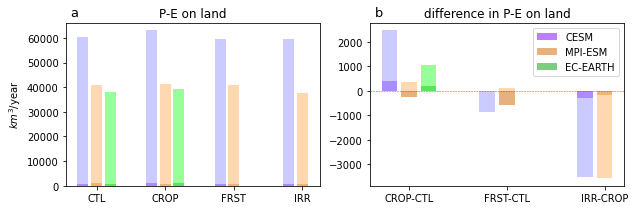

In [19]:
plt.rcParams['figure.figsize'] = [10,3]


data = {'CROP-CTL': 5, 'FRST-CTL': 10, 'IRR-CROP': 15}
names = list(data.keys())
values = list(data.values())
data_b = {'CTL': 5, 'CROP': 10, 'FRST': 15, 'IRR':20}
values_b = list(data_b.values())
names_b = list(data_b.keys())
data_c = {'CTL': 6, 'CROP': 11, 'FRST': 16, 'IRR':21}
values_c = list(data_c.values())

value_d=[7,12]

fig, ax = plt.subplots(1,2)
ax[0].bar(values_b, [PE_land_CTL/30.4,PE_land_CROP/30.4,PE_land_FRST/30.4,PE_land_IRR/30.4],label='CESM',alpha=0.5,color=(127/255,0,1))
ax[0].bar(values_b, [PE_CTL/30.4,PE_CROP/30.4,PE_FRST/30.4,PE_IRR/30.4],alpha=0.5,color=(153/255,153/255,1))

ax[0].bar(values_c, [PE_land_CTL_mpi/30.4,PE_land_CROP_mpi/30.4,PE_land_FRST_mpi/30.4,PE_land_IRR_mpi/30.4],label='MPI-ESM',alpha=0.5,color=(204/255,102/255,0))
ax[0].bar(values_c, [PE_CTL_mpi/30.4,PE_CROP_mpi/30.4,PE_FRST_mpi/30.4,PE_IRR_mpi/30.4],alpha=0.5,color=(1,178/255,102/255))

ax[0].bar(value_d, [PE_land_CTL_ec/30.4,PE_land_CROP_ec/30.4],label='EC-EARTH',alpha=0.5,color=(0,153/255,0))
ax[0].bar(value_d, [PE_CTL_ec/30.4,PE_CROP_ec/30.4],alpha=0.5,color=(51/255,1,51/255))
#ax[0].bar(names, [mean_P_CROP_MPI,mean_P_FRST_MPI,mean_P_IRR_MPI],label='MPIESM')
#ax[0].bar(names[0], [mean_P_CROP_EC],label='ECEARTH')
ax[0].set_ylabel('$km^3$/year')
ax[0].axhline(y=0,linewidth=0.5,linestyle='dashed')
#ax[0].set_ylim([-0.7,0.3])
ax[0].set_title('P-E on land')
ax[0].set_xticks(values_c)
ax[0].set_xticklabels(names_b)
ax[0].text(0.05, 1.1,'a', transform=ax[0].transAxes,fontsize=13, va='top', ha='right')

ax[1].bar(values, [delta_PE_land_DEF/30.4,delta_PE_land_AFF/30.4,delta_PE_land_IRR/30.4],label='CESM',alpha=0.5,color=(127/255,0,1))
ax[1].bar(values, [delta_PE_DEF/30.4,delta_PE_AFF/30.4,delta_PE_IRR/30.4],alpha=0.5,color=(153/255,153/255,1))

ax[1].bar(values2, [delta_PE_land_DEF_mpi/30.4,delta_PE_land_AFF_mpi/30.4,delta_PE_land_IRR_mpi/30.4],label='MPI-ESM',alpha=0.5,color=(204/255,102/255,0))
ax[1].bar(values2, [delta_PE_DEF_mpi/30.4,delta_PE_AFF_mpi/30.4,delta_PE_IRR_mpi/30.4],alpha=0.5,color=(1,178/255,102/255))

ax[1].bar(value3, [delta_PE_land_DEF_ec/30.4],label='EC-EARTH',alpha=0.5,color=(0,153/255,0))
ax[1].bar(value3, [delta_PE_DEF_ec/30.4],alpha=0.5,color=(51/255,1,51/255))
#ax[0].bar(names, [mean_P_CROP_MPI,mean_P_FRST_MPI,mean_P_IRR_MPI],label='MPIESM')
#ax[0].bar(names[0], [mean_P_CROP_EC],label='ECEARTH')
#ax[0].set_ylabel('change in continental precipitation')
ax[1].axhline(y=0,linewidth=0.5,linestyle='dashed')
#ax[0].set_ylim([-0.7,0.3])
ax[1].set_title('difference in P-E on land')
ax[1].set_xticks(values2)
ax[1].set_xticklabels(names)
ax[1].text(0.05, 1.1,'b', transform=ax[1].transAxes,fontsize=13, va='top', ha='right')


ax[1].legend()
#fig.subplots_adjust(hspace=0.15, wspace=1)


In [59]:
delta_PE_land_DEF/delta_PE_DEF

0.16448027080841202

In [ ]:
   Difa_Pm_CROP, da_mask = xr.align(Difa_Pm_CROP, da_mask, join="exact")
    Difa_Pm_CROP=xr.where(da_mask==1,Difa_Pm_CROP,np.nan)
    da_mask_mpi=da_mask_mpi.values
    da_mask_mpi=np.flipud(da_mask_mpi)
    da_mask_mpi=xr.DataArray(da_mask_mpi,coords=(Difa_Pm_CROP_mpi.lat,Difa_Pm_CROP_mpi.lon))    
    Difa_Pm_CROP_mpi=xr.where(da_mask_mpi==1,Difa_Pm_CROP_mpi,np.nan)
    Difa_Pm_CROP_ec, da_mask_ec = xr.align(Difa_Pm_CROP_ec, da_mask_ec, join="exact")
    Difa_Pm_CROP_ec=xr.where(da_mask_ec==1,Difa_Pm_CROP_ec,np.nan)
    
    Difa_Pm_FRST, da_mask = xr.align(Difa_Pm_FRST, da_mask, join="exact")
    Difa_Pm_FRST=xr.where(da_mask==1,Difa_Pm_FRST,np.nan)
    Difa_Pm_FRST_mpi=xr.where(da_mask_mpi==1,Difa_Pm_FRST_mpi,np.nan)
    
    Difa_Pm_IRRIG, da_mask = xr.align(Difa_Pm_IRRIG, da_mask, join="exact")
    Difa_Pm_IRRIG=xr.where(da_mask==1,Difa_Pm_IRRIG,np.nan)
    Difa_Pm_IRRIG_mpi=xr.where(da_mask_mpi==1,Difa_Pm_IRRIG_mpi,np.nan)
    
    Difa_Em_CROP, da_mask = xr.align(Difa_Em_CROP, da_mask, join="exact")
    Difa_Em_CROP=xr.where(da_mask==1,Difa_Em_CROP,np.nan)
    Difa_Em_CROP_mpi=xr.where(da_mask_mpi==1,Difa_Em_CROP_mpi,np.nan)
    Difa_Em_CROP_ec, da_mask_ec = xr.align(Difa_Em_CROP_ec, da_mask_ec, join="exact")
    Difa_Em_CROP_ec=xr.where(da_mask_ec==1,Difa_Em_CROP_ec,np.nan)
    
    Difa_Em_FRST, da_mask = xr.align(Difa_Em_FRST, da_mask, join="exact")
    Difa_Em_FRST=xr.where(da_mask==1,Difa_Em_FRST,np.nan)
    Difa_Em_FRST_mpi=xr.where(da_mask_mpi==1,Difa_Em_FRST_mpi,np.nan)
    
    Difa_Em_IRRIG, da_mask = xr.align(Difa_Em_IRRIG, da_mask, join="exact")
    Difa_Em_IRRIG=xr.where(da_mask==1,Difa_Em_IRRIG,np.nan)
    Difa_Em_IRRIG_mpi=xr.where(da_mask_mpi==1,Difa_Em_IRRIG_mpi,np.nan)

In [11]:
fn_mask=r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/mpiesm/landmask_mpiesm.nc'
ds_mask = xr.open_dataset(fn_mask)
lsm=ds_mask['landmask']
#%%
###############################
# DIFFERENCES AND CONCATENATION 
##################################################
###############################
# DIFFERENCES AND CONCATENATION 
##################################################

Difa_Em_FRST_mpi = (Ex_track_FRST_mpi - Ex_track_CTL_mpi)
Difa_Em_CROP_mpi = (Ex_track_CROP_mpi - Ex_track_CTL_mpi)
Difa_Em_IRRIG_mpi = (Ex_track_IRRIG_mpi - Ex_track_CROP_mpi)
#Difr_Em_FRST_mpi = ((Ex_track_FRST_mpi - Ex_track_CTL_mpi)/Ex_track_CTL_mpi*100)*lsm
#Difr_Em_CROP_mpi = ((Ex_track_CROP_mpi - Ex_track_CTL_mpi)/Ex_track_CTL_mpi*100)*lsm
#Difr_Em_IRRIG_mpi = ((Ex_track_IRRIG_mpi - Ex_track_CROP_mpi)/Ex_track_CROP_mpi*100)*lsm

Difa_Pm_FRST_mpi = (Px_track_FRST_mpi - Px_track_CTL_mpi)
Difa_Pm_CROP_mpi = (Px_track_CROP_mpi - Px_track_CTL_mpi)
Difa_Pm_IRRIG_mpi = (Px_track_IRRIG_mpi - Px_track_CROP_mpi)
#Difr_Pm_FRST_mpi = ((Px_track_FRST_mpi - Px_track_CTL_mpi)/Px_track_CTL_mpi*100)*lsm
#Difr_Pm_CROP_mpi = ((Px_track_CROP_mpi - Px_track_CTL_mpi)/Px_track_CTL_mpi*100)*lsm
#Difr_Pm_IRRIG_mpi = ((Px_track_IRRIG_mpi - Px_track_CROP_mpi)/Px_track_CROP_mpi*100)*lsm

Difa_RE_FRST_mpi = (E_c_FRST_mpi - E_c_CTL_mpi)
Difa_RE_CROP_mpi = (E_c_CROP_mpi - E_c_CTL_mpi)
Difa_RE_IRRIG_mpi = (E_c_IRRIG_mpi - E_c_CROP_mpi)
#Difr_RE_FRST_mpi = ((E_c_FRST_mpi - E_c_CTL_mpi)*100)*lsm
#Difr_RE_CROP_mpi = ((E_c_CROP_mpi - E_c_CTL_mpi)*100)*lsm
#Difr_RE_IRRIG_mpi = ((E_c_IRRIG_mpi - E_c_CROP_mpi)*100)*lsm

Difa_RP_FRST_mpi = (P_c_FRST_mpi - P_c_CTL_mpi)
Difa_RP_CROP_mpi = (P_c_CROP_mpi - P_c_CTL_mpi)
Difa_RP_IRRIG_mpi = (P_c_IRRIG_mpi - P_c_CROP_mpi)
#Difr_RP_FRST_mpi = ((P_c_FRST_mpi - P_c_CTL_mpi)*100)*lsm
#Difr_RP_CROP_mpi = ((P_c_CROP_mpi - P_c_CTL_mpi)*100)*lsm
#Difr_RP_IRRIG_mpi = ((P_c_IRRIG_mpi - P_c_CROP_mpi)*100)*lsm

In [12]:
fn_mask=r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/ecearth/landmask_ecearth.nc'
ds_mask = xr.open_dataset(fn_mask)
lsm=ds_mask['landmask']
#%%
###############################
# DIFFERENCES AND CONCATENATION 
##################################################
###############################
# DIFFERENCES AND CONCATENATION 
##################################################

#Difa_Em_FRST_ec = (Ex_track_FRST_ec - Ex_track_CTL_ec)
Difa_Em_CROP_ec = (Ex_track_CROP_ec - Ex_track_CTL_ec)
#Difr_Em_FRST_ec = ((Ex_track_FRST_ec - Ex_track_CTL_ec)/Ex_track_CTL_ec*100)*lsm
#Difr_Em_CROP_ec = ((Ex_track_CROP_ec - Ex_track_CTL_ec)/Ex_track_CTL_ec*100)*lsm
#Difr_Em_IRRIG_ec = ((Ex_track_IRRIG_ec - Ex_track_CROP_ec)/Ex_track_CROP_ec*100)*lsm

#Difa_Pm_FRST_ec = (Px_track_FRST_ec - Px_track_CTL_ec)
Difa_Pm_CROP_ec = (Px_track_CROP_ec - Px_track_CTL_ec)
#Difr_Pm_FRST_ec = ((Px_track_FRST_ec - Px_track_CTL_ec)/Px_track_CTL_ec*100)*lsm
#Difr_Pm_CROP_ec = ((Px_track_CROP_ec - Px_track_CTL_ec)/Px_track_CTL_ec*100)*lsm
#Difr_Pm_IRRIG_ec = ((Px_track_IRRIG_ec - Px_track_CROP_ec)/Px_track_CROP_ec*100)*lsm

#Difa_RE_FRST_ec = (E_c_FRST_ec - E_c_CTL_ec)
Difa_RE_CROP_ec = (E_c_CROP_ec - E_c_CTL_ec)
#Difr_RE_FRST_ec = ((E_c_FRST_ec - E_c_CTL_ec)*100)*lsm
#Difr_RE_CROP_ec = ((E_c_CROP_ec - E_c_CTL_ec)*100)*lsm
#Difr_RE_IRRIG_ec = ((E_c_IRRIG_ec - E_c_CROP_ec)*100)*lsm

#Difa_RP_FRST_ec = (P_c_FRST_ec - P_c_CTL_ec)
Difa_RP_CROP_ec = (P_c_CROP_ec - P_c_CTL_ec)
#Difr_RP_FRST_ec = ((P_c_FRST_ec - P_c_CTL_ec)*100)*lsm
#Difr_RP_CROP_ec = ((P_c_CROP_ec - P_c_CTL_ec)*100)*lsm
#Difr_RP_IRRIG_ec = ((P_c_IRRIG_ec - P_c_CROP_ec)*100)*lsm


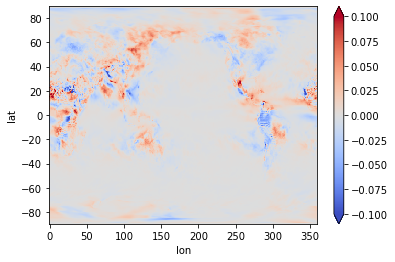

In [17]:
#da.reindex(lat=da.lat[::-1])
#Difa_RE_FRST_mpi=Difa_RE_FRST_mpi.reindex(lat=Difa_RE_FRST_mpi.lat[::-1])
Difa_RP_CROP_ec.plot(vmin=-0.1,vmax=0.1,cmap='coolwarm')


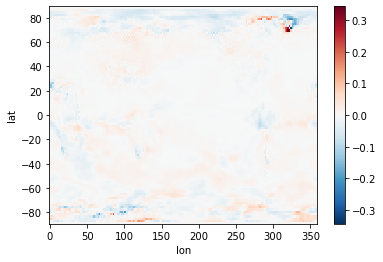

In [18]:
Difa_RE_CROP_mpi.plot()


In [19]:
#Concatenation of all 
Et = xr.concat([Ex_track_CTL,Ex_track_CROP,Ex_track_FRST,Ex_track_IRRIG], pd.Index(["CTL", "CROP","FRST","IRRIG"], name = "scenario"))
Pt = xr.concat([Px_track_CTL,Px_track_CROP,Px_track_FRST,Px_track_IRRIG], pd.Index(["CTL", "CROP","FRST","IRRIG"], name = "scenario"))
Et_Pt = xr.concat([Pt,Et], pd.Index(["Pm", "Em"], name = "Tracked"))

ratio_E = xr.concat([E_c_CTL,E_c_CROP,E_c_FRST,E_c_IRRIG], pd.Index(["CTL", "CROP","FRST","IRRIG"], name = "scenario"))
ratio_P = xr.concat([P_c_CTL,P_c_CROP,P_c_FRST,P_c_IRRIG], pd.Index(["CTL", "CROP","FRST","IRRIG"], name = "scenario"))
ratio_E_P = xr.concat([ratio_P,ratio_E], pd.Index(["Pc", "Ec"], name = "Tracked"))

ratioa_E = xr.concat([Difa_Em_CROP, Difa_Em_FRST, Difa_Em_IRRIG], pd.Index(["CROP","FRST","IRRIG"], name = "scenario"))
ratioa_P = xr.concat([Difa_Pm_CROP, Difa_Pm_FRST, Difa_Pm_IRRIG], pd.Index(["CROP","FRST","IRRIG"], name = "scenario"))
Difa_ratio_E = xr.concat([ratioa_P,ratioa_E], pd.Index(["P", "E"], name = "Tracked"))

#ratior_E = xr.concat([Difr_Em_CROP, Difr_Em_FRST, Difr_Em_IRRIG], pd.Index(["CROP","FRST","IRRIG"], name = "scenario"))
#ratior_P = xr.concat([Difr_Pm_CROP, Difr_Pm_FRST, Difr_Pm_IRRIG], pd.Index(["CROP","FRST","IRRIG"], name = "scenario"))
#Difr_ratio_E = xr.concat([ratior_P,ratior_E], pd.Index(["P", "E"], name = "Tracked"))

RRa_E = xr.concat([Difa_RE_CROP, Difa_RE_FRST, Difa_RE_IRRIG], pd.Index(["CROP","FRST","IRRIG"], name = "scenario"))
RRa_P = xr.concat([Difa_RP_CROP, Difa_RP_FRST, Difa_RP_IRRIG], pd.Index(["CROP","FRST","IRRIG"], name = "scenario"))
Difa_E = xr.concat([RRa_P,RRa_E], pd.Index(["P", "E"], name = "Tracked"))

#RRr_E = xr.concat([Difr_RE_CROP, Difr_RE_FRST, Difr_RE_IRRIG], pd.Index(["CROP","FRST","IRRIG"], name = "scenario"))
#RRr_P = xr.concat([Difr_RP_CROP, Difr_RP_FRST, Difr_RP_IRRIG], pd.Index(["CROP","FRST","IRRIG"], name = "scenario"))
#Difr_E = xr.concat([RRr_P,RRr_E], pd.Index(["P", "E"], name = "Tracked"))


In [20]:
#Concatenation of all 
Et_mpi = xr.concat([Ex_track_CTL_mpi,Ex_track_CROP_mpi,Ex_track_FRST_mpi,Ex_track_IRRIG_mpi], pd.Index(["CTL", "CROP","FRST","IRRIG"], name = "scenario"))
Pt_mpi = xr.concat([Px_track_CTL_mpi,Px_track_CROP_mpi,Px_track_FRST_mpi,Px_track_IRRIG_mpi], pd.Index(["CTL", "CROP","FRST","IRRIG"], name = "scenario"))
Et_Pt_mpi = xr.concat([Pt_mpi,Et_mpi], pd.Index(["Pm", "Em"], name = "Tracked"))

ratio_E_mpi = xr.concat([E_c_CTL_mpi,E_c_CROP_mpi,E_c_FRST_mpi,E_c_IRRIG_mpi], pd.Index(["CTL", "CROP","FRST","IRRIG"], name = "scenario"))
ratio_P_mpi = xr.concat([P_c_CTL_mpi,P_c_CROP_mpi,P_c_FRST_mpi,P_c_IRRIG_mpi], pd.Index(["CTL", "CROP","FRST","IRRIG"], name = "scenario"))
ratio_E_P_mpi = xr.concat([ratio_P_mpi,ratio_E_mpi], pd.Index(["Pc", "Ec"], name = "Tracked"))

ratioa_E_mpi = xr.concat([Difa_Em_CROP_mpi, Difa_Em_FRST_mpi, Difa_Em_IRRIG_mpi], pd.Index(["CROP","FRST","IRRIG"], name = "scenario"))
ratioa_P_mpi = xr.concat([Difa_Pm_CROP_mpi, Difa_Pm_FRST_mpi, Difa_Pm_IRRIG_mpi], pd.Index(["CROP","FRST","IRRIG"], name = "scenario"))
Difa_ratio_E_mpi = xr.concat([ratioa_P_mpi,ratioa_E_mpi], pd.Index(["P", "E"], name = "Tracked"))

#ratior_E = xr.concat([Difr_Em_CROP, Difr_Em_FRST, Difr_Em_IRRIG], pd.Index(["CROP","FRST","IRRIG"], name = "scenario"))
#ratior_P = xr.concat([Difr_Pm_CROP, Difr_Pm_FRST, Difr_Pm_IRRIG], pd.Index(["CROP","FRST","IRRIG"], name = "scenario"))
#Difr_ratio_E = xr.concat([ratior_P,ratior_E], pd.Index(["P", "E"], name = "Tracked"))

RRa_E_mpi = xr.concat([Difa_RE_CROP_mpi, Difa_RE_FRST_mpi, Difa_RE_IRRIG_mpi], pd.Index(["CROP","FRST","IRRIG"], name = "scenario"))
RRa_P_mpi = xr.concat([Difa_RP_CROP_mpi, Difa_RP_FRST_mpi, Difa_RP_IRRIG_mpi], pd.Index(["CROP","FRST","IRRIG"], name = "scenario"))
Difa_E_mpi = xr.concat([RRa_P_mpi,RRa_E_mpi], pd.Index(["P", "E"], name = "Tracked"))

#RRr_E = xr.concat([Difr_RE_CROP, Difr_RE_FRST, Difr_RE_IRRIG], pd.Index(["CROP","FRST","IRRIG"], name = "scenario"))
#RRr_P = xr.concat([Difr_RP_CROP, Difr_RP_FRST, Difr_RP_IRRIG], pd.Index(["CROP","FRST","IRRIG"], name = "scenario"))
#Difr_E = xr.concat([RRr_P,RRr_E], pd.Index(["P", "E"], name = "Tracked"))


In [21]:
#Concatenation of all 
Et_ec = xr.concat([Ex_track_CTL_ec,Ex_track_CROP_ec,Ex_track_FRST_ec], pd.Index(["CTL", "CROP","FRST"], name = "scenario"))
Pt_ec = xr.concat([Px_track_CTL_ec,Px_track_CROP_ec,Px_track_FRST_ec], pd.Index(["CTL", "CROP","FRST"], name = "scenario"))
Et_Pt_ec = xr.concat([Pt_ec,Et_ec], pd.Index(["Pm", "Em"], name = "Tracked"))

ratio_E_ec = xr.concat([E_c_CTL_ec,E_c_CROP_ec,E_c_FRST_ec], pd.Index(["CTL", "CROP","FRST"], name = "scenario"))
ratio_P_ec = xr.concat([P_c_CTL_ec,P_c_CROP_ec,P_c_FRST_ec], pd.Index(["CTL", "CROP","FRST"], name = "scenario"))
ratio_E_P_ec = xr.concat([ratio_P_ec,ratio_E_ec], pd.Index(["Pc", "Ec"], name = "Tracked"))

ratioa_E_ec = xr.concat([Difa_Em_CROP_ec, Difa_Em_FRST_ec], pd.Index(["CROP","FRST"], name = "scenario"))
ratioa_P_ec = xr.concat([Difa_Pm_CROP_ec, Difa_Pm_FRST_ec], pd.Index(["CROP","FRST"], name = "scenario"))
Difa_ratio_E_ec = xr.concat([ratioa_P_ec,ratioa_E_ec], pd.Index(["P", "E"], name = "Tracked"))

#ratior_E = xr.concat([Difr_Em_CROP, Difr_Em_FRST, Difr_Em_IRRIG], pd.Index(["CROP","FRST","IRRIG"], name = "scenario"))
#ratior_P = xr.concat([Difr_Pm_CROP, Difr_Pm_FRST, Difr_Pm_IRRIG], pd.Index(["CROP","FRST","IRRIG"], name = "scenario"))
#Difr_ratio_E = xr.concat([ratior_P,ratior_E], pd.Index(["P", "E"], name = "Tracked"))

RRa_E_ec = xr.concat([Difa_RE_CROP_ec, Difa_RE_FRST_ec], pd.Index(["CROP","FRST"], name = "scenario"))
RRa_P_ec = xr.concat([Difa_RP_CROP_ec, Difa_RP_FRST_ec], pd.Index(["CROP","FRST"], name = "scenario"))
Difa_E_ec = xr.concat([RRa_P_ec,RRa_E_ec], pd.Index(["P", "E"], name = "Tracked"))

#RRr_E = xr.concat([Difr_RE_CROP, Difr_RE_FRST, Difr_RE_IRRIG], pd.Index(["CROP","FRST","IRRIG"], name = "scenario"))
#RRr_P = xr.concat([Difr_RP_CROP, Difr_RP_FRST, Difr_RP_IRRIG], pd.Index(["CROP","FRST","IRRIG"], name = "scenario"))
#Difr_E = xr.concat([RRr_P,RRr_E], pd.Index(["P", "E"], name = "Tracked"))


NameError: name 'Ex_track_FRST_ec' is not defined

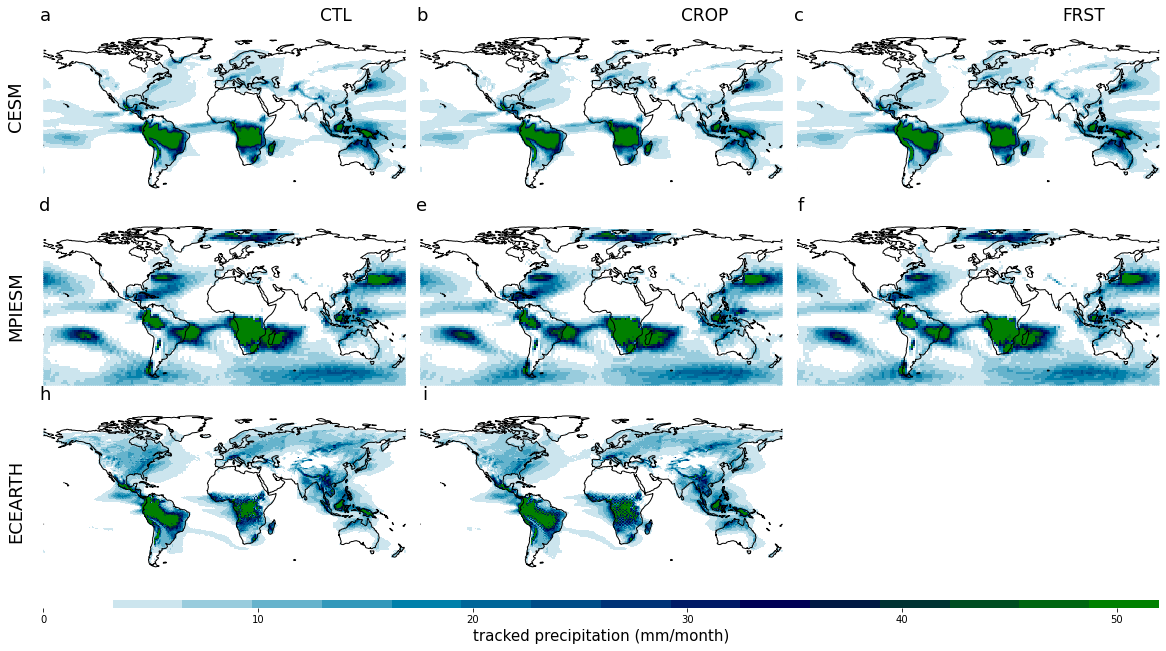

In [16]:
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
plt.rcParams['figure.figsize'] = [20, 10]

mpl.rc('axes',edgecolor='none')
k=0
fig = plt.figure()
gs = fig.add_gridspec(3,3,width_ratios=[3,3,3])
cmap='ocean_r'
#cmap='viridis'

for model in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if model=='cesm':
        da_list=[Px_track_CTL,Px_track_CROP,Px_track_FRST]
        pan_list=['a','b','c']
    elif model =='ecearth':
        da_list=[Px_track_CTL_ec,Px_track_CROP_ec]
        pan_list=['h','i']
    elif model =='mpiesm':
        da_list=[Px_track_CTL_mpi,Px_track_CROP_mpi,Px_track_FRST_mpi]
        pan_list=['d','e','f']
    for da in da_list:
        if i==0:
            change='CTL'
        elif i==1:
            change='CROP'
        elif i==2:
            change='FRST'
        i=i+1
        #plot_lims = [da.min(), da.max()]
        plot_lims = [0, 52]
        # define colorbar levels
        ax = fig.add_subplot(gs[k-1,i-1], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+30, 30)
        #levels=[-2, -1.75, -1.5, -1.25,-1,-0.75, -0.5,-0.25, 0,0.25, 0.5,0.75, 1,1.25, 1.5,1.75, 2]
        # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = 'mm/month'

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False,label=model)
        ax.set_aspect('auto')
        # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
        if i==1:
            ax_2=ax
            ax.text(-0.1,0.7,model.upper(),rotation='vertical', transform=ax.transAxes,fontsize=18, va='top', ha='left') 
        ax.set_title('')
        if model=='cesm':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            ax_old=ax
            if k==1:
                ax.text(0.85, 1.15, change, transform=ax.transAxes,fontsize=17, va='top', ha='right')
        elif model=='mpiesm':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
        elif model=='ecearth':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')

cbar = mpu.colorbar(h, ax1=ax_old,ax2=ax_2, shift=0., size=0.05, orientation='horizontal')
cbar.set_label(label='tracked precipitation ('+cbar_label+')', size=15)
#cbar.ax.tick_params(labelsize=13) 
fig.subplots_adjust(hspace=0.15, wspace=0.04)


In [16]:
Px_track_CTL_mmday=Px_track_CTL/30.4
Px_track_DEF_mmday=Px_track_CROP/30.4-Px_track_CTL/30.4
Px_track_FRST-Px_track_CTL
Px_track_IRRIG-Px_track_CTL

<xarray.DataArray (lat: 192, lon: 288)>
array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.004319,  0.004507,  0.004613, ...,  0.00424 ,  0.004308,  0.004269],
       [ 0.002629,  0.002431,  0.002297, ...,  0.003113,  0.002948,  0.002818],
       ...,
       [ 0.000315,  0.001836,  0.002274, ..., -0.001036, -0.000404, -0.000569],
       [ 0.007209,  0.00812 ,  0.008603, ...,  0.00631 ,  0.006696,  0.006723],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.057594 -88.11518 ... 89.057594 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.25 357.5 358.75


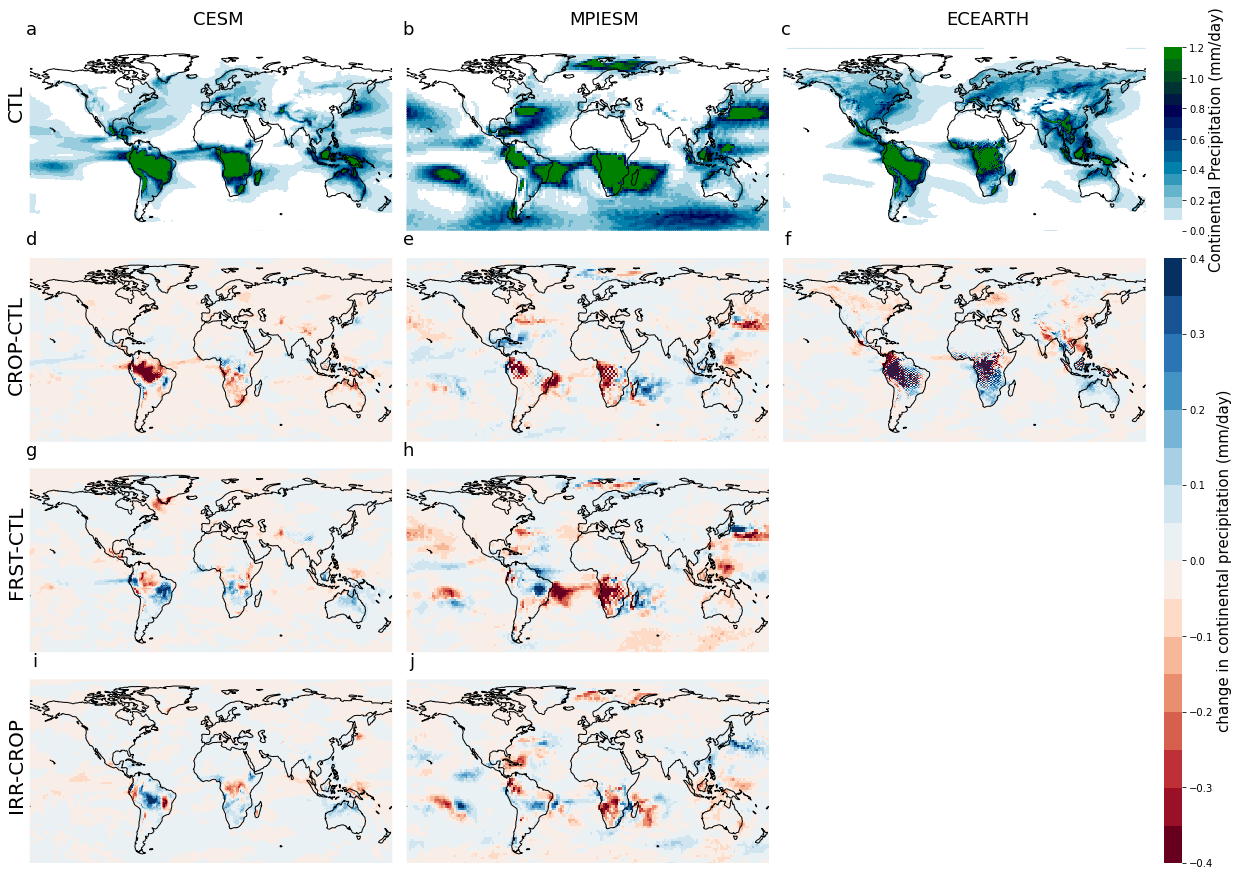

In [23]:
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
plt.rcParams['figure.figsize'] = [20, 15]

mpl.rc('axes',edgecolor='none')
k=0
fig = plt.figure()
gs = fig.add_gridspec(4,3)
cmap='RdBu'
cmap2='ocean_r'

for model in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if model=='cesm':
        da_list=[Px_track_CTL/30.4,Px_track_CROP/30.4-Px_track_CTL/30.4,Px_track_FRST/30.4-Px_track_CTL/30.4,Px_track_IRRIG/30.4-Px_track_CROP/30.4]
        pan_list=['a','d','g','i']
    elif model =='ecearth':
        da_list=[Px_track_CTL_ec/30.4,Px_track_CROP_ec/30.4-Px_track_CTL_ec/30.4]
        pan_list=['c','f']
    elif model =='mpiesm':
        da_list=[Px_track_CTL_mpi/30.4,Px_track_CROP_mpi/30.4-Px_track_CTL_mpi/30.4,Px_track_FRST_mpi/30.4-Px_track_CTL_mpi/30.4,Px_track_IRRIG_mpi/30.4-Px_track_CROP_mpi/30.4]
        pan_list=['b','e','h','j']
    for da in da_list:
        if i==0:
            change='CTL'
        elif i==1:
            change='CROP-CTL'
        elif i==2:
            change='FRST-CTL'
        elif i==3:
            change='IRR-CROP'
        i=i+1
#        plot_lims = [da.min(), da.max()]
        plot_lims = [-0.4,0.4]
        plot_lims2=  [0,1.2]
        # define colorbar levels
        ax = fig.add_subplot(gs[i-1,k-1], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+30, 30)
        levels2 = np.arange(plot_lims2[0], plot_lims2[1]+30, 30)
        #levels=[-2, -1.75, -1.5, -1.25,-1,-0.75, -0.5,-0.25, 0,0.25, 0.5,0.75, 1,1.25, 1.5,1.75, 2]
        # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = 'mm/day'

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        if i==1:
            h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap2, 16), vmin=plot_lims2[0], vmax=plot_lims2[1], add_colorbar=False,label=model)
            if k==3:
                ax3=ax
                cbar2 = mpu.colorbar(h, ax1=ax3, shift=0., size=0.05, orientation='vertical')
                cbar2.set_label(label='Continental Precipitation ('+cbar_label+')', size=15)
        if i!=1:
            h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False,label=model)
        ax.set_aspect('auto')
        # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
        if i==2:
            if k==2:
                ax_2=ax
        if i==1:
            ax.text(0.45,1.2,model.upper(), transform=ax.transAxes,fontsize=18, va='top', ha='left') 
        ax.set_title('')
        if model=='cesm':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            if k==1:
                ax.text(-0.01, 0.8, change, transform=ax.transAxes,fontsize=20, va='top', ha='right',rotation='vertical')
        elif model=='mpiesm':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
        elif model=='ecearth':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
        
ax_old = plt.subplot(gs[3, 2])
ax_old.set_xticks([])
ax_old.set_yticks([])
cbar = mpu.colorbar(h, ax1=ax_old,ax2=ax_2, shift=0., size=0.05, orientation='vertical')
cbar.set_label(label='change in continental precipitation ('+cbar_label+')', size=15)
#cbar.ax.tick_params(labelsize=13) 
fig.subplots_adjust(hspace=0.15, wspace=0.04)


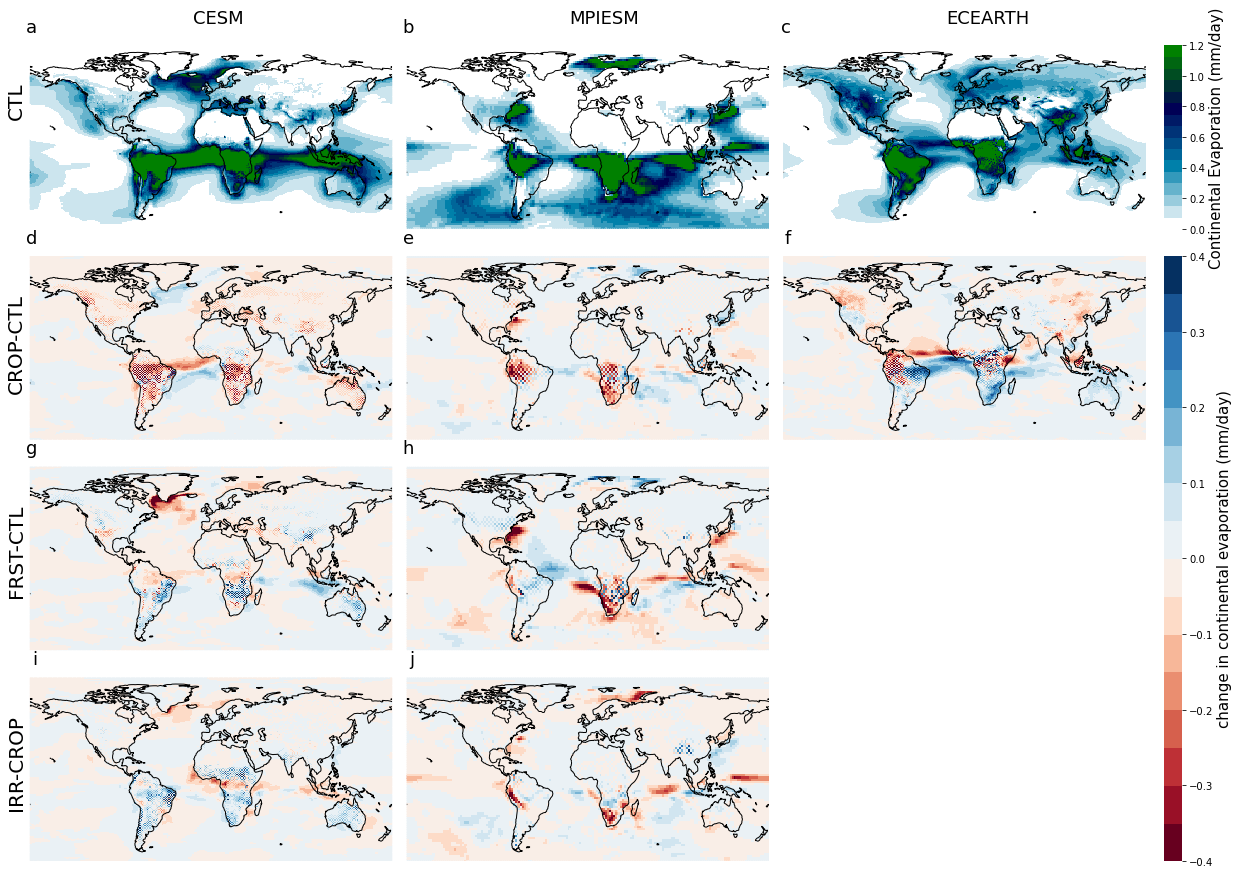

In [27]:
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
plt.rcParams['figure.figsize'] = [20, 15]

mpl.rc('axes',edgecolor='none')
k=0
fig = plt.figure()
gs = fig.add_gridspec(4,3)
cmap='RdBu'
cmap2='ocean_r'

for model in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if model=='cesm':
        da_list=[Ex_track_CTL/30.4,Ex_track_CROP/30.4-Ex_track_CTL/30.4,Ex_track_FRST/30.4-Ex_track_CTL/30.4,Ex_track_IRRIG/30.4-Ex_track_CROP/30.4]
        pan_list=['a','d','g','i']
    elif model =='ecearth':
        da_list=[Ex_track_CTL_ec/30.4,Ex_track_CROP_ec/30.4-Ex_track_CTL_ec/30.4]
        pan_list=['c','f']
    elif model =='mpiesm':
        da_list=[Ex_track_CTL_mpi/30.4,Ex_track_CROP_mpi/30.4-Ex_track_CTL_mpi/30.4,Ex_track_FRST_mpi/30.4-Ex_track_CTL_mpi/30.4,Ex_track_IRRIG_mpi/30.4-Ex_track_CROP_mpi/30.4]
        pan_list=['b','e','h','j']
    for da in da_list:
        if i==0:
            change='CTL'
        elif i==1:
            change='CROP-CTL'
        elif i==2:
            change='FRST-CTL'
        elif i==3:
            change='IRR-CROP'
        i=i+1
#        plot_lims = [da.min(), da.max()]
        plot_lims = [-0.4,0.4]
        plot_lims2=  [0,1.2]
        # define colorbar levels
        ax = fig.add_subplot(gs[i-1,k-1], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+30, 30)
        levels2 = np.arange(plot_lims2[0], plot_lims2[1]+30, 30)
        #levels=[-2, -1.75, -1.5, -1.25,-1,-0.75, -0.5,-0.25, 0,0.25, 0.5,0.75, 1,1.25, 1.5,1.75, 2]
        # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = 'mm/day'

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        if i==1:
            h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap2, 16), vmin=plot_lims2[0], vmax=plot_lims2[1], add_colorbar=False,label=model)
            if k==3:
                ax3=ax
                cbar2 = mpu.colorbar(h, ax1=ax3, shift=0., size=0.05, orientation='vertical')
                cbar2.set_label(label='Continental Evaporation ('+cbar_label+')', size=15)
        if i!=1:
            h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False,label=model)
        ax.set_aspect('auto')
        # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
        if i==2:
            if k==2:
                ax_2=ax
        if i==1:
            ax.text(0.45,1.2,model.upper(), transform=ax.transAxes,fontsize=18, va='top', ha='left') 
        ax.set_title('')
        if model=='cesm':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            if k==1:
                ax.text(-0.01, 0.8, change, transform=ax.transAxes,fontsize=20, va='top', ha='right',rotation='vertical')
        elif model=='mpiesm':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
        elif model=='ecearth':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
        
ax_old = plt.subplot(gs[3, 2])
ax_old.set_xticks([])
ax_old.set_yticks([])
cbar = mpu.colorbar(h, ax1=ax_old,ax2=ax_2, shift=0., size=0.05, orientation='vertical')
cbar.set_label(label='change in continental evaporation ('+cbar_label+')', size=15)
#cbar.ax.tick_params(labelsize=13) 
fig.subplots_adjust(hspace=0.15, wspace=0.04)


<xarray.DataArray 'landmask' (lat: 96, lon: 192)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])
Coordinates:
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 88.57 86.72 84.86 83.0 ... -83.0 -84.86 -86.72 -88.57
Attributes:
    long_name:    land sea mask
    units:        1
    grid_type:    gaussian
    institution:  MPIMET
<xarray.DataArray (lat: 96, lon: 192)>
array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [-0.061141, -0.107794, -0.081376, ..., -0.038966, -0.058742, -0.058448],
       [-0.059691, -0.096423, -0.148881, ..., -0.110154, -0.064536, -0.109093],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,   

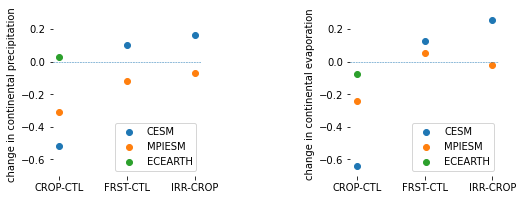

In [33]:
land_only=1
plt.rcParams['figure.figsize'] = [8,3]

lsm_data_CESM = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/cesm/landmask_cesm.nc'
ds_mask = xr.open_dataset(lsm_data_CESM)
da_mask=ds_mask['landmask']  
  
lsm_data_MPIESM = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/mpiesm/landmask_mpiesm.nc'# insert landseamask here
ds_mask = xr.open_dataset(lsm_data_MPIESM)
da_mask_mpi=ds_mask['landmask']  

lsm_data_EC = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/ecearth/landmask_ecearth.nc'# insert landseamask here
ds_mask = xr.open_dataset(lsm_data_EC)
da_mask_ec=ds_mask['landmask']  

print(da_mask_mpi)
print(Difa_Pm_CROP_mpi)
if land_only==1:
    Difa_Pm_CROP, da_mask = xr.align(Difa_Pm_CROP, da_mask, join="exact")
    Difa_Pm_CROP=xr.where(da_mask==1,Difa_Pm_CROP,np.nan)
    da_mask_mpi=da_mask_mpi.values
    da_mask_mpi=np.flipud(da_mask_mpi)
    da_mask_mpi=xr.DataArray(da_mask_mpi,coords=(Difa_Pm_CROP_mpi.lat,Difa_Pm_CROP_mpi.lon))    
    Difa_Pm_CROP_mpi=xr.where(da_mask_mpi==1,Difa_Pm_CROP_mpi,np.nan)
    Difa_Pm_CROP_ec, da_mask_ec = xr.align(Difa_Pm_CROP_ec, da_mask_ec, join="exact")
    Difa_Pm_CROP_ec=xr.where(da_mask_ec==1,Difa_Pm_CROP_ec,np.nan)
    
    Difa_Pm_FRST, da_mask = xr.align(Difa_Pm_FRST, da_mask, join="exact")
    Difa_Pm_FRST=xr.where(da_mask==1,Difa_Pm_FRST,np.nan)
    Difa_Pm_FRST_mpi=xr.where(da_mask_mpi==1,Difa_Pm_FRST_mpi,np.nan)
    
    Difa_Pm_IRRIG, da_mask = xr.align(Difa_Pm_IRRIG, da_mask, join="exact")
    Difa_Pm_IRRIG=xr.where(da_mask==1,Difa_Pm_IRRIG,np.nan)
    Difa_Pm_IRRIG_mpi=xr.where(da_mask_mpi==1,Difa_Pm_IRRIG_mpi,np.nan)
    
    Difa_Em_CROP, da_mask = xr.align(Difa_Em_CROP, da_mask, join="exact")
    Difa_Em_CROP=xr.where(da_mask==1,Difa_Em_CROP,np.nan)
    Difa_Em_CROP_mpi=xr.where(da_mask_mpi==1,Difa_Em_CROP_mpi,np.nan)
    Difa_Em_CROP_ec, da_mask_ec = xr.align(Difa_Em_CROP_ec, da_mask_ec, join="exact")
    Difa_Em_CROP_ec=xr.where(da_mask_ec==1,Difa_Em_CROP_ec,np.nan)
    
    Difa_Em_FRST, da_mask = xr.align(Difa_Em_FRST, da_mask, join="exact")
    Difa_Em_FRST=xr.where(da_mask==1,Difa_Em_FRST,np.nan)
    Difa_Em_FRST_mpi=xr.where(da_mask_mpi==1,Difa_Em_FRST_mpi,np.nan)
    
    Difa_Em_IRRIG, da_mask = xr.align(Difa_Em_IRRIG, da_mask, join="exact")
    Difa_Em_IRRIG=xr.where(da_mask==1,Difa_Em_IRRIG,np.nan)
    Difa_Em_IRRIG_mpi=xr.where(da_mask_mpi==1,Difa_Em_IRRIG_mpi,np.nan)
    
mean_E_CROP_CESM=Difa_Em_CROP.mean(['lat','lon'])
mean_E_CROP_MPI=Difa_Em_CROP_mpi.mean(['lat','lon'])
mean_E_CROP_EC=Difa_Em_CROP_ec.mean(['lat','lon'])

mean_E_FRST_CESM=Difa_Em_FRST.mean(['lat','lon'])
mean_E_FRST_MPI=Difa_Em_FRST_mpi.mean(['lat','lon'])

mean_E_IRR_CESM=Difa_Em_IRRIG.mean(['lat','lon'])
mean_E_IRR_MPI=Difa_Em_IRRIG_mpi.mean(['lat','lon'])

mean_P_CROP_CESM=Difa_Pm_CROP.mean(['lat','lon'])
mean_P_CROP_MPI=Difa_Pm_CROP_mpi.mean(['lat','lon'])
mean_P_CROP_EC=Difa_Pm_CROP_ec.mean(['lat','lon'])

mean_P_FRST_CESM=Difa_Pm_FRST.mean(['lat','lon'])
mean_P_FRST_MPI=Difa_Pm_FRST_mpi.mean(['lat','lon'])

mean_P_IRR_CESM=Difa_Pm_IRRIG.mean(['lat','lon'])
mean_P_IRR_MPI=Difa_Pm_IRRIG_mpi.mean(['lat','lon'])

#plot with E and P on rows and CROP, FRST and irr on colimns


data = {'CROP-CTL': 5, 'FRST-CTL': 10, 'IRR-CROP': 15}
names = list(data.keys())
values = list(data.values())

fig, ax = plt.subplots(1,2)
ax[0].scatter(names, [mean_P_CROP_CESM,mean_P_FRST_CESM,mean_P_IRR_CESM],label='CESM')
ax[0].scatter(names, [mean_P_CROP_MPI,mean_P_FRST_MPI,mean_P_IRR_MPI],label='MPIESM')
ax[0].scatter(names[0], [mean_P_CROP_EC],label='ECEARTH')
ax[0].set_ylabel('change in continental precipitation')
ax[0].axhline(y=0,linewidth=0.5,linestyle='dashed')
ax[0].set_ylim([-0.7,0.3])
ax[0].legend()

ax[1].scatter(names, [mean_E_CROP_CESM,mean_E_FRST_CESM,mean_E_IRR_CESM],label='CESM')
ax[1].scatter(names, [mean_E_CROP_MPI,mean_E_FRST_MPI,mean_E_IRR_MPI],label='MPIESM')
ax[1].scatter(names[0], [mean_E_CROP_EC],label='ECEARTH')
ax[1].set_ylabel('change in continental evaporation')
ax[1].axhline(y=0,linewidth=0.5,linestyle='dashed')
ax[1].set_ylim([-0.7,0.3])
ax[1].legend()
fig.subplots_adjust(hspace=0.15, wspace=1)


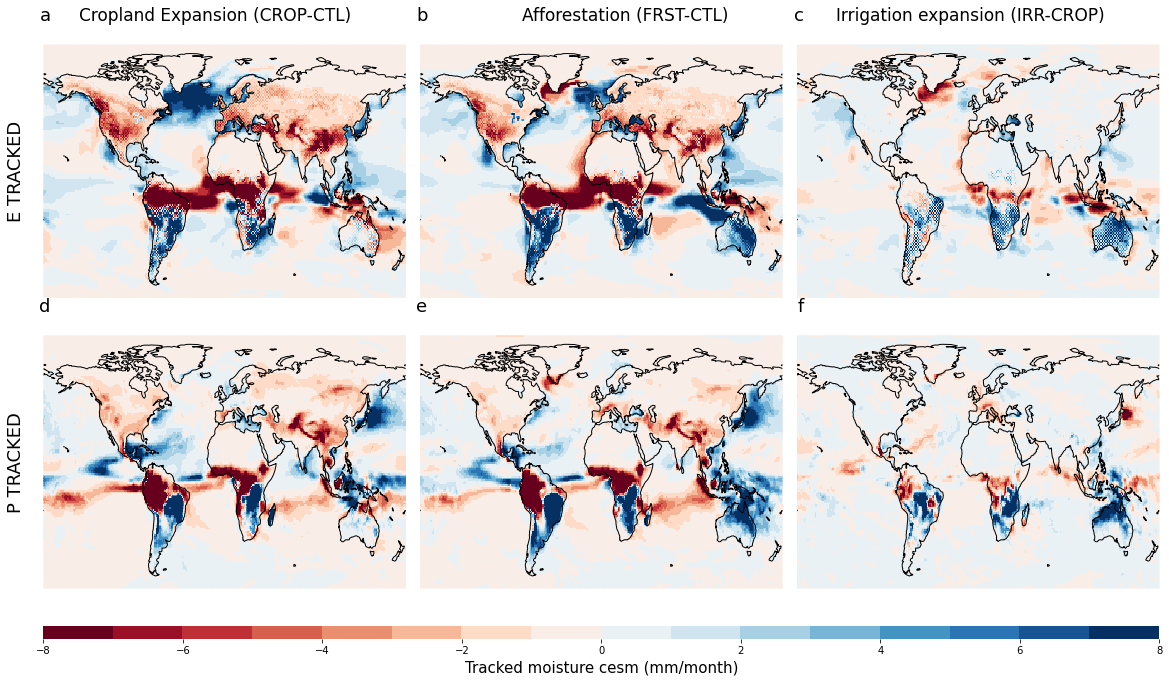

In [30]:
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
mpl.rc('axes',edgecolor='none')
k=0
fig = plt.figure()
gs = fig.add_gridspec(2,3,width_ratios=[3,3,3])
cmap='RdBu'
for model in ['E tracked','P tracked']:
    i=0
    k=k+1
    if model=='E tracked':
        da_list=[Difa_Em_CROP, Difa_Em_FRST,Difa_Em_IRRIG]
        pan_list=['a','b','c']
    elif model =='P tracked':
        da_list=[Difa_Pm_CROP, Difa_Pm_FRST,Difa_Pm_IRRIG]
        pan_list=['d','e','f']
    for da in da_list:
        if i==0:
            change='Cropland Expansion (CROP-CTL)'
        elif i==1:
            change='Afforestation (FRST-CTL)'
        elif i==2:
            change='Irrigation expansion (IRR-CROP)'
        i=i+1
        #plot_lims = [da.min(), da.max()]
        plot_lims = [-8, 8]
        # define colorbar levels
        ax = fig.add_subplot(gs[k-1,i-1], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+20, 20)
        levels=[-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
        # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = 'mm/month'

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False,label=model)
        ax.set_aspect('auto')
        # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
        if i==1:
            ax_2=ax
            ax.text(-0.1,0.7,model.upper(),rotation='vertical', transform=ax.transAxes,fontsize=18, va='top', ha='left') 
        ax.set_title('')
        if model=='E tracked':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            if k==1:
                ax.text(0.85, 1.15, change, transform=ax.transAxes,fontsize=17, va='top', ha='right')
        elif model=='P tracked':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            ax_old_mpi=ax
        
cbar = mpu.colorbar(h, ax1=ax_old_mpi,ax2=ax_2, shift=0., size=0.05, orientation='horizontal')
cbar.set_label(label='Tracked moisture cesm ('+cbar_label+')', size=15)
#cbar.ax.tick_params(labelsize=13) 
fig.subplots_adjust(hspace=0.15, wspace=0.04)



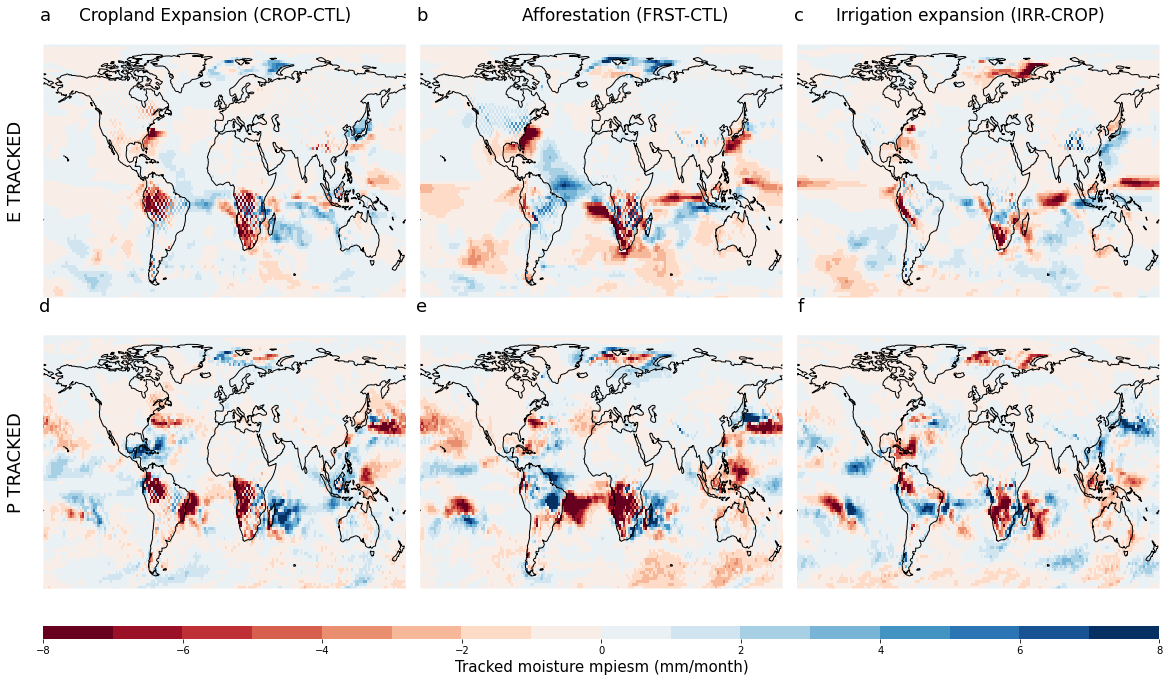

In [24]:
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
mpl.rc('axes',edgecolor='none')
k=0
fig = plt.figure()
gs = fig.add_gridspec(2,3,width_ratios=[3,3,3])
cmap='RdBu'
for model in ['E tracked','P tracked']:
    i=0
    k=k+1
    if model=='E tracked':
        da_list=[Difa_Em_CROP_mpi, Difa_Em_FRST_mpi,Difa_Em_IRRIG_mpi]
        pan_list=['a','b','c']
    elif model =='P tracked':
        da_list=[Difa_Pm_CROP_mpi, Difa_Pm_FRST_mpi,Difa_Pm_IRRIG_mpi]
        pan_list=['d','e','f']
    for da in da_list:
        if i==0:
            change='Cropland Expansion (CROP-CTL)'
        elif i==1:
            change='Afforestation (FRST-CTL)'
        elif i==2:
            change='Irrigation expansion (IRR-CROP)'
        i=i+1
        #plot_lims = [da.min(), da.max()]
        plot_lims = [-8, 8]
        # define colorbar levels
        ax = fig.add_subplot(gs[k-1,i-1], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+20, 20)
        levels=[-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
        # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = 'mm/month'

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False,label=model)
        ax.set_aspect('auto')
        # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
        if i==1:
            ax_2=ax
            ax.text(-0.1,0.7,model.upper(),rotation='vertical', transform=ax.transAxes,fontsize=18, va='top', ha='left') 
        ax.set_title('')
        if model=='E tracked':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            if k==1:
                ax.text(0.85, 1.15, change, transform=ax.transAxes,fontsize=17, va='top', ha='right')
        elif model=='P tracked':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            ax_old_mpi=ax
        
cbar = mpu.colorbar(h, ax1=ax_old_mpi,ax2=ax_2, shift=0., size=0.05, orientation='horizontal')
cbar.set_label(label='Tracked moisture mpiesm ('+cbar_label+')', size=15)
#cbar.ax.tick_params(labelsize=13) 
fig.subplots_adjust(hspace=0.15, wspace=0.04)



1
1
1
1
2
1


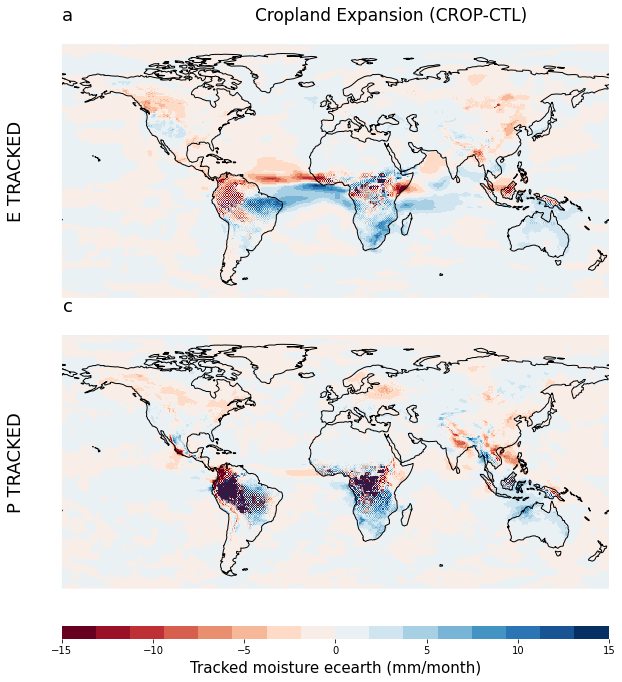

In [20]:
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
mpl.rc('axes',edgecolor='none')
k=0
fig = plt.figure()
gs = fig.add_gridspec(2,2,width_ratios=[2,2])
cmap='RdBu'
for model in ['E tracked','P tracked']:
    i=0
    k=k+1
    if model=='E tracked':
        da_list=[Difa_Em_CROP_ec]
        pan_list=['a','b']
    elif model =='P tracked':
        da_list=[Difa_Pm_CROP_ec]
        pan_list=['c','d']
    for da in da_list:
        if i==0:
            change='Cropland Expansion (CROP-CTL)'
        elif i==1:
            change='Afforestation (FRST-CTL)'
        i=i+1
        #plot_lims = [da.min(), da.max()]
        plot_lims = [-15, 15]
        # define colorbar levels
        print(i)
        print(k)
        print(len(da_list))
        ax = fig.add_subplot(gs[k-1,i-1], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+20, 20)
        levels=[-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
        # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = 'mm/month'

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False,label=model)
        ax.set_aspect('auto')
        # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
        if i==1:
            ax_2=ax
            ax.text(-0.1,0.7,model.upper(),rotation='vertical', transform=ax.transAxes,fontsize=18, va='top', ha='left') 
        ax.set_title('')
        if model=='E tracked':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            if k==1:
                ax.text(0.85, 1.15, change, transform=ax.transAxes,fontsize=17, va='top', ha='right')
        elif model=='P tracked':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            ax_old_mpi=ax
        
cbar = mpu.colorbar(h, ax1=ax_old_mpi,ax2=ax_2, shift=0., size=0.05, orientation='horizontal')
cbar.set_label(label='Tracked moisture ecearth ('+cbar_label+')', size=15)
#cbar.ax.tick_params(labelsize=13) 
fig.subplots_adjust(hspace=0.15, wspace=0.04)



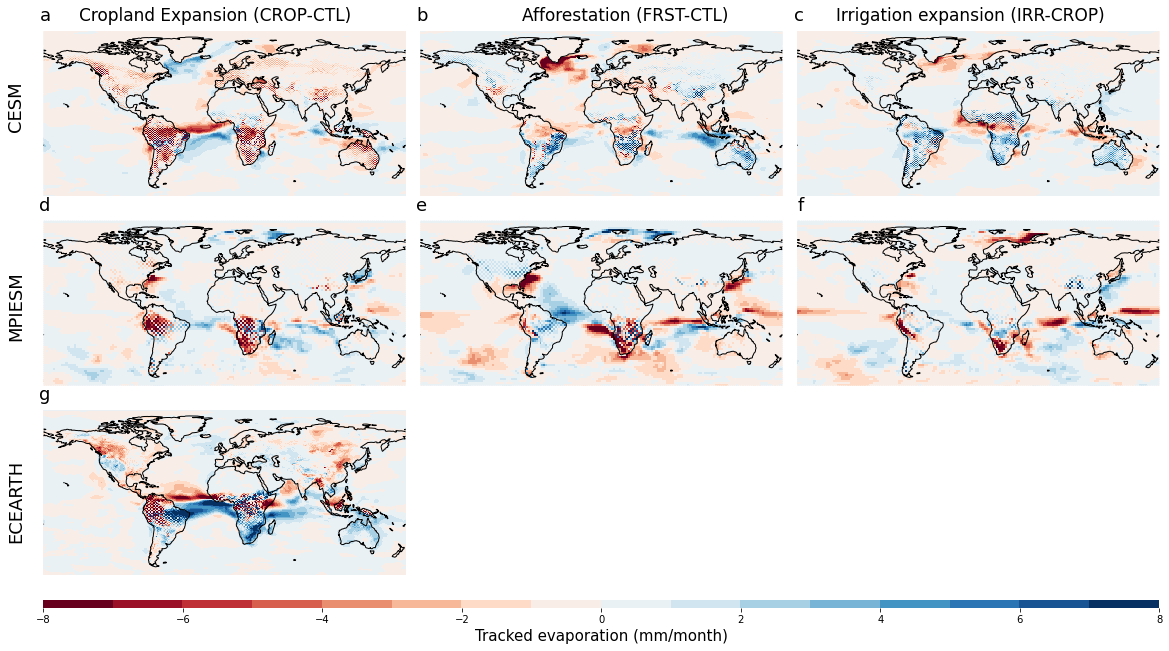

In [21]:
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
mpl.rc('axes',edgecolor='none')
k=0
fig = plt.figure()
gs = fig.add_gridspec(3,3,width_ratios=[3,3,3])
cmap='RdBu'
for model in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if model=='cesm':
        da_list=[Difa_Em_CROP, Difa_Em_FRST,Difa_Em_IRRIG]
        pan_list=['a','b','c']
    elif model =='ecearth':
        da_list=[Difa_Em_CROP_ec]
        pan_list=['g']
    elif model=='mpiesm':
        da_list=[Difa_Em_CROP_mpi, Difa_Em_FRST_mpi,Difa_Em_IRRIG_mpi]
        pan_list=['d','e','f']
    for da in da_list:
        if i==0:
            change='Cropland Expansion (CROP-CTL)'
        elif i==1:
            change='Afforestation (FRST-CTL)'
        elif i==2:
            change='Irrigation expansion (IRR-CROP)'
        i=i+1
        #plot_lims = [da.min(), da.max()]
        plot_lims = [-8, 8]
        # define colorbar levels
        ax = fig.add_subplot(gs[k-1,i-1], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+20, 20)
        levels=[-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
        # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = 'mm/month'

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False,label=model)
        ax.set_aspect('auto')
        # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
        if i==1:
            ax_2=ax
            ax.text(-0.1,0.7,model.upper(),rotation='vertical', transform=ax.transAxes,fontsize=18, va='top', ha='left') 
        ax.set_title('')
        if model=='cesm':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            if k==1:
                ax.text(0.85, 1.15, change, transform=ax.transAxes,fontsize=17, va='top', ha='right')
        elif model=='mpiesm':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            ax_old_mpi=ax
        elif model=='ecearth':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')

cbar = mpu.colorbar(h, ax1=ax_old_mpi,ax2=ax_2, shift=0., size=0.05, orientation='horizontal')
cbar.set_label(label='Tracked evaporation ('+cbar_label+')', size=15)
#cbar.ax.tick_params(labelsize=13) 
fig.subplots_adjust(hspace=0.15, wspace=0.04)



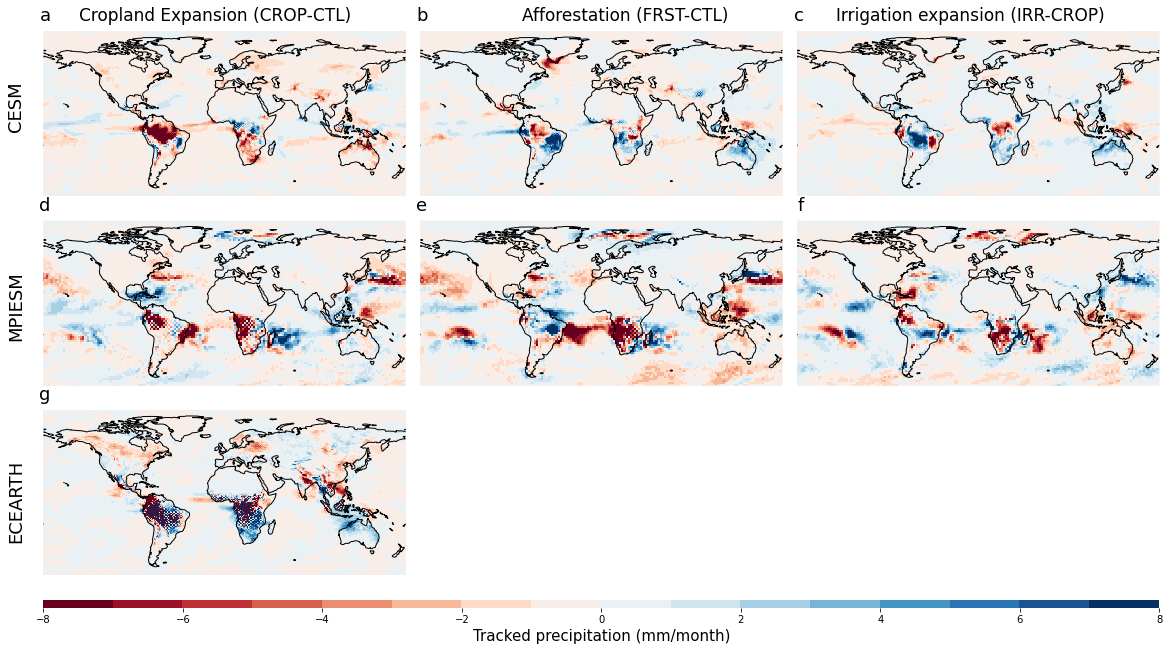

In [22]:
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
mpl.rc('axes',edgecolor='none')
k=0
fig = plt.figure()
gs = fig.add_gridspec(3,3,width_ratios=[3,3,3])
cmap='RdBu'
for model in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if model=='cesm':
        da_list=[Difa_Pm_CROP, Difa_Pm_FRST,Difa_Pm_IRRIG]
        pan_list=['a','b','c']
    elif model =='ecearth':
        da_list=[Difa_Pm_CROP_ec]
        pan_list=['g']
    elif model=='mpiesm':
        da_list=[Difa_Pm_CROP_mpi, Difa_Pm_FRST_mpi,Difa_Pm_IRRIG_mpi]
        pan_list=['d','e','f']
    for da in da_list:
        if i==0:
            change='Cropland Expansion (CROP-CTL)'
        elif i==1:
            change='Afforestation (FRST-CTL)'
        elif i==2:
            change='Irrigation expansion (IRR-CROP)'
        i=i+1
        #plot_lims = [da.min(), da.max()]
        plot_lims = [-8, 8]
        # define colorbar levels
        ax = fig.add_subplot(gs[k-1,i-1], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+20, 20)
        levels=[-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
        # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = 'mm/month'

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False,label=model)
        ax.set_aspect('auto')
        # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
        if i==1:
            ax_2=ax
            ax.text(-0.1,0.7,model.upper(),rotation='vertical', transform=ax.transAxes,fontsize=18, va='top', ha='left') 
        ax.set_title('')
        if model=='cesm':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            if k==1:
                ax.text(0.85, 1.15, change, transform=ax.transAxes,fontsize=17, va='top', ha='right')
        elif model=='mpiesm':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            ax_old_mpi=ax
        elif model=='ecearth':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')

cbar = mpu.colorbar(h, ax1=ax_old_mpi,ax2=ax_2, shift=0., size=0.05, orientation='horizontal')
cbar.set_label(label='Tracked precipitation ('+cbar_label+')', size=15)
#cbar.ax.tick_params(labelsize=13) 
fig.subplots_adjust(hspace=0.15, wspace=0.04)



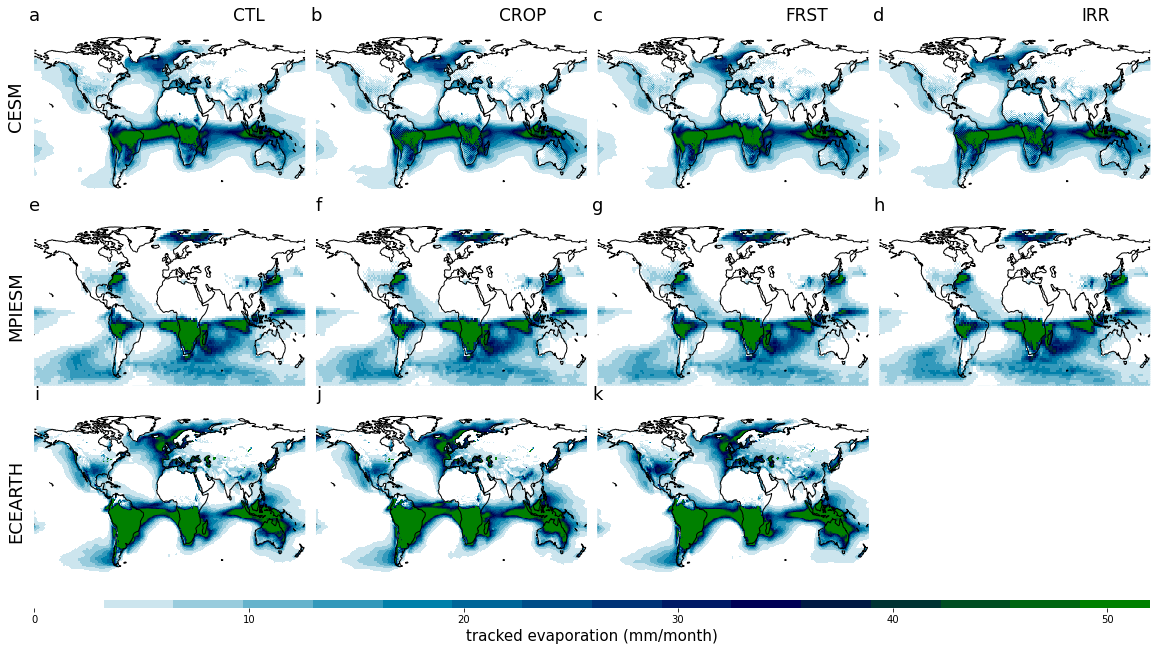

In [27]:

#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
plt.rcParams['figure.figsize'] = [20, 10]

mpl.rc('axes',edgecolor='none')
k=0
fig = plt.figure()
gs = fig.add_gridspec(3,4,width_ratios=[3,3,3,3])
cmap='ocean_r'
for model in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if model=='cesm':
        da_list=[Ex_track_CTL,Ex_track_CROP,Ex_track_FRST,Ex_track_IRRIG]
        pan_list=['a','b','c','d']
    elif model =='ecearth':
        da_list=[Ex_track_CTL_ec,Ex_track_CROP_ec,Ex_track_FRST_ec]
        pan_list=['i','j','k']
    elif model =='mpiesm':
        da_list=[Ex_track_CTL_mpi,Ex_track_CROP_mpi,Ex_track_FRST_mpi,Ex_track_IRRIG_mpi]
        pan_list=['e','f','g','h']
    for da in da_list:
        if i==0:
            change='CTL'
        elif i==1:
            change='CROP'
        elif i==2:
            change='FRST'
        elif i==3:
            change='IRR'
        i=i+1
        #plot_lims = [da.min(), da.max()]
        plot_lims = [0, 52]
        # define colorbar levels
        ax = fig.add_subplot(gs[k-1,i-1], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+30, 30)
        #levels=[-2, -1.75, -1.5, -1.25,-1,-0.75, -0.5,-0.25, 0,0.25, 0.5,0.75, 1,1.25, 1.5,1.75, 2]
        # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = 'mm/month'

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False,label=model)
        ax.set_aspect('auto')
        # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
        if i==1:
            ax_2=ax
            ax.text(-0.1,0.7,model.upper(),rotation='vertical', transform=ax.transAxes,fontsize=18, va='top', ha='left') 
        ax.set_title('')
        if model=='cesm':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            ax_old=ax
            if k==1:
                ax.text(0.85, 1.15, change, transform=ax.transAxes,fontsize=17, va='top', ha='right')
        elif model=='mpiesm':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
        elif model=='ecearth':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')

cbar = mpu.colorbar(h, ax1=ax_old,ax2=ax_2, shift=0., size=0.05, orientation='horizontal')
cbar.set_label(label='tracked evaporation ('+cbar_label+')', size=15)
#cbar.ax.tick_params(labelsize=13) 
fig.subplots_adjust(hspace=0.15, wspace=0.04)


C:\Users\sdeherto\.conda\envs\pyvis\lib\site-packages\xarray\plot\facetgrid.py:321: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


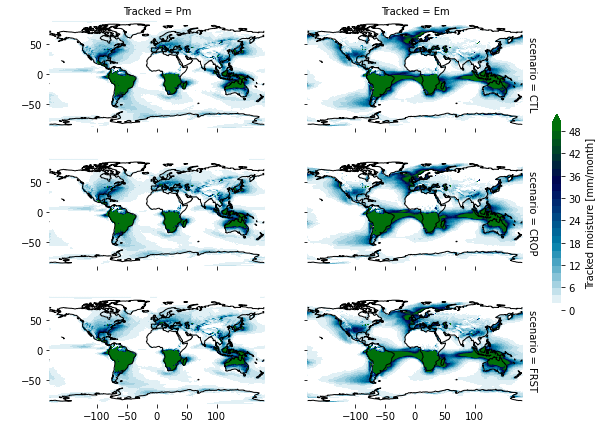

In [28]:
#%%
#PLOT MOISTURE TRACKED --> PLOT 
Et_Pt.lon.attrs["long_name"] = "Long"
Et_Pt.lat.attrs["long_name"] = "Lat"
Et_Pt.lon.attrs["units"] = "degrees"
Et_Pt.lat.attrs["units"] = "degrees"
Facet = Et_Pt_ec.plot(x="lon", y="lat", col = "Tracked", row = "scenario",
                              add_colorbar=True,
                              aspect=2.0, 
                              size=2.4,
                              robust=True, cmap = 'ocean_r',
                              cbar_kwargs={"label": "Tracked moisture [mm/month]",
                                           'shrink' : 0.5,
                                           #'location': 'bottom',
                                           }, 
                              transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
                              levels = np.round(np.arange(0,52,2),decimals = 0)
                              ) 
                         
# Only works if cartopy is activated: transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
for ax in Facet.axes.flat:
    ax.coastlines()
    ax.set_ylabel(' ')
    ax.set_xlabel(' ')
    ax.set_xticks([-100, -50, 0, 50, 100])
    ax.set_yticks([-50, 0, 50])
#φos.chdir(r'/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/wam2layer/scripts/processing/')

plt.savefig('plot1.png')
#%%

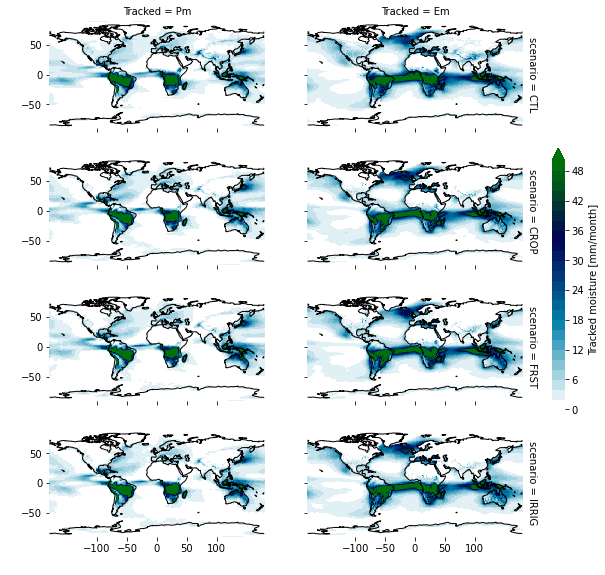

In [36]:
#%%
#PLOT MOISTURE TRACKED --> PLOT 
Et_Pt.lon.attrs["long_name"] = "Long"
Et_Pt.lat.attrs["long_name"] = "Lat"
Et_Pt.lon.attrs["units"] = "degrees"
Et_Pt.lat.attrs["units"] = "degrees"
Facet = Et_Pt.plot(x="lon", y="lat", col = "Tracked", row = "scenario",
                              add_colorbar=True,
                              aspect=2.0, 
                              size=2.4,
                              robust=True, cmap = 'ocean_r',
                              cbar_kwargs={"label": "Tracked moisture [mm/month]",
                                           'shrink' : 0.5,
                                           #'location': 'bottom',
                                           }, 
                              transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
                              levels = np.round(np.arange(0,52,2),decimals = 0)
                              ) 
                         
# Only works if cartopy is activated: transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
for ax in Facet.axes.flat:
    ax.coastlines()
    ax.set_ylabel(' ')
    ax.set_xlabel(' ')
    ax.set_xticks([-100, -50, 0, 50, 100])
    ax.set_yticks([-50, 0, 50])
#φos.chdir(r'/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/wam2layer/scripts/processing/')

plt.savefig('plot1.png')
#%%

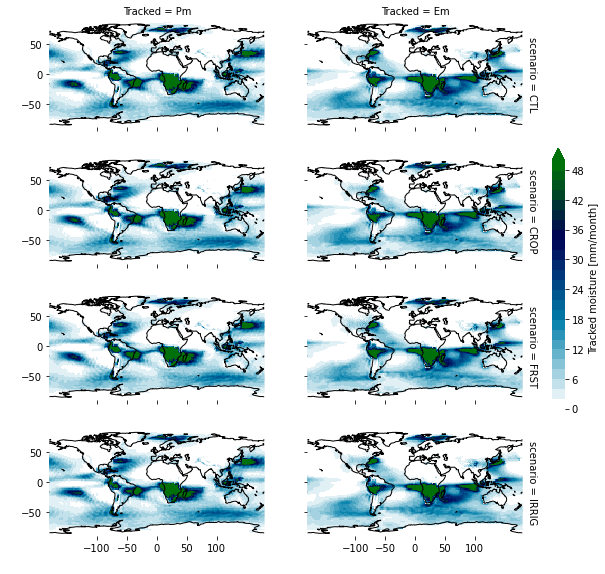

In [29]:
#%%
#PLOT MOISTURE TRACKED --> PLOT 
Et_Pt.lon.attrs["long_name"] = "Long"
Et_Pt.lat.attrs["long_name"] = "Lat"
Et_Pt.lon.attrs["units"] = "degrees"
Et_Pt.lat.attrs["units"] = "degrees"
Facet = Et_Pt_mpi.plot(x="lon", y="lat", col = "Tracked", row = "scenario",
                              add_colorbar=True,
                              aspect=2.0, 
                              size=2.4,
                              robust=True, cmap = 'ocean_r',
                              cbar_kwargs={"label": "Tracked moisture [mm/month]",
                                           'shrink' : 0.5,
                                           #'location': 'bottom',
                                           }, 
                              transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
                              levels = np.round(np.arange(0,52,2),decimals = 0)
                              ) 
                         
# Only works if cartopy is activated: transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
for ax in Facet.axes.flat:
    ax.coastlines()
    ax.set_ylabel(' ')
    ax.set_xlabel(' ')
    ax.set_xticks([-100, -50, 0, 50, 100])
    ax.set_yticks([-50, 0, 50])
#φos.chdir(r'/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/wam2layer/scripts/processing/')

plt.savefig('plot1.png')
#%%

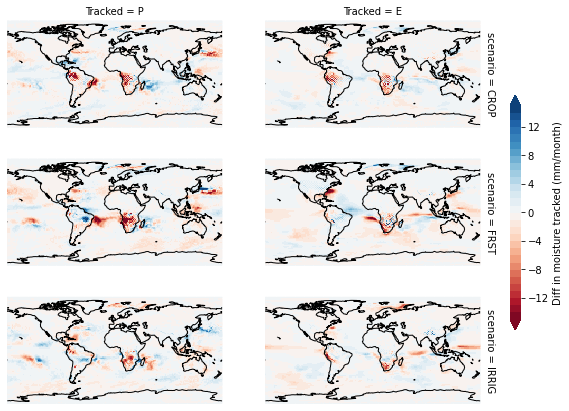

In [30]:
#PLOT ABSOLUTE DIFFERENCES 
Difa_ratio_E.lon.attrs["long_name"] = "Long"
Difa_ratio_E.lat.attrs["long_name"] = "Lat"
Difa_ratio_E.lon.attrs["units"] = "degrees"
Difa_ratio_E.lat.attrs["units"] = "degrees"
Facet = Difa_ratio_E_mpi.plot(x="lon", y="lat", col = "Tracked", row = "scenario",
                              aspect=2.0, size=2.4,
                              robust=True, cmap = 'RdBu',
                              cbar_kwargs={"label": "Diff in moisture tracked (mm/month)",
                                           'shrink' : 0.6,
                                           #'location': 'bottom',
                                           }, 
                              transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
                              #levels = np.round(np.arange(np.nanmin(Moisture),np.nanmax(Moisture),(np.nanmax(Moisture)-np.nanmin(Moisture))/20), decimals = 1)
                              #levels = np.round(np.arange(np.quantile(Moisture, 0.20),np.quantile(Moisture, 0.95),(np.quantile(Moisture, 0.95)-np.quantile(Moisture, 0.20))/20), decimals = 0)
                              #levels = np.round(np.arange(0,60,2),decimals = 0)
                              #levels = np.round(np.arange(0,1,0.01),decimals = 2)
                              levels = np.round(np.arange(-15,16,1),decimals = 0)
                              #levels = [0,1,2,3,4,5,6,7,8,9,10,11,12]
                              #levels = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
                              )                             
# Only works if cartopy is activated: transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
for ax in Facet.axes.flat:
    ax.coastlines()
    #ax.gridlines()
   # ax.set_xticks([-100, -50, 0, 50, 100])
    #ax.set_yticks([-50, 0, 50])
    #ax.set_ylabel(' ')
    #ax.set_xlabel(' ')

plt.savefig('absdiff.png')
#%%


In [31]:
#PLOT RELATIVE DIFFERENCES TRACKED MOISTURE
Difr_ratio_E.lon.attrs["long_name"] = "Long"
Difr_ratio_E.lat.attrs["long_name"] = "Lat"
Difr_ratio_E.lon.attrs["units"] = "degrees"
Difr_ratio_E.lat.attrs["units"] = "degrees"
Facet = Difr_ratio_E_mpi.plot(x="lon", y="lat", col = "Tracked", row = "scenario", #margin_titles=True,
                              aspect=2.0, size=2.4,
                              robust=True, cmap = 'RdBu',
                              cbar_kwargs={"label": "Difference Tracked Moisture (%)",
                                           'shrink' : 0.6,
                                           #'location': 'bottom',
                                           }, 
                              transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
                              levels = np.round(np.arange(-50,55,5),decimals = 0)
                              )                             
# Only works if cartopy is activated: transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
for ax in Facet.axes.flat:
    #ax.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
    ax.coastlines()
    #ax.gridlines()
    
    ax.set_xticks([-100, -50, 0, 50, 100])
    ax.set_yticks([-50, 0, 50])
    ax.set_ylabel(' ')
    ax.set_xlabel(' ')    

plt.savefig('rel_recyc.png')
#%%

NameError: name 'Difr_ratio_E' is not defined

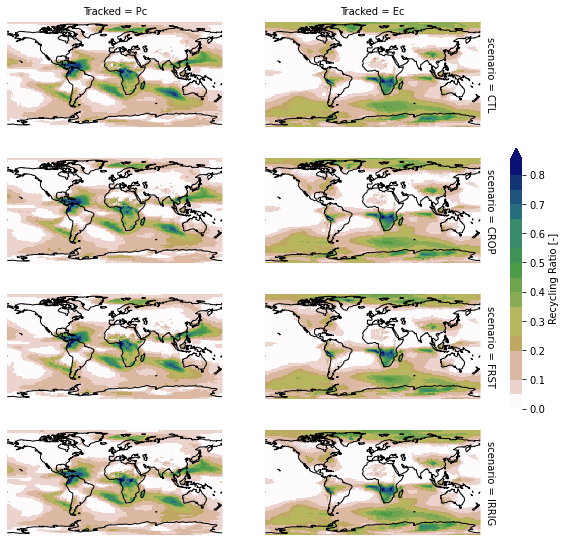

In [33]:
#PLOT RECYCLING RATIOS
ratio_E_P_mpi.lon.attrs["long_name"] = "Long"
ratio_E_P_mpi.lat.attrs["long_name"] = "Lat"
ratio_E_P_mpi.lon.attrs["units"] = "degrees"
ratio_E_P_mpi.lat.attrs["units"] = "degrees"
Facet = ratio_E_P_mpi.plot(x="lon", y="lat", col = "Tracked", row = "scenario",
                              aspect=2.0, 
                              size=2.4,
                              robust=True, cmap = 'gist_earth_r',
                              cbar_kwargs={"label": "Recycling Ratio [-]",
                                           'shrink' : 0.5,
                                           #'location': 'bottom',
                                           }, 
                              transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
                              levels = np.round(np.arange(0,0.9,0.05),decimals = 2)
                              ) 
                         
# Only works if cartopy is activated: transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
for ax in Facet.axes.flat:
    ax.coastlines()
    # ax.set_ylabel(' ')
    # ax.set_xlabel(' ')
    # ax.set_xticks([-100, -50, 0, 50, 100])
    # ax.set_yticks([-50, 0, 50])
    
plt.savefig('recyc_ratios.png')

In [34]:
#PLOT RECYCLING RATIOS with arrows
#The graphs with arrows are per columns (I could not manage to print it together Pm and Em)
#### For Pm
skip = (slice(None, None, 12), slice(None, None, 12))

xax = Ex_flux_CROP.coords['lon'].values
yax = Ex_flux_CROP.coords['lat'].values
X, Y =  np.meshgrid(xax, yax)

#### For Pm

U_def1 = P_Ex_flux_CTL
V_def1 = P_Nx_flux_CTL

U_def2 = P_Ex_flux_CROP
V_def2 = P_Nx_flux_CROP 

U_def3 = P_Ex_flux_FRST
V_def3 = P_Nx_flux_FRST

U_def4 = P_Ex_flux_IRRIG
V_def4 = P_Nx_flux_IRRIG

Facet = ratio_P.plot(x="lon", y="lat",row = "scenario",
                              #aspect=2.0, 
                              #size=2.4,
                              robust=True, cmap = 'gist_earth_r',
                              cbar_kwargs={"label": "Recycling Ratio [-]",
                                           'shrink' : 1,
                                           'location': 'bottom',
                                           }, 
                              transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
                              levels = np.round(np.arange(0,0.9,0.05),decimals = 2)
                              ) 
                         
# Only works if cartopy is activated: transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
for ax in Facet.axes.flat:
    ax.coastlines()
    ax.set_ylabel(' ')
    ax.set_xlabel(' ')
    ax.set_xticks([-100, -50, 0, 50, 100])
    ax.set_yticks([-50, 0, 50])
    ax.set_title("", fontsize = 8)

TemporaryNumpyArray = Facet.axes[0]
for ax in TemporaryNumpyArray.flat:
       ax.coastlines()
       ax.set_xticks([-100, -50, 0, 50, 100])
       ax.set_yticks([-50, 0, 50])
       ax.set_title("", fontsize = 8)
       ax.quiver(X[skip], Y[skip], U_def1[skip], V_def1[skip],  headwidth = 5, color = 'dimgray',  pivot = 'mid', scale = 40,  scale_units = 'height')
TemporaryNumpyArray = Facet.axes[1]
for ax in TemporaryNumpyArray.flat:
       ax.coastlines()
       ax.set_xticks([-100, -50, 0, 50, 100])
       ax.set_yticks([-50, 0, 50])
       ax.set_title("", fontsize = 8)
       ax.quiver(X[skip], Y[skip], U_def2[skip], V_def2[skip],  headwidth = 5, color = 'dimgray',  pivot = 'mid', scale = 40, scale_units = 'height')
TemporaryNumpyArray = Facet.axes[2]
for ax in TemporaryNumpyArray.flat:
       ax.coastlines()
       ax.set_xticks([-100, -50, 0, 50, 100])
       ax.set_yticks([-50, 0, 50])
       ax.set_title("", fontsize = 8)
       ax.quiver(X[skip], Y[skip], U_def3[skip], V_def3[skip],  headwidth = 5, color = 'dimgray', pivot = 'mid', scale = 40, scale_units = 'height')
TemporaryNumpyArray = Facet.axes[3]
for ax in TemporaryNumpyArray.flat:
       ax.coastlines()
       ax.set_xticks([-100, -50, 0, 50, 100])
       ax.set_yticks([-50, 0, 50])
       ax.set_title("", fontsize = 8)
       ax.quiver(X[skip], Y[skip], U_def4[skip], V_def4[skip],  headwidth = 5, color = 'dimgray',  pivot = 'mid', scale = 40, scale_units = 'height')   
    
#### For Em

U_def1 = Ex_flux_CTL
V_def1 = Nx_flux_CTL

U_def2 = Ex_flux_CROP
V_def2 = Nx_flux_CROP 

U_def3 = Ex_flux_FRST
V_def3 = Nx_flux_FRST

U_def4 = Ex_flux_IRRIG
V_def4 = Nx_flux_IRRIG

Facet = ratio_E.plot(x="lon", y="lat", row = "scenario",
                              #aspect=2.0, 
                              #size=2.4,
                              robust=True, cmap = 'gist_earth_r',
                              cbar_kwargs={"label": "Recycling Ratio [-]",
                                           'shrink' : 1,
                                           'location': 'bottom',
                                           }, 
                              transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
                              levels = np.round(np.arange(0,0.9,0.05),decimals = 2)
                              ) 
                         
# Only works if cartopy is activated: transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
for ax in Facet.axes.flat:
    ax.coastlines()
    ax.set_ylabel(' ')
    ax.set_xlabel(' ')
    ax.set_xticks([-100, -50, 0, 50, 100])
    ax.set_yticks([-50, 0, 50])

TemporaryNumpyArray = Facet.axes[0]
for ax in TemporaryNumpyArray.flat:
       ax.coastlines()
       ax.set_xticks([-100, -50, 0, 50, 100])
       ax.set_yticks([-50, 0, 50])
       ax.set_title("", fontsize = 8)
       ax.quiver(X[skip], Y[skip], U_def1[skip], V_def1[skip],   headwidth = 5, color = 'dimgray',  pivot = 'mid', scale = 40, scale_units = 'height')
TemporaryNumpyArray = Facet.axes[1]
for ax in TemporaryNumpyArray.flat:
       ax.coastlines()
       ax.set_xticks([-100, -50, 0, 50, 100])
       ax.set_yticks([-50, 0, 50])
       ax.set_title("", fontsize = 8)
       ax.quiver(X[skip], Y[skip], U_def2[skip], V_def2[skip],   headwidth = 5, color = 'dimgray',  pivot = 'mid', scale = 40, scale_units = 'height')
TemporaryNumpyArray = Facet.axes[2]
for ax in TemporaryNumpyArray.flat:
       ax.coastlines()
       ax.set_xticks([-100, -50, 0, 50, 100])
       ax.set_yticks([-50, 0, 50])
       ax.set_title("", fontsize = 8)
       ax.quiver(X[skip], Y[skip], U_def3[skip], V_def3[skip],  headwidth = 5, color = 'dimgray',  pivot = 'mid', scale = 40, scale_units = 'height')
TemporaryNumpyArray = Facet.axes[3]
for ax in TemporaryNumpyArray.flat:
       ax.coastlines()
       ax.set_xticks([-100, -50, 0, 50, 100])
       ax.set_yticks([-50, 0, 50])
       ax.set_title("", fontsize = 8)
       ax.quiver(X[skip], Y[skip], U_def4[skip], V_def4[skip],   headwidth = 5, color = 'dimgray',  pivot = 'mid', scale = 40, scale_units = 'height')
#%%
plt.savefig('arrows_recyc.png')

NameError: name 'Ex_flux_CROP' is not defined

NameError: name 'Ex_flux_CROP' is not defined

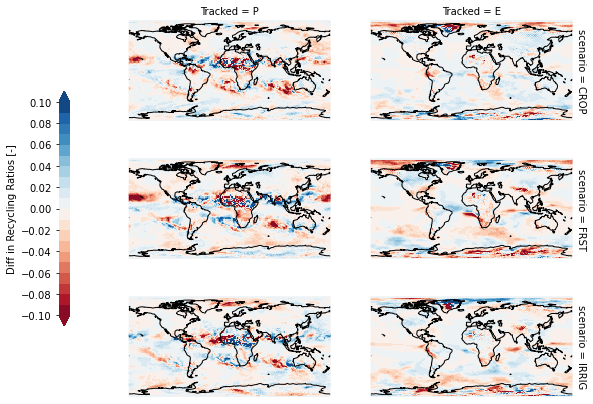

In [35]:
#PLOT ABSOLUTE DIFFERENCES of RECYCLING RATIOS
Difa_E.lon.attrs["long_name"] = "Long"
Difa_E.lat.attrs["long_name"] = "Lat"
Difa_E.lon.attrs["units"] = "degrees"
Difa_E.lat.attrs["units"] = "degrees"
Facet = Difa_E_mpi.plot(x="lon", y="lat", col = "Tracked", row = "scenario",
                              aspect=2.0, size=2.4,
                              robust=True, cmap = 'RdBu',
                              cbar_kwargs={"label": "Diff in Recycling Ratios [-]",
                                           'shrink' : 0.6,
                                           'ticks': [-0.1,-0.08,-0.06,-0.04,-0.02,0,0.02,0.04,0.06,0.08,0.1],
                                           'location': 'left',
                                           }, 
                              transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
                              levels = np.round(np.arange(-0.1,0.11,0.01),decimals = 2)
                              )    
                         
# Only works if cartopy is activated: transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
for ax in Facet.axes.flat:
    ax.coastlines()
    #ax.gridlines()
    # ax.set_xticks([-100, -50, 0, 50, 100])
    # ax.set_yticks([-50, 0, 50])
    # ax.set_ylabel(' ')
    # ax.set_xlabel(' ')

#PLOT ABSOLUTE DIFFERENCES RECYLING RATIOS - with arrows
skip = (slice(None, None, 11), slice(None, None, 11))

xax = Ex_flux_CROP.coords['lon'].values
yax = Ex_flux_CROP.coords['lat'].values
X, Y =  np.meshgrid(xax, yax)

#### For Pm

U_def1 = P_Ex_flux_CROP - P_Ex_flux_CTL
V_def1 = P_Nx_flux_CROP - P_Nx_flux_CTL

U_def2 = P_Ex_flux_FRST - P_Ex_flux_CTL
V_def2 = P_Nx_flux_FRST - P_Nx_flux_CTL

U_def3 = P_Ex_flux_IRRIG - P_Ex_flux_CROP
V_def3 = P_Nx_flux_IRRIG - P_Nx_flux_CROP

Facet = RRa_P.plot(x="lon", y="lat", row = "scenario",
                              #aspect=2.0, size=2.4,
                              robust=True, cmap = 'RdBu',
                              cbar_kwargs={"label": "Absolute differences in Recycling Ratios [-] ",
                                           'shrink' : 1,
                                           'location': 'bottom',
                                           'ticks' : [-0.10, -0.05, 0, 0.05, 0.10]
                                           }, 
                              transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
                              levels = np.round(np.arange(-0.10,0.10,0.012),decimals = 2)
                              )                             
# Only works if cartopy is activated: transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
TemporaryNumpyArray = Facet.axes[0]
for ax in TemporaryNumpyArray.flat:
       ax.coastlines()
       ax.set_xticks([-100, -50, 0, 50, 100])
       ax.set_yticks([-50, 0, 50])
       ax.set_title("", fontsize = 8)
       ax.quiver(X[skip], Y[skip], U_def1[skip], V_def1[skip], headwidth = 5, color = 'darkgreen', pivot = 'mid', scale = 11, scale_units = 'height')
TemporaryNumpyArray = Facet.axes[1]
for ax in TemporaryNumpyArray.flat:
       ax.coastlines()
       ax.set_xticks([-100, -50, 0, 50, 100])
       ax.set_yticks([-50, 0, 50])
       ax.set_title("", fontsize = 8)
       ax.quiver(X[skip], Y[skip], U_def2[skip], V_def2[skip], headwidth = 5, color = 'darkgreen', pivot = 'mid', scale = 11, scale_units = 'height')
TemporaryNumpyArray = Facet.axes[2]
for ax in TemporaryNumpyArray.flat:
       ax.coastlines()
       ax.set_xticks([-100, -50, 0, 50, 100])
       ax.set_yticks([-50, 0, 50])
       ax.set_title("", fontsize = 8)
       ax.quiver(X[skip], Y[skip], U_def3[skip], V_def3[skip], headwidth = 5, color = 'darkgreen', pivot = 'mid', scale = 11, scale_units = 'height')


#### For Em

U_def1 = Ex_flux_CROP - Ex_flux_CTL
V_def1 = Nx_flux_CROP - Nx_flux_CTL

U_def2 = Ex_flux_FRST - Ex_flux_CTL
V_def2 = Nx_flux_FRST - Nx_flux_CTL

U_def3 = Ex_flux_IRRIG - Ex_flux_CROP
V_def3 = Nx_flux_IRRIG - Nx_flux_CROP

Facet = RRa_E.plot(x="lon", y="lat", row = "scenario",
                              #aspect=2.0, size=2.4,
                              robust=True, cmap = 'RdBu',
                              cbar_kwargs={"label": "Diff in Recycling Ratios [-] 2",
                                           'shrink' :1,
                                           'location': 'bottom',
                                           'ticks' : [-0.10, -0.05, 0, 0.05, 0.10]
                                           }, 
                              transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
                              levels = np.round(np.arange(-0.10,0.10,0.012),decimals = 2)
                              )                             
# Only works if cartopy is activated: transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.PlateCarree(central_longitude=0.0, globe=None)},
TemporaryNumpyArray = Facet.axes[0]
for ax in TemporaryNumpyArray.flat:
       ax.coastlines()
       ax.set_xticks([-100, -50, 0, 50, 100])
       ax.set_yticks([-50, 0, 50])
       ax.set_title("", fontsize = 8)
       ax.quiver(X[skip], Y[skip], U_def1[skip], V_def1[skip],  headwidth = 5, color = 'darkgreen', pivot = 'mid', scale = 11, scale_units = 'height')
TemporaryNumpyArray = Facet.axes[1]
for ax in TemporaryNumpyArray.flat:
       ax.coastlines()
       ax.set_xticks([-100, -50, 0, 50, 100])
       ax.set_yticks([-50, 0, 50])
       ax.set_title("", fontsize = 8)
       ax.quiver(X[skip], Y[skip], U_def2[skip], V_def2[skip],  headwidth = 5, color = 'darkgreen', pivot = 'mid', scale = 11, scale_units = 'height')
TemporaryNumpyArray = Facet.axes[2]
for ax in TemporaryNumpyArray.flat:
       ax.coastlines()
       ax.set_xticks([-100, -50, 0, 50, 100])
       ax.set_yticks([-50, 0, 50])
       ax.set_title("", fontsize = 8)
       ax.quiver(X[skip], Y[skip], U_def3[skip], V_def3[skip],  headwidth = 5, color = 'darkgreen', pivot = 'mid', scale = 11, scale_units = 'height')
plt.savefig('arrows_recyc_abs.png')


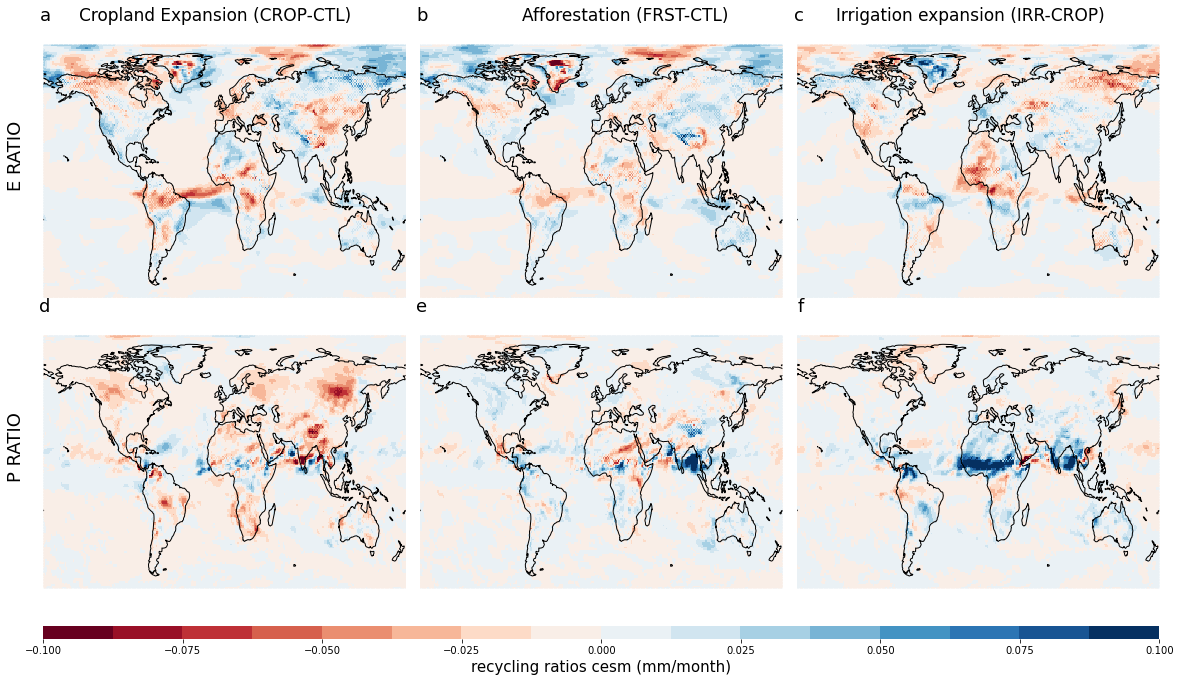

In [36]:
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
mpl.rc('axes',edgecolor='none')
k=0
fig = plt.figure()
gs = fig.add_gridspec(2,3,width_ratios=[3,3,3])
cmap='RdBu'
for model in ['E ratio','P ratio']:
    i=0
    k=k+1
    if model=='E ratio':
        da_list=[Difa_RE_CROP, Difa_RE_FRST,Difa_RE_IRRIG]
        pan_list=['a','b','c']
    elif model =='P ratio':
        da_list=[Difa_RP_CROP, Difa_RP_FRST,Difa_RP_IRRIG]
        pan_list=['d','e','f']
    for da in da_list:
        if i==0:
            change='Cropland Expansion (CROP-CTL)'
        elif i==1:
            change='Afforestation (FRST-CTL)'
        elif i==2:
            change='Irrigation expansion (IRR-CROP)'
        i=i+1
        #plot_lims = [da.min(), da.max()]
        plot_lims = [-0.1, 0.1]
        # define colorbar levels
        ax = fig.add_subplot(gs[k-1,i-1], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+20, 20)
        levels=[-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
        # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = 'mm/month'

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False,label=model)
        ax.set_aspect('auto')
        # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
        if i==1:
            ax_2=ax
            ax.text(-0.1,0.7,model.upper(),rotation='vertical', transform=ax.transAxes,fontsize=18, va='top', ha='left') 
        ax.set_title('')
        if model=='E ratio':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            if k==1:
                ax.text(0.85, 1.15, change, transform=ax.transAxes,fontsize=17, va='top', ha='right')
        elif model=='P ratio':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            ax_old_mpi=ax
        
cbar = mpu.colorbar(h, ax1=ax_old_mpi,ax2=ax_2, shift=0., size=0.05, orientation='horizontal')
cbar.set_label(label='recycling ratios cesm ('+cbar_label+')', size=15)
#cbar.ax.tick_params(labelsize=13) 
fig.subplots_adjust(hspace=0.15, wspace=0.04)



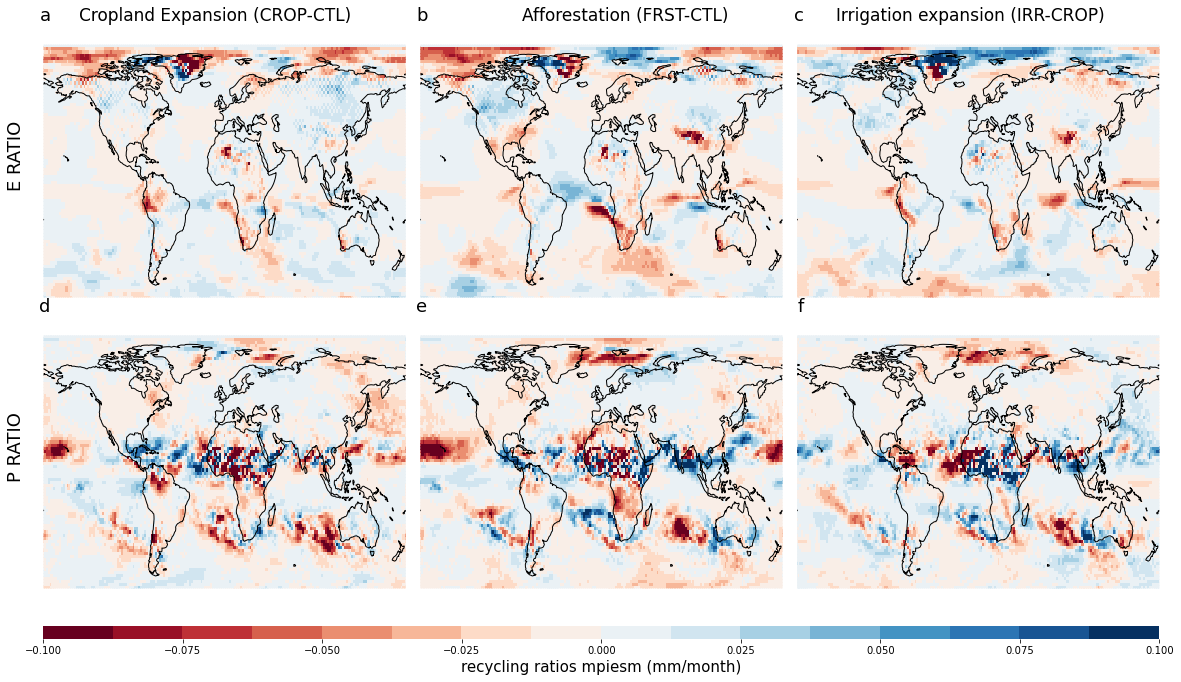

In [37]:
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
mpl.rc('axes',edgecolor='none')
k=0
fig = plt.figure()
gs = fig.add_gridspec(2,3,width_ratios=[3,3,3])
cmap='RdBu'
for model in ['E ratio','P ratio']:
    i=0
    k=k+1
    if model=='E ratio':
        da_list=[Difa_RE_CROP_mpi, Difa_RE_FRST_mpi,Difa_RE_IRRIG_mpi]
        pan_list=['a','b','c']
    elif model =='P ratio':
        da_list=[Difa_RP_CROP_mpi, Difa_RP_FRST_mpi,Difa_RP_IRRIG_mpi]
        pan_list=['d','e','f']
    for da in da_list:
        if i==0:
            change='Cropland Expansion (CROP-CTL)'
        elif i==1:
            change='Afforestation (FRST-CTL)'
        elif i==2:
            change='Irrigation expansion (IRR-CROP)'
        i=i+1
        #plot_lims = [da.min(), da.max()]
        plot_lims = [-0.1, 0.1]
        # define colorbar levels
        ax = fig.add_subplot(gs[k-1,i-1], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+20, 20)
        levels=[-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
        # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = 'mm/month'

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False,label=model)
        ax.set_aspect('auto')
        # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
        if i==1:
            ax_2=ax
            ax.text(-0.1,0.7,model.upper(),rotation='vertical', transform=ax.transAxes,fontsize=18, va='top', ha='left') 
        ax.set_title('')
        if model=='E ratio':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            if k==1:
                ax.text(0.85, 1.15, change, transform=ax.transAxes,fontsize=17, va='top', ha='right')
        elif model=='P ratio':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            ax_old_mpi=ax
        
cbar = mpu.colorbar(h, ax1=ax_old_mpi,ax2=ax_2, shift=0., size=0.05, orientation='horizontal')
cbar.set_label(label='recycling ratios mpiesm ('+cbar_label+')', size=15)
#cbar.ax.tick_params(labelsize=13) 
fig.subplots_adjust(hspace=0.15, wspace=0.04)



1
1
2
2
1
2
1
2
2
2
2
2


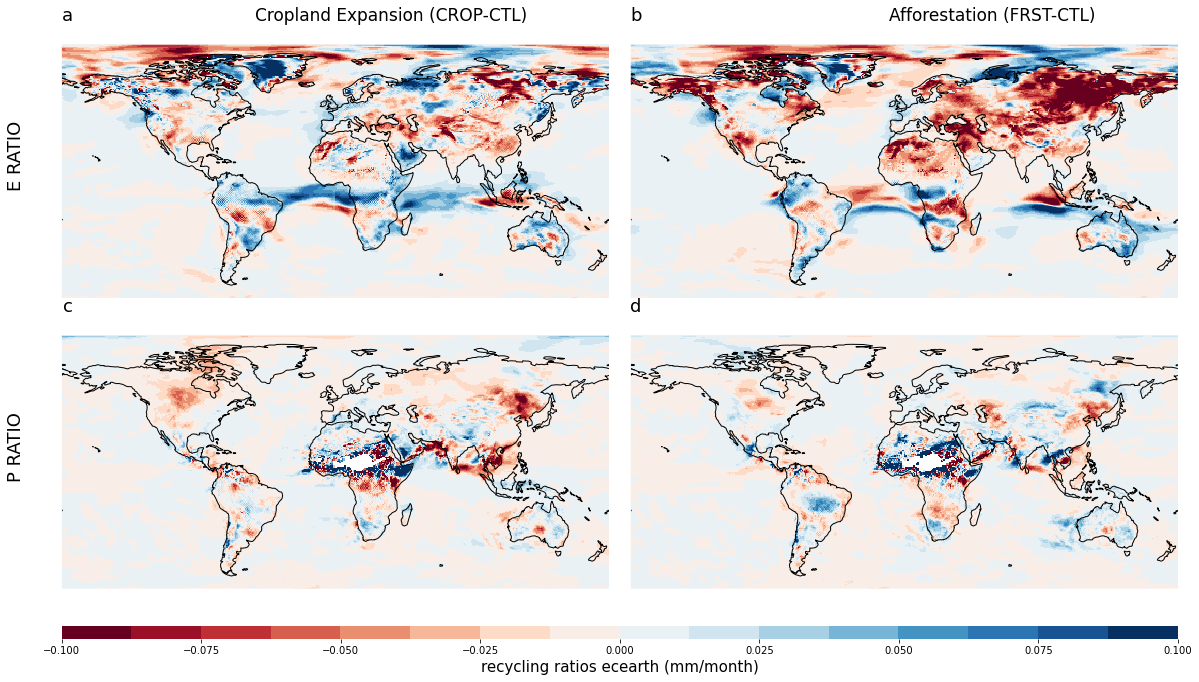

In [38]:
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
mpl.rc('axes',edgecolor='none')
k=0
fig = plt.figure()
gs = fig.add_gridspec(2,2,width_ratios=[2,2])
cmap='RdBu'
for model in ['E ratio','P ratio']:
    i=0
    k=k+1
    if model=='E ratio':
        da_list=[Difa_RE_CROP_ec, Difa_RE_FRST_ec]
        pan_list=['a','b']
    elif model =='P ratio':
        da_list=[Difa_RP_CROP_ec, Difa_RP_FRST_ec]
        pan_list=['c','d']
    for da in da_list:
        if i==0:
            change='Cropland Expansion (CROP-CTL)'
        elif i==1:
            change='Afforestation (FRST-CTL)'
        i=i+1
        #plot_lims = [da.min(), da.max()]
        plot_lims = [-0.1, 0.1]
        # define colorbar levels
        print(i)
        print(k)
        print(len(da_list))
        ax = fig.add_subplot(gs[k-1,i-1], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+20, 20)
        levels=[-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
        # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = 'mm/month'

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False,label=model)
        ax.set_aspect('auto')
        # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
        if i==1:
            ax_2=ax
            ax.text(-0.1,0.7,model.upper(),rotation='vertical', transform=ax.transAxes,fontsize=18, va='top', ha='left') 
        ax.set_title('')
        if model=='E ratio':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            if k==1:
                ax.text(0.85, 1.15, change, transform=ax.transAxes,fontsize=17, va='top', ha='right')
        elif model=='P ratio':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            ax_old_mpi=ax
        
cbar = mpu.colorbar(h, ax1=ax_old_mpi,ax2=ax_2, shift=0., size=0.05, orientation='horizontal')
cbar.set_label(label='recycling ratios ecearth ('+cbar_label+')', size=15)
#cbar.ax.tick_params(labelsize=13) 
fig.subplots_adjust(hspace=0.15, wspace=0.04)



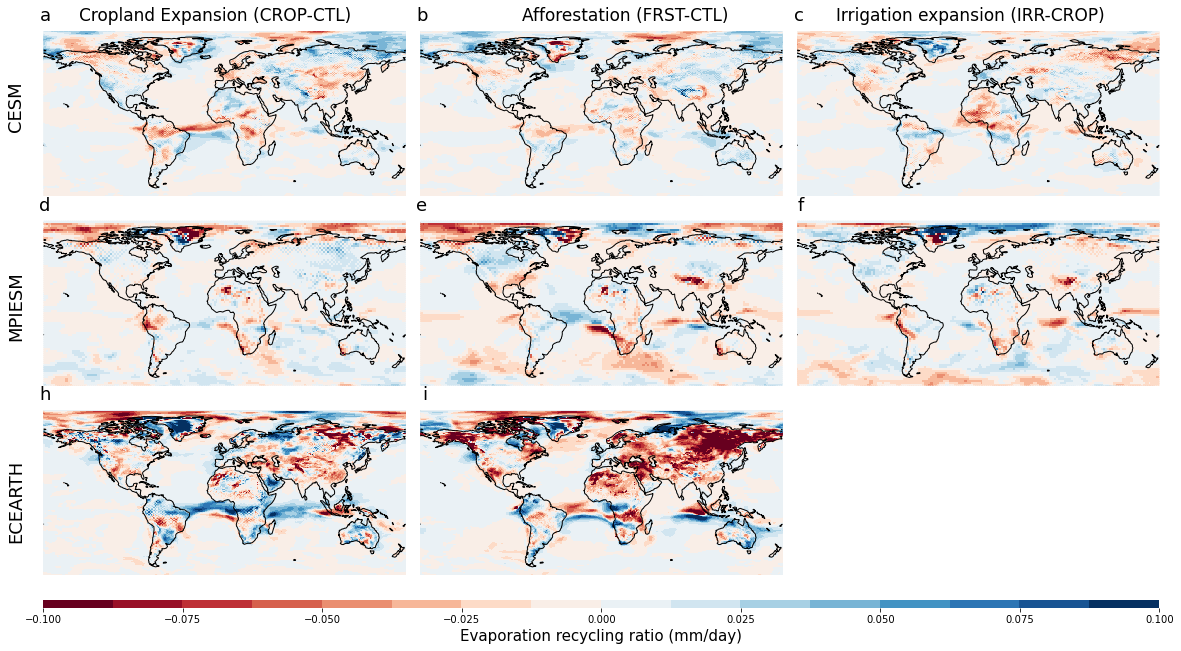

In [40]:
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
plt.rcParams['figure.figsize'] = [20, 10]

#Difa_RE_CROP_mpi=Difa_RE_CROP_mpi.sortby('lat')

import mplotutils as mpu
import matplotlib as mpl
mpl.rc('axes',edgecolor='none')
k=0
fig = plt.figure()
gs = fig.add_gridspec(3,3,width_ratios=[3,3,3])
cmap='RdBu'
for model in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if model=='cesm':
        da_list=[Difa_RE_CROP,Difa_RE_FRST,Difa_RE_IRRIG]
        pan_list=['a','b','c']
    elif model =='ecearth':
        da_list=[Difa_RE_CROP_ec,Difa_RE_FRST_ec]
        pan_list=['h','i']
    elif model =='mpiesm':
        da_list=[Difa_RE_CROP_mpi,Difa_RE_FRST_mpi,Difa_RE_IRRIG_mpi]
        pan_list=['d','e','f']
    for da in da_list:
        if i==0:
            change='Cropland Expansion (CROP-CTL)'
        elif i==1:
            change='Afforestation (FRST-CTL)'
        elif i==2:
            change='Irrigation expansion (IRR-CROP)'
        i=i+1
        #plot_lims = [da.min(), da.max()]
        plot_lims = [-0.1, 0.1]
        # define colorbar levels
        ax = fig.add_subplot(gs[k-1,i-1], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+20, 20)
        levels=[-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
        # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = 'mm/day'

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False,label=model)
        ax.set_aspect('auto')
        # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
        if i==1:
            ax_2=ax
            ax.text(-0.1,0.7,model.upper(),rotation='vertical', transform=ax.transAxes,fontsize=18, va='top', ha='left') 
        ax.set_title('')
        if model=='cesm':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            ax_old_mpi=ax
            if k==1:
                ax.text(0.85, 1.15, change, transform=ax.transAxes,fontsize=17, va='top', ha='right')
        elif model=='mpiesm':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            
        elif model=='ecearth':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')

cbar = mpu.colorbar(h, ax1=ax_old_mpi,ax2=ax_2, shift=0., size=0.05, orientation='horizontal')
cbar.set_label(label='Evaporation recycling ratio ('+cbar_label+')', size=15)
#cbar.ax.tick_params(labelsize=13) 
fig.subplots_adjust(hspace=0.15, wspace=0.04)



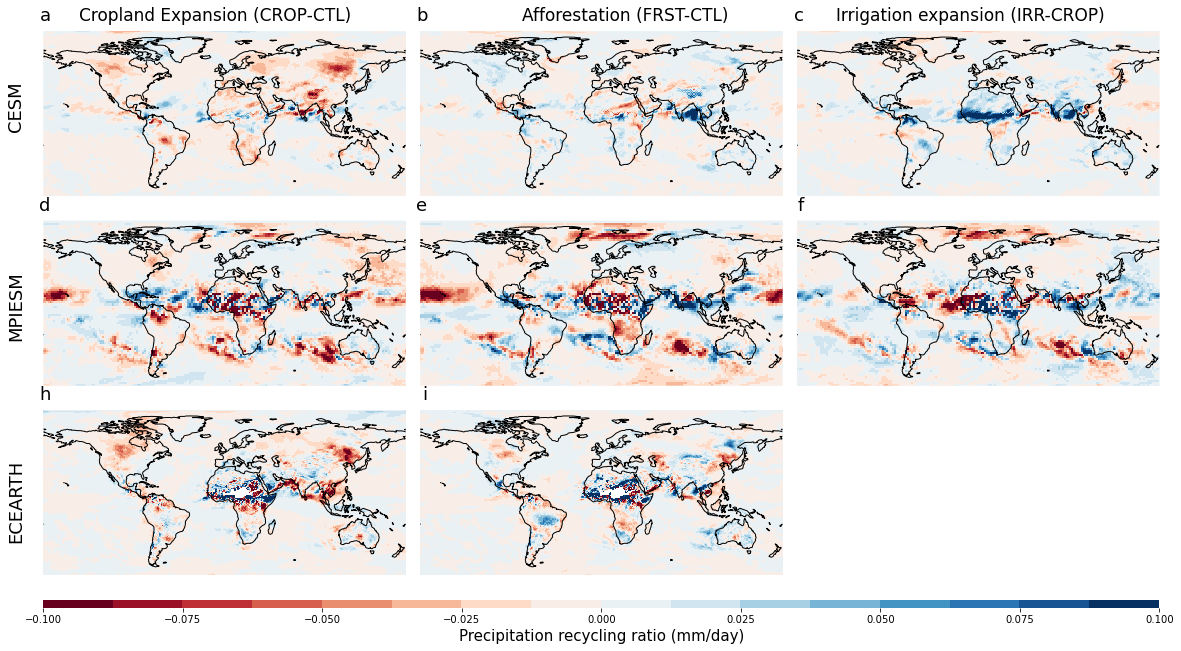

In [41]:
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
plt.rcParams['figure.figsize'] = [20, 10]

import mplotutils as mpu
import matplotlib as mpl
mpl.rc('axes',edgecolor='none')
k=0
fig = plt.figure()
gs = fig.add_gridspec(3,3,width_ratios=[3,3,3])
cmap='RdBu'
for model in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if model=='cesm':
        da_list=[Difa_RP_CROP,Difa_RP_FRST,Difa_RP_IRRIG]
        pan_list=['a','b','c']
    elif model =='ecearth':
        da_list=[Difa_RP_CROP_ec,Difa_RP_FRST_ec]
        pan_list=['h','i']
    elif model =='mpiesm':
        da_list=[Difa_RP_CROP_mpi,Difa_RP_FRST_mpi,Difa_RP_IRRIG_mpi]
        pan_list=['d','e','f']
    for da in da_list:
        if i==0:
            change='Cropland Expansion (CROP-CTL)'
        elif i==1:
            change='Afforestation (FRST-CTL)'
        elif i==2:
            change='Irrigation expansion (IRR-CROP)'
        i=i+1
        #plot_lims = [da.min(), da.max()]
        plot_lims = [-0.1, 0.1]
        # define colorbar levels
        ax = fig.add_subplot(gs[k-1,i-1], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+20, 20)
        levels=[-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
        # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = 'mm/day'

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False,label=model)
        ax.set_aspect('auto')
        # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
        if i==1:
            ax_2=ax
            ax.text(-0.1,0.7,model.upper(),rotation='vertical', transform=ax.transAxes,fontsize=18, va='top', ha='left') 
        ax.set_title('')
        if model=='cesm':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            ax_old_mpi=ax
            if k==1:
                ax.text(0.85, 1.15, change, transform=ax.transAxes,fontsize=17, va='top', ha='right')
        elif model=='mpiesm':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')
            
        elif model=='ecearth':
            ax.text(0.02, 1.15, pan_list[i-1], transform=ax.transAxes,fontsize=18, va='top', ha='right')

cbar = mpu.colorbar(h, ax1=ax_old_mpi,ax2=ax_2, shift=0., size=0.05, orientation='horizontal')
cbar.set_label(label='Precipitation recycling ratio ('+cbar_label+')', size=15)
#cbar.ax.tick_params(labelsize=13) 
fig.subplots_adjust(hspace=0.15, wspace=0.04)



C:\Users\sdeherto\.conda\envs\pyvis\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


[<xarray.DataArray ()>
array(-13399.48701), <xarray.DataArray ()>
array(413.365651), <xarray.DataArray ()>
array(3235.397004)]
[<xarray.DataArray ()>
array(-13976.537813), <xarray.DataArray ()>
array(1686.38549), <xarray.DataArray ()>
array(3434.702678)]


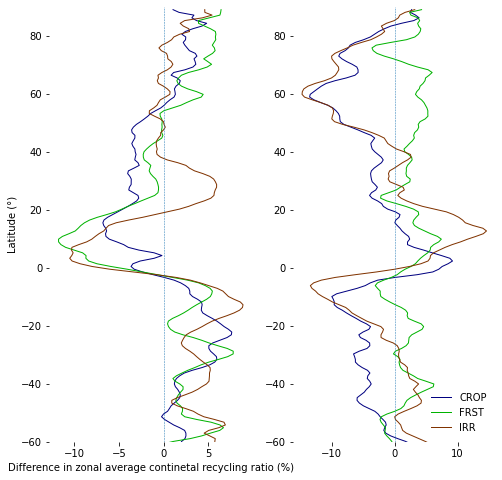

In [70]:
#zonal averages recycling ratios
#todo mask greenland and antarctica from land sea mask
land_only=1
plt.rcParams['figure.figsize'] = [8, 8]


if land_only==1:
    P_c_FRST, da_mask = xr.align(P_c_FRST, da_mask, join="exact")
    P_c_FRST=xr.where(da_mask==1,P_c_FRST,np.nan)
    
    P_c_CROP, da_mask = xr.align(P_c_CROP, da_mask, join="exact")
    P_c_CROP=xr.where(da_mask==1,P_c_CROP,np.nan)
    
    P_c_CTL, da_mask = xr.align(P_c_CTL, da_mask, join="exact")
    P_c_CTL=xr.where(da_mask==1,P_c_CTL,np.nan)
    
    P_c_IRRIG, da_mask = xr.align(P_c_IRRIG, da_mask, join="exact")
    P_c_IRRIG=xr.where(da_mask==1,P_c_IRRIG,np.nan)
    
    E_c_IRRIG, da_mask = xr.align(E_c_IRRIG, da_mask, join="exact")
    E_c_IRRIG=xr.where(da_mask==1,E_c_IRRIG,np.nan)
    
    E_c_FRST, da_mask = xr.align(E_c_FRST, da_mask, join="exact")
    E_c_FRST=xr.where(da_mask==1,E_c_FRST,np.nan)
    
    E_c_CROP, da_mask = xr.align(E_c_CROP, da_mask, join="exact")
    E_c_CROP=xr.where(da_mask==1,E_c_CROP,np.nan)
    
    E_c_CTL, da_mask = xr.align(E_c_CTL, da_mask, join="exact")
    E_c_CTL=xr.where(da_mask==1,E_c_CTL,np.nan)

P_c_FRST_lat=((P_c_FRST-P_c_CTL)/P_c_CTL).mean('lon')*100
P_c_CROP_lat=((P_c_CROP-P_c_CTL)/P_c_CTL).mean('lon')*100
P_c_IRRIG_lat=((P_c_IRRIG-P_c_CTL)/P_c_CTL).mean('lon')*100

E_c_FRST_lat=((E_c_FRST-E_c_CTL)/E_c_CTL).mean('lon')*100
E_c_CROP_lat=((E_c_CROP-E_c_CTL)/E_c_CTL).mean('lon')*100
E_c_IRRIG_lat=((E_c_IRRIG-E_c_CTL)/E_c_CTL).mean('lon')*100

f,ax=plt.subplots(1,2)
ax[0].plot(E_c_CROP_lat.rolling(lat=2,center=True).mean(),E_c_CROP_lat.lat,color=[0.,0.,0.5],linewidth=1) 
ax[0].plot(E_c_FRST_lat.rolling(lat=2,center=True).mean(),E_c_CROP_lat.lat,color=[0.,0.7,0.],linewidth=1) 
ax[0].plot(E_c_IRRIG_lat.rolling(lat=2,center=True).mean(),E_c_IRRIG_lat.lat,color=[0.5,0.2,0.],linewidth=1) 

ax[1].plot(P_c_CROP_lat.rolling(lat=2,center=True).mean(),E_c_CROP_lat.lat,color=[0.,0.,0.5],linewidth=1) 
ax[1].plot(P_c_FRST_lat.rolling(lat=2,center=True).mean(),E_c_CROP_lat.lat,color=[0.,0.7,0.],linewidth=1) 
ax[1].plot(P_c_IRRIG_lat.rolling(lat=2,center=True).mean(),E_c_IRRIG_lat.lat,color=[0.5,0.2,0.],linewidth=1) 

#ax[0].set_xlim([plot_lims[0],plot_lims[1]])
ax[0].axvline(x=0,linewidth=0.5,linestyle='dashed')
ax[1].axvline(x=0,linewidth=0.5,linestyle='dashed')

ax[0].set_ylim([-60,90])
ax[1].set_ylim([-60,90])

ax[0].set_ylabel('Latitude (°)',fontsize=10)
ax[0].set_xlabel('Difference in zonal average continetal recycling ratio (%)',fontsize=10)

plt.legend(['CROP','FRST','IRR'],loc='lower right',prop={'size': 10},facecolor='white', framealpha=0)


total_E=[Difa_Em_CROP.sum(),Difa_Em_FRST.sum(),Difa_Em_IRRIG.sum()]
total_P=[Difa_Pm_CROP.sum(),Difa_Pm_FRST.sum(),Difa_Pm_IRRIG.sum()]
print(total_E)
print(total_P)


In [54]:
#compute the differences per continent:
    
srex = regionmask.defined_regions.srex
srex
srex.plot();

N_america=[1,2,3,4,5,6]
S_america=[7,8,9,10]
europe=[11,12,13]
africa=[14,15,16,17]
asia=[18,19,20,21,22,23,24]
oceania=[25,26]

NameError: name 'regionmask' is not defined

In [ ]:
masked_africa=regionmask.defined_regions.srex[africa].mask(P_c_FRST)
masked_N_america=regionmask.defined_regions.srex[N_america].mask(P_c_FRST)
masked_S_america=regionmask.defined_regions.srex[S_america].mask(P_c_FRST)
masked_europe=regionmask.defined_regions.srex[europe].mask(P_c_FRST)
masked_asia=regionmask.defined_regions.srex[asia].mask(P_c_FRST)
masked_oceania=regionmask.defined_regions.srex[oceania].mask(P_c_FRST)


In [ ]:
Em_FRST_africa=xr.where(np.isnan(masked_africa),np.nan,Difa_Em_FRST).sum()
Em_FRST_N_america=xr.where(np.isnan(masked_N_america),np.nan,Difa_Em_FRST).sum()
Em_FRST_S_america=xr.where(np.isnan(masked_S_america),np.nan,Difa_Em_FRST).sum()
Em_FRST_europe=xr.where(np.isnan(masked_europe),np.nan,Difa_Em_FRST).sum()
Em_FRST_oceania=xr.where(np.isnan(masked_oceania),np.nan,Difa_Em_FRST).sum()
Em_FRST_asia=xr.where(np.isnan(masked_asia),np.nan,Difa_Em_FRST).sum()

Em_FRST_list=[Em_FRST_africa,Em_FRST_N_america,Em_FRST_S_america,Em_FRST_europe,Em_FRST_oceania,Em_FRST_asia]
names_list=['africa','North America', 'South America','Europe','Oceania','Asia']
plt.bar(names_list,Em_FRST_list)
plt.title('Change in continental evaporation recycling ratio (FRST-CTL)')
#plt.xlabel('Continents')
plt.ylabel('mm/day') ##to check!!!
plt.show()

In [ ]:
Pm_FRST_africa=xr.where(np.isnan(masked_africa),np.nan,Difa_Pm_FRST).sum()
Pm_FRST_N_america=xr.where(np.isnan(masked_N_america),np.nan,Difa_Pm_FRST).sum()
Pm_FRST_S_america=xr.where(np.isnan(masked_S_america),np.nan,Difa_Pm_FRST).sum()
Pm_FRST_europe=xr.where(np.isnan(masked_europe),np.nan,Difa_Pm_FRST).sum()
Pm_FRST_oceania=xr.where(np.isnan(masked_oceania),np.nan,Difa_Pm_FRST).sum()
Pm_FRST_asia=xr.where(np.isnan(masked_asia),np.nan,Difa_Pm_FRST).sum()

Pm_FRST_list=[Pm_FRST_africa,Pm_FRST_N_america,Pm_FRST_S_america,Pm_FRST_europe,Pm_FRST_oceania,Pm_FRST_asia]
names_list=['africa','North America', 'South America','Europe','Oceania','Asia']
plt.bar(names_list,Pm_FRST_list)
plt.title('Change in continental precipitation recycling ratio (FRST-CTL)')
#plt.xlabel('Continents')
plt.ylabel('mm/day') ##to check!!!
plt.show()


In [ ]:
Em_CROP_africa=xr.where(np.isnan(masked_africa),np.nan,Difa_Em_CROP).sum()
Em_CROP_N_america=xr.where(np.isnan(masked_N_america),np.nan,Difa_Em_CROP).sum()
Em_CROP_S_america=xr.where(np.isnan(masked_S_america),np.nan,Difa_Em_CROP).sum()
Em_CROP_europe=xr.where(np.isnan(masked_europe),np.nan,Difa_Em_CROP).sum()
Em_CROP_oceania=xr.where(np.isnan(masked_oceania),np.nan,Difa_Em_CROP).sum()
Em_CROP_asia=xr.where(np.isnan(masked_asia),np.nan,Difa_Em_CROP).sum()

Em_CROP_list=[Em_CROP_africa,Em_CROP_N_america,Em_CROP_S_america,Em_CROP_europe,Em_CROP_oceania,Em_CROP_asia]
names_list=['africa','North America', 'South America','Europe','Oceania','Asia']
plt.bar(names_list,Em_CROP_list)
plt.title('Change in continental evaporation recycling ratio (CROP-CTL)')
#plt.xlabel('Continents')
plt.ylabel('mm/day') ##to check!!!
plt.show()


In [ ]:
Pm_CROP_africa=xr.where(np.isnan(masked_africa),np.nan,Difa_Pm_CROP).sum()
Pm_CROP_N_america=xr.where(np.isnan(masked_N_america),np.nan,Difa_Pm_CROP).sum()
Pm_CROP_S_america=xr.where(np.isnan(masked_S_america),np.nan,Difa_Pm_CROP).sum()
Pm_CROP_europe=xr.where(np.isnan(masked_europe),np.nan,Difa_Pm_CROP).sum()
Pm_CROP_oceania=xr.where(np.isnan(masked_oceania),np.nan,Difa_Pm_CROP).sum()
Pm_CROP_asia=xr.where(np.isnan(masked_asia),np.nan,Difa_Pm_CROP).sum()

Pm_CROP_list=[Pm_CROP_africa,Pm_CROP_N_america,Pm_CROP_S_america,Pm_CROP_europe,Pm_CROP_oceania,Pm_CROP_asia]
names_list=['africa','North America', 'South America','Europe','Oceania','Asia']
plt.bar(names_list,Pm_CROP_list)
plt.title('Change in continental Precipitation recycling ratio (CROP-CTL)')
#plt.xlabel('Continents')
plt.ylabel('mm/day') ##to check!!!
plt.show()


In [ ]:
Em_IRRIG_africa=xr.where(np.isnan(masked_africa),np.nan,Difa_Em_IRRIG).sum()
Em_IRRIG_N_america=xr.where(np.isnan(masked_N_america),np.nan,Difa_Em_IRRIG).sum()
Em_IRRIG_S_america=xr.where(np.isnan(masked_S_america),np.nan,Difa_Em_IRRIG).sum()
Em_IRRIG_europe=xr.where(np.isnan(masked_europe),np.nan,Difa_Em_IRRIG).sum()
Em_IRRIG_oceania=xr.where(np.isnan(masked_oceania),np.nan,Difa_Em_IRRIG).sum()
Em_IRRIG_asia=xr.where(np.isnan(masked_asia),np.nan,Difa_Em_IRRIG).sum()

Em_IRRIG_list=[Em_IRRIG_africa,Em_IRRIG_N_america,Em_IRRIG_S_america,Em_IRRIG_europe,Em_IRRIG_oceania,Em_IRRIG_asia]
names_list=['africa','North America', 'South America','Europe','Oceania','Asia']
plt.bar(names_list,Em_IRRIG_list)
plt.title('Change in continental evaporation recycling ratio (IRRIG-CTL)')
#plt.xlabel('Continents')
plt.ylabel('mm/day') ##to check!!!
plt.show()


In [ ]:
Pm_IRRIG_africa=xr.where(np.isnan(masked_africa),np.nan,Difa_Pm_IRRIG).sum()
Pm_IRRIG_N_america=xr.where(np.isnan(masked_N_america),np.nan,Difa_Pm_IRRIG).sum()
Pm_IRRIG_S_america=xr.where(np.isnan(masked_S_america),np.nan,Difa_Pm_IRRIG).sum()
Pm_IRRIG_europe=xr.where(np.isnan(masked_europe),np.nan,Difa_Pm_IRRIG).sum()
Pm_IRRIG_oceania=xr.where(np.isnan(masked_oceania),np.nan,Difa_Pm_IRRIG).sum()
Pm_IRRIG_asia=xr.where(np.isnan(masked_asia),np.nan,Difa_Pm_IRRIG).sum()

Pm_IRRIG_list=[Pm_IRRIG_africa,Pm_IRRIG_N_america,Pm_IRRIG_S_america,Pm_IRRIG_europe,Pm_IRRIG_oceania,Pm_IRRIG_asia]
names_list=['africa','North America', 'South America','Europe','Oceania','Asia']
plt.bar(names_list,Pm_IRRIG_list)
plt.title('Change in continental precipitation recycling ratio (IRRIG-CTL)')
#plt.xlabel('Continents')
plt.ylabel('mm/day') ##to check!!!
plt.show()
